# Inference: Hamiltonian MCMC

This example shows you how to perform Bayesian inference on a Normal distribution and a time-series problem, using [Hamiltonian Monte Carlo](http://pints.readthedocs.io/en/latest/mcmc_samplers/hamiltonian_mcmc.html).


First, we create a simple normal distribution

In [1]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.NormalLogPDF([5, 5], [[4, -1], [1, 3]])

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

Now we set up and run a sampling routine using Hamiltonian MCMC

In [2]:
# Choose starting points for 3 mcmc chains
xs = [
    [-5, -5],
    [3, 3],
    [18, 18],
]

# Set a standard deviation, to give the method a sense of scale
sigma = [1, 1]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_pdf, 3, xs, sigma, method=pints.HamiltonianMCMC)

# Add stopping criterion
mcmc.set_max_iterations(1000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_rate(100)

# Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.2)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

Running...
Using Hamiltonian MCMC
Generating 3 chains.
Running in sequential mode.
25.764097430081247 [-3.07692308 -2.30769231]
3.94591561189944 [-0.61538462 -0.46153846]
41.44591561189943 [4. 3.]
Iter. Eval. iMCMC Accept.   iMCMC Accept.   iMCMC Accept.   Time m:s
0     3      1     0         1     0         1     0          0:00.0
26.56790129271088 [-3.09807334 -2.39829045]
3.7363982352892724 [-0.52884147 -0.42127703]
39.95403258439436 [3.93638735 2.91760182]
26.90544387632584 [-3.08324665 -2.4689037 ]
3.5440347289794616 [-0.43612048 -0.37745786]
37.742485849177804 [3.82746158 2.81140666]
26.76511403106722 [-3.03236259 -2.51861735]
3.3770789550739364 [-0.33821235 -0.33033496]
34.902403944290725 [3.67455491 2.68238637]
26.155546433892887 [-2.9457379  -2.54666299]
3.2427806750956987 [-0.23616585 -0.28018706]
31.551404204509012 [3.47947578 2.53165842]
25.10538656700956 [-2.8240859  -2.55242889]
3.1470861983357517 [-0.13107723 -0.22731736]
27.828671142900017 [3.24448869 2.36047768]
23.66

4.630508531877476 [0.63720878 0.7932448 ]
4.684526187859644 [-0.90901626 -0.0054796 ]
9.107161176476598 [-1.74860466 -0.82837433]
5.805180515425567 [0.94417835 0.96225277]
4.530713781642078 [-0.87833075 -0.06596859]
12.270141260303575 [-2.13383258 -1.09959812]
5.681332905519857 [0.95436121 0.90910551]
4.305648585825934 [-0.80595388 -0.0420908 ]
41.5928070758631 [4.02574846 2.97693058]
5.515067316953954 [0.95293733 0.84770576]
4.077185218588638 [-0.72600794 -0.02017483]
40.9414353178089 [4.00517637 2.92960893]
5.312916242148523 [0.94010878 0.77880481]
3.8540732101361415 [-6.39298304e-01 -2.44421893e-04]
39.51759949606096 [3.93861925 2.85855418]
5.082894785608623 [0.91620598 0.70321123]
3.6448881528735284 [-0.5466867   0.01772192]
37.37963991480971 [3.82691009 2.76443604]
4.8341362420928675 [0.88168217 0.62178183]
3.4576851066304197 [-0.44908329  0.03378804]
34.61597445200569 [3.67136964 2.64806919]
4.57648575432908 [0.83710658 0.53541259]
3.299672176144762 [-0.34743846  0.0480565 ]
31.3

3.0602423575692574 [ 0.03293398 -0.09418889]
36.21072968466321 [3.59880207 2.96025284]
3.7572889030486176 [-0.33056152 -0.58271382]
3.0417303695888434 [ 0.04806489 -0.00490838]
33.236861596209266 [3.37822307 2.8964413 ]
3.7134443610580323 [-0.25890278 -0.58218622]
3.0540281476987765 [0.06276722 0.08458044]
29.84387147999976 [3.11754833 2.8073758 ]
3.675494959897911 [-0.18306281 -0.57528988]
3.09667024480671 [0.07662991 0.17322139]
26.179730929329242 [2.81945815 2.69335043]
3.6458164744752253 [-0.10376292 -0.56187631]
3.167790819381472 [0.08925226 0.25996618]
22.40487879050623 [2.48705497 2.55485138]
3.6265584432315165 [-0.02177636 -0.54186662]
3.2642101731359734 [0.10025085 0.343786  ]
18.68564964639721 [2.12383328 2.39256049]
3.6195610540880754 [ 0.06207849 -0.5152548 ]
3.3815827829575804 [0.10926624 0.42368307]
15.18743032090855 [1.73364525 2.20735758]
3.6262806792743385 [ 0.1469457  -0.48211038]
3.514600008077728 [0.11596938 0.49870179]
12.06782254106217 [1.32066246 2.00032147]
3.64

5.150976207467177 [-0.65686753  0.63785616]
24.59379861598008 [3.16477061 1.93302341]
6.872380863677815 [ 1.31532436 -0.21411263]
5.5820923883003015 [-0.73175327  0.6887588 ]
20.705130064837345 [2.87803977 1.72024891]
6.59183045810743 [ 1.28001664 -0.17071025]
5.994689315666366 [-0.80200362  0.72893286]
16.884212447366288 [2.55944934 1.49515763]
6.259122829432245 [ 1.23341864 -0.12126831]
6.371711213698196 [-0.86709373  0.75766774]
13.286404360333393 [2.21263273 1.25953963]
5.889168152549191 [ 1.17580837 -0.06653871]
6.697849434739883 [-0.92651119  0.7744095 ]
10.057855010261791 [1.84151631 1.01522771]
5.4984315915445725 [ 1.10754922 -0.00737229]
6.960216906751999 [-0.97975903  0.77876926]
7.329491585318092 [1.45027751 0.76408688]
5.104226361270549 [1.02908922 0.05529271]
7.148909558331475 [-1.02635916  0.77052953]
5.211642510748334 [1.04330049 0.5080043 ]
4.723975550984644 [0.94095981 0.12044361]
7.257429610495502 [-1.06585606  0.74964832]
3.7895150199265846 [0.62512992 0.24887951]
4.

3.490964593752284 [ 0.14511419 -0.414741  ]
3.074553787259711 [0.09584723 0.12348791]
11.7966448932967 [1.80567491 1.57690217]
3.575662663078162 [ 0.09890214 -0.48025639]
3.0938384004394646 [0.04738944 0.17224429]
8.778590749237285 [1.41049389 1.33508125]
3.666706336790941 [ 0.05325486 -0.53955661]
3.1354047190314156 [-0.00203578  0.21902655]
6.341348809041077 [0.99818498 1.08116854]
3.7591594976356597 [ 0.00877616 -0.59205228]
3.197566021410486 [-0.05211614  0.26310684]
4.591211731030585 [0.57333539 0.81702048]
3.8480822040742586 [-0.03396184 -0.63723415]
3.277763195331106 [-0.10252498  0.30378854]
3.6064118439429533 [0.14067956 0.54458089]
3.9287600167490355 [-0.07442563 -0.67467764]
3.3726854983987486 [-0.15292217  0.34041583]
3.4338237667588882 [-0.29495049  0.26587162]
3.9969207805061613 [-0.11212648 -0.7040464 ]
3.4784245127869307 [-0.20295521  0.37238287]
4.086954213410065 [-0.72867598 -0.01701744]
4.048929047780968 [-0.14662603 -0.72509498]
3.59065403178037 [-0.2522606   0.3991

4.419027623258128 [-0.45023504 -0.80980698]
4.721480060605712 [-0.87563618  0.13196747]
4.6610674629496 [-0.33881712  0.74705015]
3.7822633824331944 [-0.18671714 -0.62221055]
4.650309762611655 [-0.88390725  0.05145865]
4.554510225039982 [-0.34810521  0.70909644]
3.4580287628346342 [ 0.0804388  -0.42753065]
4.573861888263192 [-0.88417751 -0.03240323]
4.421123444123742 [-0.35636185  0.66134431]
3.46413655987271 [ 0.34816771 -0.22734133]
4.497090729150685 [-0.87618643 -0.11858685]
4.267587099677483 [-0.36336391  0.60435605]
3.8046903196133206 [ 0.61338227 -0.02328268]
4.424833164638315 [-0.85974259 -0.20600689]
4.101541031163579 [-0.36887139  0.53881152]
4.469851632398417 [0.87300649 0.18294986]
4.250583118373768 [-0.79222761 -0.06243776]
4.085727170745908 [-0.42594957  0.48429786]
16.244939306906602 [-2.2110718  -1.94377535]
4.135504730583225 [-0.71720765  0.07946221]
4.066953334237316 [-0.48058606  0.42251299]
15.056666044168269 [-2.09571452 -1.87036702]
4.081424221253575 [-0.63581181  

3.190931881153809 [ 0.01022558 -0.27180918]
17.614872781610647 [-2.33372793 -2.02896629]
3.6159324661101824 [-0.32120894  0.35553524]
3.254071582456517 [ 0.10051147 -0.2867747 ]
17.72456518398051 [-2.33963243 -2.04007779]
3.485440346116233 [-0.21175857  0.37032378]
3.347946974308565 [ 0.19075195 -0.29790141]
17.523863227843986 [-2.31766316 -2.03327951]
3.3911965726212605 [-0.10149296  0.37990293]
3.4691703464170405 [ 0.28014827 -0.30477473]
17.021536431829993 [-2.26804383 -2.00858753]
3.3360779592413894 [0.00854057 0.38449406]
3.6133031837023575 [ 0.36789636 -0.30703497]
16.239274326962946 [-2.19130845 -1.96615307]
3.3214672267218153 [0.11731221 0.38437924]
3.7750487975066402 [ 0.45319322 -0.30438433]
15.210790645719335 [-2.0882959  -1.90626228]
3.3471863365084626 [0.22381826 0.37989456]
3.948478243711574 [ 0.53524332 -0.29659298]
13.98042478549911 [-1.96014135 -1.82933533]
3.411491799516063 [0.32708939 0.37142292]
4.127279588647786 [ 0.6132653  -0.28350436]
12.60129788487246 [-1.80826

3.316004862346122 [0.26042911 0.33610236]
4.714259579349447 [ 0.05170817 -0.89158626]
3.248553845233894 [-0.33299876 -0.12279953]
3.3098077166823945 [0.18287953 0.36525824]
4.5784871247190555 [ 0.07140446 -0.84800556]
3.361638264393262 [-0.39952608 -0.20839423]
3.3296952968752036 [0.10251797 0.39048135]
4.416777738380494 [ 0.09305088 -0.79376817]
3.5032631216532484 [-0.46172426 -0.29265339]
3.375277657466172 [0.0200086  0.41121397]
4.237146510980644 [ 0.11628073 -0.72947502]
3.667882813903349 [-0.51875989 -0.37473135]
3.445160887237888 [-0.06395074  0.42694706]
4.0484922618204235 [ 0.14068176 -0.65584592]
3.848913098641792 [-0.56985395 -0.45379341]
3.5370225749757767 [-0.14863344  0.43722865]
3.8601802208397884 [ 0.16580218 -0.57371201]
4.039011488369543 [-0.61429154 -0.52902373]
3.4728183520003437 [-0.12208607  0.41677658]
4.176083561597689 [ 0.21919371 -0.66256434]
4.111455242422341 [-0.63724786 -0.54638535]
3.404960739513971 [-0.09569414  0.39081931]
4.515814581140528 [ 0.27260057 -

4.689840522535218 [-0.76537769  0.33286868]
3.4047242974620673 [-0.31766034  0.21769001]
3.456102652263565 [0.11423005 0.46724224]
4.639552235853144 [-0.75396029  0.32726377]
3.3830219618975717 [-0.32275331  0.19243782]
3.4798472105665375 [-0.03249391  0.45640549]
4.557571465314199 [-0.73659023  0.31531111]
3.3568866211117405 [-0.32545914  0.16382407]
3.5769046246420917 [-0.18032225  0.43985147]
4.447390483313219 [-0.71339107  0.29721127]
3.3277343949172904 [-0.3256648   0.13219262]
3.744842667811449 [-0.32783948  0.41732904]
4.313748962240267 [-0.68452125  0.2732584 ]
3.2971090395474234 [-0.32327107  0.09793213]
3.9785038308387612 [-0.47361458  0.38866153]
4.162426498772822 [-0.65017356  0.24383613]
3.266609579756765 [-0.31819462  0.06147165]
4.169572078881888 [-0.46468327  0.48269763]
4.048994762227929 [-0.60843858  0.24495603]
3.2499272109709767 [-0.32196272  0.01627702]
4.3681236212672285 [-0.4529478   0.56936305]
3.9226534858794966 [-0.56184095  0.24118898]
3.237370862107445 [-0.3

3.785991911317036 [ 0.45644541 -0.30674974]
4.360231922899094 [-0.00610272  0.8028495 ]
5.006714821146936 [-0.35766879 -1.00700466]
3.737161820341018 [ 0.45398459 -0.28040854]
4.484835595180934 [-0.01011853  0.83884842]
4.942316756498949 [-0.33897176 -0.99175533]
3.67732666973468 [ 0.44819594 -0.24921929]
4.580409737791955 [-0.01662202  0.86449192]
4.837058302206118 [-0.3140942  -0.96534278]
3.6094121423180185 [ 0.43903692 -0.21358365]
4.642681041599001 [-0.02563205  0.87944437]
4.696016989217637 [-0.28334703 -0.92801552]
3.5366994072176374 [ 0.42648243 -0.17396842]
4.6689704376091195 [-0.03711145  0.88349403]
4.525960645960736 [-0.24712891 -0.88013837]
3.4626748482504497 [ 0.41052647 -0.13089978]
4.658319953901079 [-0.05096673  0.87655572]
4.335042652503941 [-0.20592148 -0.82218915]
3.3908714320198423 [ 0.39118381 -0.0849569 ]
4.611538943732403 [-0.06704865  0.85867221]
3.0378964803580617 [-0.01329461 -0.02226879]
3.3842072981341684 [ 0.38662737 -0.08605823]
4.822661459361397 [-0.0682

3.3865328503881558 [0.31339527 0.36086671]
4.5965263822827644 [ 0.45437845 -0.64588787]
4.316135772644858 [-0.80554902 -0.02449889]
3.4315327514736937 [0.26022116 0.42527837]
4.679845192967457 [ 0.38645705 -0.72171183]
5.4876330195379674 [0.60342069 1.07696773]
3.5024969324447017 [0.20333645 0.48525652]
4.756203135526261 [ 0.31718901 -0.78746409]
5.2560747037970605 [0.61650419 1.00863238]
3.5967283692866707 [0.1430817  0.53988793]
4.819757752003865 [ 0.24741604 -0.84254851]
4.998669141479894 [0.6207934  0.92978003]
3.710562278160964 [0.079845   0.58831482]
4.865405866435505 [ 0.17795169 -0.88650183]
4.726303776322898 [0.61649134 0.84139437]
3.839553144742599 [0.01406107 0.62974659]
4.889032761259628 [ 0.1095724  -0.91899681]
4.450504875181052 [0.60390969 0.74454998]
3.9786958743773537 [-0.05379034  0.66347089]
4.8877098707893865 [ 0.04300936 -0.93984392]
4.182898364108795 [0.58346257 0.64040008]
4.122670083733538 [-0.12318667  0.68886389]
4.859831897362549 [-0.02105886 -0.94899137]
3.9

4.5562298225452595 [0.04444811 0.8716825 ]
3.8392844564709216 [0.64194779 0.27523568]
3.3348765905845275 [-0.20293611 -0.3780989 ]
4.635958681761293 [0.02832323 0.8907008 ]
3.643852117778726 [0.56803824 0.11535313]
3.3387805235225834 [-0.15047799 -0.39292314]
4.68129173644074 [0.00919628 0.89884378]
3.539738476165677 [ 0.48853032 -0.04420135]
3.3493624222875322 [-0.09542185 -0.40337442]
4.690551806284478 [-0.01278122  0.89595236]
3.529149467237099 [ 0.4046489  -0.20170864]
3.366526823030822 [-0.03824374 -0.40915469]
4.663794636386222 [-0.03739753  0.88199451]
3.6100413214068707 [ 0.31765289 -0.35548828]
3.3899625825426427 [ 0.02054632 -0.41001689]
4.602809330951279 [-0.06438245  0.85706627]
3.7762492331087105 [ 0.22881852 -0.50391529]
3.419164765828498 [ 0.08040832 -0.40576951]
4.511037181233017 [-0.0934102   0.82139143]
4.01780190941117 [ 0.13942249 -0.64543621]
3.4534626243100197 [ 0.14077661 -0.39628062]
4.393412450744658 [-0.12410306  0.77531974]
4.321406178784933 [ 0.05072543 -0.7

3.9308419667526837 [0.68531777 0.09061167]
3.9377816981050553 [0.68960151 0.23102721]
3.1821994566576692 [-0.27548664 -0.0299172 ]
4.048191066284029 [0.72496172 0.06785107]
4.016936809920206 [0.72157273 0.14202496]
3.2366707512292345 [-0.31100351  0.01836042]
4.154255694068869 [0.75770494 0.04648604]
4.117111164966947 [0.74644627 0.05349493]
3.304353231149899 [-0.34370606  0.06545513]
4.244399069536192 [0.78331093 0.02688027]
4.232831824110395 [ 0.76426494 -0.03339673]
3.382130114191846 [-0.37343734  0.11068669]
4.314642411236389 [0.80160365 0.00935386]
4.357833131321497 [ 0.77513161 -0.11752578]
3.4664334017162597 [-0.40006208  0.1534069 ]
4.361832618703803 [ 0.81246817 -0.00582121]
4.4853369441708395 [ 0.77920484 -0.19782334]
3.5534014225601585 [-0.42346597  0.19300808]
4.383776268708984 [ 0.81585089 -0.01842473]
4.608361945000231 [ 0.7766941  -0.27328859]
3.6390506487415575 [-0.44355481  0.22893079]
4.379334064706068 [ 0.81175938 -0.02829117]
4.720047447525977 [ 0.76785476 -0.343000

8.112940073442957 [-1.10931627  0.89156817]
3.149859160292306 [0.17781046 0.20544165]
6.108285462781048 [-1.26059513 -0.10133658]
7.85109733664159 [-1.13854798  0.80039898]
3.112738761857245 [0.1703898  0.14392899]
5.835335996261805 [-1.20634344 -0.11546173]
7.524311063595971 [-1.15973279  0.6958755 ]
3.0890486145473592 [0.16095345 0.08116916]
5.523920200749715 [-1.14060101 -0.13187764]
7.150938724305121 [-1.17235352  0.57921899]
3.0796676447528997 [0.14978163 0.01790557]
5.187047100191219 [-1.06392417 -0.15017998]
3.114928984799645 [0.15703873 0.16306587]
3.064237618937176 [ 0.11328816 -0.01255348]
5.191416533773242 [-1.06451637 -0.14595701]
3.1605582893924455 [0.2481601  0.12356493]
3.055230147020023 [ 0.07578757 -0.04250945]
5.153057099926254 [-1.05483318 -0.14321308]
3.2495916088950474 [0.33661057 0.08330676]
3.052892870947089 [ 0.0377182  -0.07170904]
5.073460634626443 [-1.0349724  -0.14195216]
3.378116883042179 [0.42169754 0.043059  ]
3.0571950752718404 [-0.0004787  -0.09990999]


8.34474298716831 [-1.67904398 -0.4934839 ]
3.445793978620258 [ 0.25794859 -0.30958177]
3.4117038614790913 [ 0.11885853 -0.38362596]
4.4439747538969625 [0.8183795  0.47041394]
3.5012591156967163 [ 0.25851815 -0.34387391]
3.365508733824192 [ 0.06599015 -0.37971279]
4.332720000415909 [0.78581555 0.45028   ]
3.550677658728573 [ 0.25775946 -0.37313832]
3.3236954822531035 [ 0.01368098 -0.37092319]
4.20073834430264 [0.74461244 0.42702204]
3.5916156522582705 [ 0.25576957 -0.39701715]
3.2876668302390706 [-0.03761317 -0.35752629]
4.05342985768192 [0.69522207 0.40079955]
3.6220374242735307 [ 0.25264033 -0.41522263]
3.2586390993957144 [-0.08746005 -0.33984479]
3.896838209712894 [0.63818104 0.37178327]
3.6404014378637917 [ 0.24845663 -0.42754032]
3.2375815770736303 [-0.13545392 -0.3182497 ]
3.737403485863447 [0.57410516 0.34015484]
3.6457331563100177 [ 0.24329499 -0.4338315 ]
3.2251652931755572 [-0.18121822 -0.29315447]
3.5816989805155264 [0.50368321 0.30610637]
3.6376714722141132 [ 0.23722241 -0.4

3.221670442676008 [ 0.17611004 -0.2057414 ]
3.4729684126062015 [-0.30306703 -0.4331173 ]
4.48645596645663 [-0.28806156 -0.86573349]
3.401943778664176 [ 0.19594134 -0.3305962 ]
3.359844717868539 [-0.20350701 -0.39601312]
4.614288415521692 [-0.30016065 -0.90312784]
3.641807818573716 [ 0.21498116 -0.45077923]
3.278685060033092 [-0.10084995 -0.35466111]
4.70999582364602 [-0.30671017 -0.93033034]
3.930013206506973 [ 0.23342356 -0.56475272]
3.233661957637856 [ 0.00382929 -0.30925435]
4.769229369370572 [-0.30756596 -0.94702634]
4.253118998115975 [ 0.25144897 -0.67105719]
3.2275301363314552 [ 0.10942474 -0.2600296 ]
4.789345077634945 [-0.30266876 -0.95301299]
4.596120939055852 [ 0.26921812 -0.76832879]
3.261507389500086 [ 0.2148102 -0.2072678]
4.769527702896731 [-0.29204535 -0.94820154]
4.943153209143807 [ 0.28686626 -0.85531569]
3.3352164661931796 [ 0.31885055 -0.15129405]
4.710831195923163 [-0.27580859 -0.93261852]
5.278230650494814 [ 0.30449814 -0.93089295]
3.4466905681004723 [ 0.42041318 -

3.1764242625479784 [-0.12312708  0.20299273]
3.1708661224444725 [ 0.22916542 -0.07558594]
3.479143937359792 [0.47812545 0.03699464]
3.3361734644328274 [-0.20561575  0.27766548]
3.1657250436143314 [ 0.23409308 -0.05551848]
3.3496358681328586 [ 0.38851652 -0.02485662]
3.5497354496291083 [-0.28706078  0.34828814]
3.1596332535702625 [ 0.23703071 -0.03404743]
3.2513644996519093 [ 0.29539776 -0.08520652]
3.8080535910317 [-0.36692767  0.41374091]
3.152989060302124 [ 0.23788513 -0.01142801]
3.1875479623356466 [ 0.19981442 -0.14359881]
4.100202296370421 [-0.44468059  0.47297248]
3.14620740769292 [0.23657884 0.01206401]
3.1599961000327914 [ 0.10282849 -0.19960891]
4.413879653229314 [-0.51978407  0.5250146 ]
3.139700297496962 [0.23305163 0.03613549]
3.1690459859482667 [ 0.00550756 -0.2528459 ]
4.735960127999767 [-0.59170497  0.56899567]
3.133857837375593 [0.22726199 0.06047931]
3.213557275194933 [-0.09108623 -0.30295399]
5.05308196242922 [-0.65991473  0.60415308]
3.094021809257921 [0.16085726 0.1

3.5858656038277257 [ 0.07283777 -0.49556599]
5.88678415671896 [ 0.50429048 -0.95369309]
3.913293052796843 [-0.00685888  0.65288618]
3.6407862784760616 [ 0.11936206 -0.50203888]
6.109588318625432 [ 0.64312469 -0.90228992]
4.112356990277283 [-0.05594059  0.70947359]
3.6910391310563138 [ 0.16632928 -0.50196556]
6.338091192123834 [ 0.77879864 -0.83780279]
4.313001601335639 [-0.10668891  0.75715689]
3.7350502696669117 [ 0.21330567 -0.49520241]
6.567914049810241 [ 0.90986153 -0.76060794]
4.5069170885151415 [-0.15878213  0.79519307]
3.771608756739427 [ 0.25983677 -0.48168815]
6.795016082819799 [ 1.03486604 -0.67125218]
4.686228794428961 [-0.21185642  0.8229537 ]
100   6003   101   0.647     101   0.765     101   0.49       0:03.6
3.8249928684011234 [ 0.20318092 -0.53976405]
5.134911574942365 [-1.05679122 -0.28010591]
4.61127497224591 [-0.18326601  0.81479344]
3.879447773577443 [ 0.14631036 -0.59057154]
4.771084948044818 [-0.95991178 -0.27896773]
4.505123275567516 [-0.15549098  0.79604107]
3.9

4.556912235936694 [-0.09418345  0.83430494]
4.025250878786293 [ 0.336592   -0.53353339]
4.147322204948947 [-0.53984507 -0.65671681]
4.667350522288466 [-0.05537027  0.87771777]
3.9488881840912 [ 0.39943455 -0.44956126]
4.3303364790323275 [-0.57526457 -0.71384117]
4.749017435946563 [-0.01874665  0.91015754]
3.8883926589111883 [ 0.45997328 -0.35882704]
4.06921928290853 [-0.54419771 -0.6155737 ]
4.335966796471899 [-0.04487122  0.78482527]
3.7049267468542233 [-0.47180865 -0.46500549]
3.825405801084204 [-0.50621341 -0.51140439]
3.9583022896154154 [-0.07299644  0.64969555]
3.795587124702319 [-0.529629   -0.46627086]
3.6091074576156292 [-0.46198282 -0.40249845]
3.6341132356690036 [-0.10244691  0.50634496]
3.8822210649564646 [-0.58112579 -0.46342714]
3.4292407193387597 [-0.41224932 -0.29006017]
3.3790595120857496 [-0.1325097   0.35644722]
3.960929875263129 [-0.62583241 -0.45666778]
3.2930309110454457 [-0.35781795 -0.17532038]
3.2056365834925717 [-0.16244609  0.20175471]
4.028174141767115 [-0.66

4.349105910936254 [ 0.78899723 -0.07184907]
3.5138354947766555 [0.40591025 0.38548926]
3.130351893821272 [-0.13801435 -0.20177822]
4.632562646849127 [ 0.84042574 -0.15749998]
3.5107240906117627 [0.35613839 0.42653638]
3.105649812202317 [-0.09809205 -0.18150441]
4.9293501397075214 [ 0.8845811 -0.2386265]
3.5183995281235205 [0.30176668 0.46342964]
3.0861281405434267 [-0.0567058  -0.15929852]
5.225603205747223 [ 0.92130532 -0.31409429]
3.5368892261562688 [0.24318349 0.49554765]
3.0727462142211763 [-0.01430596 -0.13530651]
5.507428803882646 [ 0.95049163 -0.38286152]
3.56579988731608 [0.18083077 0.52231488]
3.0662194607825417 [ 0.02864226 -0.10969321]
5.761527314381307 [ 0.97208221 -0.44399202]
3.6043556926232947 [0.11520172 0.54321002]
3.0669881953114855 [ 0.07166361 -0.08264171]
5.975791574778488 [ 0.98606585 -0.49666698]
3.651452368084228 [0.04683785 0.55777396]
3.07519747743129 [ 0.11427773 -0.05435258]
6.139856056618855 [ 0.99247555 -0.54019506]
3.7057238048768224 [-0.02367459  0.56561

4.09322487683866 [-0.36822373 -0.71610011]
3.390436491730041 [ 0.223985  -0.3013664]
3.9579451842611326 [0.59540489 0.49892623]
4.085569538594102 [-0.42621414 -0.69236313]
3.315214934781423 [ 0.15496506 -0.29984186]
3.860072363603376 [0.57740736 0.4516402 ]
4.072638591073908 [-0.47813992 -0.66141619]
3.25353667617594 [ 0.08543726 -0.29415015]
3.7545750971017062 [0.55269027 0.40057217]
4.054482213377786 [-0.52361697 -0.62379994]
3.207546111308509 [ 0.01602589 -0.28457524]
3.6456711290390835 [0.52163888 0.3462746 ]
4.031425388869953 [-0.56234124 -0.58011728]
3.1787944285825653 [-0.0526578  -0.27144855]
3.5376879857281978 [0.48470691 0.28932024]
4.004026081060563 [-0.5940897 -0.531025 ]
3.1681669720165617 [-0.12002019 -0.25514299]
3.4348768788911155 [0.4424105  0.23029641]
3.973024970028585 [-0.61872033 -0.47722499]
3.175837473952233 [-0.18548965 -0.2360665 ]
3.3412320327921305 [0.3953217  0.16979943]
3.939289947084008 [-0.63617132 -0.4194552 ]
3.2012515671293618 [-0.24852053 -0.21465531]

4.261849271361388 [-0.78581712 -0.37100986]
3.899263207792484 [ 0.24863673 -0.54327851]
3.8729643205942867 [0.3535104  0.62868129]
4.3298608935648 [-0.78656235 -0.44562273]
4.016144406654684 [ 0.2343441  -0.59721051]
3.898411167459988 [0.35610676 0.63913842]
4.393877834350203 [-0.77867586 -0.51717122]
4.120561341472669 [ 0.21972585 -0.64307118]
3.904702297574128 [0.3534494  0.64282495]
4.451966793846939 [-0.7620103  -0.58475044]
4.207198843437141 [ 0.20505805 -0.68034104]
3.891591199135561 [0.3455515  0.63968732]
4.502358365799154 [-0.73651156 -0.64747738]
4.2715984269478255 [ 0.19059077 -0.70860652]
3.8597162219001637 [0.33249563 0.62973985]
4.54354471754604 [-0.70222201 -0.70450156]
4.310368961911687 [ 0.17654451 -0.72756426]
3.8105739950255906 [0.31443291 0.61306481]
4.5743718702777425 [-0.65928272 -0.75501563]
4.321346969712923 [ 0.16310727 -0.73702415]
3.7464545846912785 [0.29158138 0.58981183]
4.594121706370009 [-0.60793462 -0.79826577]
4.303699029854677 [ 0.15043219 -0.7369111 ]

5.835703894349589 [1.21897969 0.36306902]
3.059792939059401 [-0.10587574 -0.05651012]
3.4767400937457573 [-0.3690187   0.20989195]
5.720444113871766 [1.18947103 0.4053564 ]
3.0833836691217544 [-0.15264343 -0.07435566]
3.361835955597455 [-0.30588908  0.19540582]
5.566614622025545 [1.1477354  0.44631469]
3.114127350762474 [-0.19777332 -0.09175571]
3.2597519330803983 [-0.24053713  0.17757351]
5.381450614235687 [1.094032   0.48531137]
3.1507702038913874 [-0.24079528 -0.108635  ]
3.174546254625324 [-0.17351121  0.15681555]
5.173445316122116 [1.02873659 0.52170123]
3.191823242220882 [-0.28126026 -0.12491816]
3.109610797166223 [-0.10536616  0.13359368]
4.952013035299353 [0.95233991 0.55483551]
3.2356226276699664 [-0.31874462 -0.14052927]
3.067523305158792 [-0.03665956  0.10840338]
4.87029402268557 [0.91588065 0.57925409]
3.2530696541506985 [-0.32820899 -0.16286715]
3.0703108654645623 [-0.07759532  0.08516465]
4.761630401541549 [0.86918479 0.59936148]
3.267984095568168 [-0.33414261 -0.18421039

3.834307688726473 [-0.23295965 -0.64009163]
3.2246476975376153 [-0.27269271  0.08683137]
3.0832899265470473 [ 0.02304809 -0.14345882]
4.112419120137896 [-0.34773813 -0.72908103]
3.1901057632694814 [-0.26300961  0.04263826]
3.127774577378374 [-0.00913404 -0.21291687]
4.426917325983783 [-0.4570634  -0.81016708]
3.1621486230815576 [-0.25102993 -0.0028889 ]
3.188879588316664 [-0.04057674 -0.27978251]
4.762973140576111 [-0.5596768 -0.8826882]
3.142207512491876 [-0.23672416 -0.04915291]
3.263651490030237 [-0.070784   -0.34332952]
5.1049815827298115 [-0.65440799 -0.94606754]
3.1313409888566475 [-0.220082   -0.09554033]
3.348524767904944 [-0.09928148 -0.40286873]
5.437232197696893 [-0.74018751 -0.99981654]
3.130188798946125 [-0.20111435 -0.14142905]
3.4394862965844735 [-0.12562292 -0.45775504]
5.744579344718251 [-0.81605818 -1.04353761]
3.1389458288841814 [-0.17985509 -0.18619592]
3.5322599273036537 [-0.14939629 -0.50739397]
6.013084244262865 [-0.88118511 -1.07692608]
3.180135343102582 [-0.222

4.3258946319399545 [-0.76138857  0.1269667 ]
3.317954792235256 [-0.11086702  0.32808571]
4.30315991102897 [-0.82115806 -0.19220382]
4.377174353531347 [-0.74994212  0.18947146]
3.426934328492004 [-0.12917855  0.38723216]
4.2015664661154855 [-0.78752946 -0.18426335]
4.415150615182181 [-0.73215612  0.24733675]
3.5435956230553862 [-0.14748914  0.4412152 ]
4.0820895329531615 [-0.74606439 -0.17647819]
4.436827800407934 [-0.70837279  0.29990511]
3.662667155337246 [-0.16579587  0.48931409]
3.9495152263910205 [-0.69716957 -0.16881657]
4.439896034335655 [-0.67897341  0.34660272]
3.7787961108860006 [-0.18407777  0.5308805 ]
3.809178806056262 [-0.6413199  -0.16122235]
4.4228542233957855 [-0.64437307  0.3869453 ]
3.8867982295106933 [-0.20229396  0.56534661]
3.66674886769701 [-0.57905428 -0.15361714]
4.385097844479262 [-0.60501526  0.42054279]
3.98189955514158 [-0.22038236  0.59223217]
3.5279979992894024 [-0.51097089 -0.14590297]
4.326966610466644 [-0.56136668  0.44710279]
4.059958726690095 [-0.2382

3.6793574267701663 [-0.10340512  0.52636712]
6.563983299081281 [-0.63063143  1.01173325]
4.162132299353503 [-0.08688396 -0.75827315]
3.777976628115804 [-0.08255593  0.57654754]
6.640742969891082 [-0.71269507  0.96403843]
4.2121967291309 [-0.06994346 -0.77217031]
3.8682343654307507 [-0.06271869  0.61937797]
6.667733510712021 [-0.79114626  0.90228562]
4.237194454627252 [-0.04998142 -0.77677904]
3.945586549310714 [-0.04420828  0.6543923 ]
6.6478512205954425 [-0.86507083  0.82699345]
4.236326600671151 [-0.02716793 -0.77198121]
4.00612055739147 [-0.02730331  0.68121656]
6.5862868018451834 [-0.93355472  0.73886115]
4.210038999612483 [-0.00172832 -0.75776566]
4.04673803660836 [-0.01224236  0.69957259]
6.490234584662874 [-0.99569461  0.63876269]
4.160004853957548 [ 0.02605882 -0.73422908]
4.065299195146561 [0.00077906 0.70928084]
6.3685060016246915 [-1.05060889  0.52773887]
4.089049553233571 [ 0.05586459 -0.70157566]
4.060721938045278 [0.01161089 0.71026187]
6.231067307201465 [-1.09744905  0.4

4.514765724921611 [-0.79169924 -0.57711789]
4.13098068143566 [-0.2517834  -0.75199809]
3.0803170423098605 [ 0.04264592 -0.12955163]
4.496150755357947 [-0.73329716 -0.64808271]
4.215690490499683 [-0.17846157 -0.78328376]
3.0864278520579917 [ 0.07025421 -0.12325245]
4.489919265393622 [-0.66613207 -0.71332744]
4.302921074477791 [-0.1010823  -0.80547812]
3.0942730901187647 [ 0.09759323 -0.11522015]
4.497188693077756 [-0.59062322 -0.77184238]
4.389945029696895 [-0.02029156 -0.81806993]
3.1036405740103277 [ 0.12438592 -0.10546946]
4.51852502324305 [-0.50728756 -0.82267503]
4.474246329533873 [ 0.06320362 -0.82065562]
3.114265236971386 [ 0.15035495 -0.09403797]
4.5539707407483085 [-0.41673794 -0.86494334]
4.5536534245779485 [ 0.14864047 -0.81294646]
3.1258392334285654 [ 0.17522544 -0.08098645]
4.603097214442825 [-0.31968015 -0.89784845]
4.626450233514044 [ 0.23520664 -0.79477446]
3.1380234409914896 [ 0.19872765 -0.06639902]
4.665076896265768 [-0.21690885 -0.92068676]
4.69145907952241 [ 0.32204

3.3214383249353308 [0.08502891 0.38480022]
4.165057212556816 [-0.59162943  0.33522152]
3.1346794725906504 [0.22084709 0.1093463 ]
3.3771750138816845 [-0.05853007  0.38973292]
4.111818496749718 [-0.59658765  0.30005095]
3.119155577194445 [0.201782   0.10291908]
3.5086641411051396 [-0.20274796  0.38968882]
4.041959637296686 [-0.59696214  0.2593518 ]
3.1034990471727695 [0.18053763 0.09584604]
3.7116849889405223 [-0.34629336  0.3842247 ]
3.959174860288482 [-0.59262421  0.21362382]
3.0883563303622825 [0.15733184 0.08814885]
3.979242477371608 [-0.48782444  0.37296615]
3.8677129801531263 [-0.58347321  0.16344316]
3.0743552541058863 [0.13240254 0.07985085]
4.301866951370556 [-0.62600012  0.35561625]
3.8626578558867344 [-0.53957069  0.23752357]
3.0804365010521737 [0.13671722 0.09793313]
4.455925103736128 [-0.62427404  0.42706475]
3.8634918555351576 [-0.49141836  0.3070204 ]
3.086816400526924 [0.13946857 0.11523075]
4.598409148024778 [-0.61809948  0.49133623]
3.8685531604172025 [-0.43967454  0.3

3.358993087004427 [-0.28895659  0.2137132 ]
4.031811449504238 [0.15543004 0.71936019]
4.041570961392141 [-0.31165819 -0.71024997]
3.2971564920375496 [-0.29570917  0.14450495]
3.899933101443488 [0.06899617 0.66308077]
3.960183298257644 [-0.22539923 -0.69132057]
3.249615754252804 [-0.30017675  0.07260831]
3.7832298469703627 [-0.02011483  0.59885265]
3.886963772756586 [-0.13493252 -0.66457615]
3.2190182490628887 [-0.30209687 -0.0011056 ]
3.6883675941079237 [-0.11088278  0.52719215]
3.8262871231634197 [-0.04117543 -0.6300675 ]
3.1662808078714164 [-0.25662958 -0.11592662]
3.830015897463042 [-0.20412811  0.54131251]
3.787480813578063 [-0.63086327 -0.11390979]
3.1840614653526487 [-0.20843669 -0.23011048]
3.990887381569059 [-0.29715477  0.54814247]
3.7677575455064307 [-0.62227206 -0.10892394]
3.2719775341022186 [-0.15761175 -0.34210355]
4.165350216743706 [-0.38912504  0.54731175]
3.7340245195722925 [-0.60760164 -0.10451216]
3.4264966156278014 [-0.1042793  -0.45037108]
4.347381421812145 [-0.479

3.334344031670865 [0.39746403 0.07650576]
4.542235735939652 [ 0.36039064 -0.69723526]
3.6014748773928145 [0.54645487 0.17736325]
3.28960403915553 [0.36690078 0.08985077]
4.636309277434889 [ 0.37341066 -0.71740286]
3.5993527182854828 [0.54726987 0.12594483]
3.2456233677350506 [0.3326743  0.10321885]
4.696674434023495 [ 0.3851912  -0.72759192]
3.59664088203583 [0.54264563 0.07466022]
3.2043028213906277 [0.29505939 0.11634015]
4.720793625221642 [ 0.39565488 -0.72764081]
3.5928758507513505 [0.53278263 0.02412641]
3.167434153476995 [0.25436287 0.12893745]
4.707842033754922 [ 0.40470526 -0.71751672]
3.587589205446776 [ 0.51792739 -0.02506502]
3.1366278619485746 [0.21092166 0.14073049]
4.658743650963966 [ 0.41222764 -0.6973164 ]
3.580334242533709 [ 0.49836842 -0.07235434]
3.1132490245207496 [0.16510047 0.15144044]
4.576125542019646 [ 0.41809042 -0.66726534]
3.570713893366392 [ 0.47443175 -0.11721969]
3.098363761797285 [0.1172893  0.16079452]
4.464192539875411 [ 0.42214704 -0.62771535]
3.55840

4.282555108265019 [0.3283058 0.7944477]
3.103441163938539 [0.18829893 0.05028488]
3.1549538429586392 [-0.18276667  0.11990391]
4.24236974013104 [0.37385556 0.77040615]
3.1384309194043345 [0.23150862 0.03487743]
3.2298915026336315 [-0.22471746  0.16422622]
4.187833565777137 [0.41358388 0.738033  ]
3.180724754669344 [0.27247398 0.01975304]
3.3186094920246285 [-0.26509925  0.20583586]
4.120870417356432 [0.44722362 0.69784893]
3.228528730276386 [0.31086342 0.00522393]
3.4172509359468384 [-0.30366731  0.24409643]
4.044002353122044 [0.47458792 0.65045202]
3.279824047621232 [ 0.34636728 -0.00841298]
3.5215445117203443 [-0.34018335  0.27841839]
3.9602133635424304 [0.49557002 0.59650983]
3.3324510642485343 [ 0.37869979 -0.0208806 ]
3.626995776511812 [-0.37441591  0.30826694]
3.872793967748618 [0.5101422 0.5367508]
3.3841995562445146 [ 0.40760086 -0.031926  ]
3.7290883568853364 [-0.40614083  0.33316938]
3.7851744892736896 [0.51835385 0.47195528]
3.432901368823526 [ 0.43283769 -0.0413243 ]
3.8234

3.0579008089423434 [-0.10452492 -0.00899661]
5.090762397036743 [-0.14980463  0.95511973]
3.219881618014995 [-0.02407795  0.29237971]
3.040987268145792 [-0.04584746 -0.02147135]
5.414792945310395 [-0.26048039  0.9852666 ]
3.2743551314404993 [-0.12312104  0.28960649]
3.039969982047478 [ 0.01331928 -0.0338229 ]
5.741613425284835 [-0.37178329  1.00248563]
3.3617902713700336 [-0.22191872  0.28289004]
3.0549157923546444 [ 0.07246714 -0.04571718]
6.0596303274617735 [-0.48273893  1.00622243]
3.479292523042727 [-0.31953835  0.27200905]
3.0852464072120824 [ 0.13108674 -0.05682582]
6.358052273357645 [-0.59233458  0.9960896 ]
3.6228193586098274 [-0.41504535  0.25679705]
3.129763507362048 [ 0.18867115 -0.06683172]
6.627369178580053 [-0.69952742  0.97187464]
3.787349266929617 [-0.50751131  0.23714742]
3.1866998027930777 [ 0.24471963 -0.07543454]
6.859760173873902 [-0.80325347  0.93354576]
3.967088300480531 [-0.59602223  0.21301747]
3.253793808792191 [ 0.29874126 -0.08235596]
7.049411907242417 [-0.90

6.301451265219804 [-1.17100255  0.2944451 ]
5.034397485169895 [ 0.60563847 -0.65186851]
3.4191514969354637 [0.2562555  0.41849344]
6.373943687767193 [-1.18741125  0.29036051]
4.942173966824064 [ 0.61054883 -0.61840839]
3.5315904556132467 [0.19779673 0.5021885 ]
6.379306368795064 [-1.19375265  0.27904868]
4.814622753723555 [ 0.61172614 -0.57545848]
3.6837254867719524 [0.13596694 0.58031138]
6.317782141764122 [-1.1899334   0.26062932]
4.658161101948359 [ 0.6090274  -0.52354377]
3.869358258997788 [0.0710965  0.65171033]
6.192490335839128 [-1.17593209  0.23534087]
4.4805311118688405 [ 0.60231777 -0.46331151]
4.080886025740414 [0.00356452 0.71530699]
6.009284851697324 [-1.15180015  0.20353768]
4.290438058928573 [ 0.59147385 -0.39552367]
4.309671436134196 [-0.06620131  0.77011084]
5.776494991846338 [-1.11766248  0.1656854 ]
4.097145589507824 [ 0.57638718 -0.32104793]
4.546457825725515 [-0.13772562  0.8152327 ]
5.504560834914981 [-1.07371772  0.12235496]
3.9100468453626513 [ 0.55696784 -0.240

3.6304347935809655 [0.15294045 0.55578304]
3.618369887255042 [ 0.160856   -0.47112789]
3.6478859248708977 [-0.55707414 -0.01849202]
3.5856714322163237 [0.13269133 0.53459242]
3.7974355324108386 [ 0.13111274 -0.5646686 ]
3.729090421778576 [-0.60395381 -0.08778218]
3.5315186777060283 [0.10957247 0.50723049]
3.9903931959503693 [ 0.10189666 -0.65085613]
3.8179992539115934 [-0.64498843 -0.15785027]
3.470632761352052 [0.08388147 0.47396287]
4.187640652453499 [ 0.07374263 -0.72871959]
3.9118682551850883 [-0.67958362 -0.22796017]
3.4060035368308474 [0.05595782 0.43511996]
4.379422045388907 [ 0.04715011 -0.79738729]
4.007669133993318 [-0.70720431 -0.29735543]
3.340818348405635 [0.02617881 0.3910939 ]
4.556285219318577 [ 0.02257586 -0.85609592]
4.102209720859437 [-0.72738202 -0.36526695]
3.2783161417037334 [-0.00504521  0.34233493]
4.7095238805966835 [ 4.27352801e-04 -9.04198513e-01]
4.192265423976914 [-0.73972153 -0.43092097]
3.2216384136048397 [-0.037276    0.28934709]
4.831584052566474 [-0.01

4.962516188511044 [0.30732046 0.99964727]
5.161994347010719 [-0.93036848  0.26688718]
3.0373019239989176 [ 0.01250553 -0.00641621]
4.937570612823766 [0.29425817 0.99375609]
5.486469322156969 [-0.99663969  0.29092227]
3.048210565008267 [ 0.0384909  -0.05544728]
4.870184268261041 [0.27542195 0.97653947]
5.780790445217285 [-1.05460629  0.30831019]
3.0737437442083193 [ 0.06429158 -0.10367749]
4.7636881055688995 [0.25103863 0.94815136]
6.032948189218299 [-1.10378671  0.31865858]
3.1127601588218132 [ 0.08981781 -0.15043385]
4.62325960039057 [0.22142064 0.90886612]
6.232798622368311 [-1.14375882  0.32168875]
3.16352050656712 [ 0.11497782 -0.19506236]
4.45568924791898 [0.18696226 0.85907613]
6.372491567189872 [-1.17416297  0.31724041]
3.223767739332824 [ 0.13967669 -0.23693631]
4.269072456100486 [0.14813477 0.79928816]
6.4467985216723145 [-1.19470481  0.30527478]
3.2908312070840395 [ 0.16381528 -0.27546436]
4.072440643028104 [0.10548052 0.7301186 ]
6.453326334782595 [-1.20515792  0.28587589]
3

3.641011801721074 [ 0.49181728 -0.15056326]
3.2367305597141507 [-0.30332613  0.04103734]
4.378063797911196 [-0.49755881  0.53293263]
3.4486015836477764 [ 0.39208363 -0.14948486]
3.2811839243988294 [-0.36069789 -0.09334486]
4.448854174261046 [-0.56051391  0.49694474]
3.289343696132006 [ 0.28919071 -0.14536023]
3.392041297510584 [-0.41445291 -0.22768804]
4.50600132929887 [-0.6198241   0.45311596]
3.1693658423797206 [ 0.18407559 -0.13855674]
3.5655007711817897 [-0.46368164 -0.36050415]
4.548923511064853 [-0.67480704  0.40180322]
3.0932475716199686 [ 0.07768765 -0.12948155]
3.794872415290494 [-0.50752098 -0.49030999]
4.577736325272882 [-0.72479731  0.34346887]
3.0638265409671956 [-0.02901901 -0.1185737 ]
4.070870708221632 [-0.54516687 -0.61564286]
4.593217779269817 [-0.76915397  0.27867707]
3.0820762725348385 [-0.13509296 -0.10629577]
4.382028603291584 [-0.57588616 -0.73507602]
4.596742171705563 [-0.80726821  0.20808877]
3.1470608344538755 [-0.23959283 -0.09312526]
4.715215157112962 [-0.59

5.29003145105512 [ 0.75013976 -0.58147653]
4.83934687182686 [-0.67378536  0.51681144]
3.2516174173183527 [-0.3349622 -0.126687 ]
5.475639523143606 [ 0.75942294 -0.62852748]
4.779537943947286 [-0.71180987  0.44797835]
3.246571931208316 [-0.30546724 -0.20460049]
5.617214808702276 [ 0.76362999 -0.66550601]
4.704608717790714 [-0.74464223  0.3714415 ]
3.270238107356307 [-0.27252303 -0.28093572]
5.70783777620188 [ 0.76283586 -0.69194407]
4.6200039168340945 [-0.77174387  0.28804185]
3.3219091181789393 [-0.23619882 -0.35465181]
5.742916346658523 [ 0.75712923 -0.70751871]
4.531564861028327 [-0.79260799  0.19872248]
3.3996175309998318 [-0.19660307 -0.42472972]
5.7204016674907425 [ 0.74661069 -0.7120558 ]
4.4452381814937745 [-0.80676719  0.10451849]
3.50023863018635 [-0.15388566 -0.49018512]
5.640887608601016 [ 0.7313913  -0.70553186]
4.366783124138818 [-0.81380091  0.00654577]
3.619647992834822 [-0.10823951 -0.55008097]
5.591052334311477 [ 0.70583063 -0.71705706]
4.489111614111995 [-0.83492166  

3.1612710540908897 [-0.1735076  -0.22463099]
3.385893987278126 [0.43114083 0.10877293]
3.5338343932511993 [-0.26765973  0.35553957]
3.207251790805867 [-0.18707564 -0.27198505]
3.319811986364537 [0.38478754 0.14330619]
3.566132786406879 [-0.20038739  0.42208909]
3.2575752423029196 [-0.19807995 -0.31656722]
3.2655140568534278 [0.33444143 0.17725964]
3.6128171274432272 [-0.13256405  0.48282709]
3.310061021095611 [-0.20628177 -0.35786265]
3.225485776193839 [0.28046274 0.21006048]
3.6705132549937973 [-0.06500267  0.53721472]
3.362424676173974 [-0.21147835 -0.39538833]
3.2016098556113524 [0.22324883 0.24113893]
3.735452980041745 [0.00150577 0.58479046]
3.412383118053926 [-0.21350623 -0.4286984 ]
3.195095313921313 [0.1632322  0.26993643]
3.803651891649098 [0.06620095 0.62517341]
3.4577606414028863 [-0.21224422 -0.45738912]
3.206436554987113 [0.10087823 0.29591389]
3.871092605732402 [0.12836144 0.65806562]
3.4965906883988307 [-0.20761567 -0.48110349]
3.2354036720582955 [0.03668257 0.31855972]


4.997723252064992 [ 0.44099428 -0.77544982]
5.505528690769004 [-0.92937847  0.41623394]
3.7224061888579714 [0.55573094 0.36311894]
5.143906801272202 [ 0.4032346  -0.83997292]
5.4458585622589935 [-0.96253205  0.3367541 ]
3.8159333561957918 [0.56104463 0.44034375]
5.258474110459911 [ 0.36433729 -0.89291716]
5.363605993118679 [-0.98783689  0.25016795]
3.9160903694490816 [0.55982455 0.51387523]
5.3345630449983075 [ 0.32482431 -0.93375061]
5.264976995364713 [-1.00479298  0.15746331]
4.019051696321523 [0.55185569 0.58280464]
5.367178974029592 [ 0.28518602 -0.96209229]
5.1567950237232285 [-1.01295855  0.05972899]
4.1208066120006785 [0.53699954 0.64625908]
5.353436352445369 [ 0.24587553 -0.97771534]
5.046166713589751 [-1.01195753 -0.04185725]
4.217353141072007 [0.51519798 0.70341187]
5.292699674102288 [ 0.20730378 -0.98054843]
4.940142255401848 [-1.00148656 -0.14604204]
4.304895741294866 [0.48647641 0.75349251]
5.186617185987396 [ 0.16983552 -0.97067537]
4.845387146782126 [-0.98132175 -0.25151

3.59492248413856 [ 0.03588811 -0.51244269]
4.744157786434105 [-0.49311378  0.66142539]
4.736871949930629 [-0.87718431  0.13878813]
3.558968937794469 [ 0.02167342 -0.49951814]
4.711534140924202 [-0.50706896  0.63940118]
4.750310492132995 [-0.89118188  0.11170709]
3.5132219009589862 [ 0.00879564 -0.480379  ]
4.64522230184577 [-0.51831089  0.6079472 ]
4.732606685774018 [-0.89729688  0.0805091 ]
3.4596361505015523 [-0.00268524 -0.45530043]
4.548901822843192 [-0.52663902  0.56741599]
4.685262503112533 [-0.89537685  0.04555931]
3.4005504261425488 [-0.01274041 -0.42462643]
4.427645534289164 [-0.53185176  0.51828077]
4.611016390205101 [-0.88533198  0.00729379]
3.338576793232475 [-0.02137143 -0.38876545]
4.287678334797926 [-0.53374981  0.46113025]
4.513716853550984 [-0.86713727 -0.0337856 ]
3.276477205389968 [-0.02860898 -0.34818543]
4.136083157630157 [-0.5321398   0.39666197]
4.398150806052807 [-0.84083425 -0.07711729]
3.2170330982383155 [-0.0345111  -0.30340808]
3.9804680863652484 [-0.5268382

5.666595081099242 [0.21683081 1.16767974]
3.5029446108150535 [-0.49812645 -0.13132538]
4.023485142513401 [-0.7153945  -0.28682117]
5.933522823321317 [0.23743788 1.22611926]
3.5789348980521467 [-0.53686939 -0.1519844 ]
4.20405587653724 [-0.78006389 -0.30035741]
6.143867339939903 [0.25208054 1.27019865]
3.649552903781275 [-0.57018897 -0.17242474]
4.37500648663859 [-0.83660851 -0.31259714]
6.287786063864378 [0.260488   1.29942047]
3.7120867938092834 [-0.59771473 -0.19249736]
4.325884555850663 [-0.78972523 -0.43318205]
6.118528225917511 [0.27415772 1.26601993]
3.6690383430431357 [-0.57952821 -0.16924742]
4.331223382137059 [-0.73421931 -0.55086541]
5.886373560970675 [0.2814013  1.21788117]
3.616411345392444 [-0.55547143 -0.14569759]
4.392120776275794 [-0.67024102 -0.66402802]
5.601592866019532 [0.28230001 1.15561895]
3.556128347637269 [-0.52583892 -0.1220637 ]
4.50713495762444 [-0.59803272 -0.77108026]
5.276951630426916 [0.27703712 1.08000234]
3.4904216932518155 [-0.49097694 -0.09854546]
4.

4.318337283798747 [-0.66518804 -0.63197788]
3.251060062389352 [-0.33335847 -0.02934208]
3.602243741210799 [0.23835945 0.53183644]
4.48059208897755 [-0.7010889  -0.67596539]
3.3190961825680017 [-0.38760331 -0.10362068]
3.502592055362296 [0.19385287 0.48694296]
4.620269776025156 [-0.72843829 -0.71379051]
3.407227284720277 [-0.43795144 -0.17781657]
3.4057119868722654 [0.14605859 0.4366528 ]
4.731473973545641 [-0.74686734 -0.74507187]
3.5123227824611285 [-0.48370981 -0.2511715 ]
3.316241022717359 [0.09557253 0.38143786]
4.809532542956124 [-0.75610971 -0.76948117]
3.630472378255449 [-0.52423033 -0.32292342]
3.2385267462764253 [0.04303061 0.32182237]
4.851202389460883 [-0.75600497 -0.78674642]
3.757148742733723 [-0.55891819 -0.39231391]
3.176431575861175 [-0.01089874  0.2583784 ]
4.8548144026012965 [-0.74650097 -0.79665481]
3.887399561787778 [-0.58723969 -0.45859567]
3.1331576573830486 [-0.0655225   0.19172084]
4.8203521665413795 [-0.72765494 -0.79905514]
4.01606099977609 [-0.60872945 -0.521

4.579430607393598 [0.8811782  0.01207756]
3.306037730342958 [0.36784619 0.17592134]
4.020083650013664 [-0.59605236  0.24742681]
4.67233828771126 [ 0.89402633 -0.03801982]
3.3781289069575866 [0.42469642 0.13956982]
4.007015678648812 [-0.55696435  0.29921026]
4.743332510297586 [ 0.89873889 -0.08489842]
3.4648182860946335 [0.47719692 0.10280728]
3.986331389569446 [-0.51365577  0.34559739]
4.788445479081984 [ 0.89541663 -0.12796676]
3.562223257144198 [0.5249762  0.06624772]
3.9575916930508743 [-0.46666913  0.38615053]
4.804773047584601 [ 0.88422273 -0.16670501]
3.665997264667151 [0.5677057  0.03048811]
3.920748929678683 [-0.41656294  0.42051515]
4.790613172636849 [ 0.86537971 -0.20067081]
3.7715102157113787 [ 0.60510104 -0.00389995]
3.8761679344225852 [-0.36390544  0.44842246]
4.745554420442126 [ 0.83916602 -0.22950411]
3.8740430559722805 [ 0.63692283 -0.03637817]
3.8246264842040234 [-0.30926857  0.46969102]
4.67050986445385 [ 0.80591235 -0.25293069]
3.9689881034999854 [ 0.66297726 -0.0664

3.258442188751207 [0.34293626 0.0642897 ]
3.889515180444631 [-0.57007003 -0.48363432]
3.8010913085615075 [0.00254942 0.61188049]
3.295712650798858 [0.37092644 0.10678642]
3.869500621847831 [-0.56639877 -0.47397761]
3.825893857193528 [-0.03426587  0.61185712]
3.3356893650161394 [0.3951641  0.14911015]
3.8325320376017524 [-0.55604081 -0.46023009]
3.837976743616621 [-0.0726475   0.60419776]
3.3769960947043516 [0.4152953  0.19081456]
3.780138757658399 [-0.53913408 -0.4425291 ]
3.8374114501507757 [-0.1122176   0.58887859]
3.418172840741273 [0.43100589 0.23144833]
3.7145057480752923 [-0.5158891  -0.42104047]
3.8249179372971365 [-0.15256378  0.5659664 ]
3.4577364275257416 [0.44202581 0.27055967]
3.638380815711706 [-0.48658655 -0.39595715]
3.8018310811944103 [-0.19324312  0.53561905]
3.49424363351934 [0.44813299 0.30770112]
3.5549585819433362 [-0.45157411 -0.36749771]
3.7700366151366924 [-0.23378673  0.49808486]
3.5263542753973285 [0.4491568  0.34243435]
3.467746057947617 [-0.41126253 -0.33590

3.240106579645484 [ 0.12029558 -0.26401815]
3.3085412815908564 [-0.37825205 -0.05381977]
3.4964031292350786 [0.16480876 0.48721775]
3.221751397000385 [ 0.20142524 -0.18133243]
3.2591344378448373 [-0.34267212 -0.11353779]
3.539550827758818 [0.23712336 0.49859825]
3.240745075757686 [ 0.28125354 -0.09579515]
3.2298098871198033 [-0.30357972 -0.1729128 ]
3.590250582464789 [0.30571497 0.50457177]
3.2973562686176265 [ 0.3587804  -0.00821346]
3.222111766620047 [-0.26115301 -0.23109374]
3.645818495830116 [0.36993208 0.50527583]
3.3902278843402254 [0.43302071 0.08057326]
3.2366233081103397 [-0.21560459 -0.287234  ]
3.703444238221997 [0.42917973 0.50089937]
4.617303091085258 [-0.69340703 -0.74506864]
3.1514624931026205 [-0.18762714 -0.1999003 ]
3.6592123206476765 [0.43709991 0.46585077]
4.662783188559006 [-0.72842863 -0.73285898]
3.0939607058032417 [-0.15730266 -0.1106836 ]
3.6077275647680294 [0.43955194 0.42641354]
4.67907091753718 [-0.75447133 -0.71387085]
3.0664572193088566 [-0.12518559 -0.020

3.173910453544987 [-0.13604411 -0.25692664]
3.198996611519995 [0.29076747 0.11192972]
3.2251156983928135 [ 0.23919111 -0.14035508]
3.212057427463744 [-0.15145671 -0.29120898]
3.2043100685101984 [0.2888565 0.1432972]
3.2484371424823286 [ 0.2992942  -0.07251369]
3.250512911475046 [-0.16457523 -0.32237324]
3.2104034593076984 [0.28383824 0.17378981]
3.292556460326333 [ 0.35685768 -0.00285892]
3.2875526573180007 [-0.17518267 -0.3500762 ]
3.2171477435658233 [0.27566521 0.20301681]
3.3564005347880927 [0.4111359  0.06792906]
3.32151793085935 [-0.18309588 -0.37400957]
3.224370347091416 [0.2643229  0.23059335]
3.4380230094810083 [0.46141    0.13914603]
3.3508912240612307 [-0.18816818 -0.3939031 ]
3.2318658289362983 [0.24983118 0.25614511]
3.534676110180464 [0.50699678 0.21007015]
3.374365802215056 [-0.19029153 -0.40952758]
3.239408959785146 [0.23224518 0.27931304]
3.6429185982174666 [0.54725723 0.27996878]
3.3909059379921134 [-0.18939826 -0.42069724]
3.246769510889159 [0.21165596 0.29975786]
3.7

4.374795778539523 [-0.08307672 -0.82515746]
5.010807969226603 [ 0.16333457 -0.92990224]
4.445254688214583 [-0.42052074 -0.82820722]
4.205362688705441 [-0.03933548 -0.76450924]
5.189029341615767 [ 0.19315081 -0.96171547]
4.54282654829173 [-0.36610519 -0.87257728]
4.02866348974069 [ 0.0071212 -0.6945727]
5.326070114050332 [ 0.22414324 -0.98109789]
4.630266146460158 [-0.30562537 -0.90733439]
3.853627507262818 [ 0.05564929 -0.61606567]
5.416432581753716 [ 0.25608542 -0.98771559]
4.704579569241498 [-0.23953258 -0.93186471]
3.6891816698019637 [ 0.10555928 -0.52980507]
5.456879627513752 [ 0.28870286 -0.98138884]
4.763508477135132 [-0.16836145 -0.94566294]
3.543834865547965 [ 0.15612504 -0.43669898]
5.446584350371144 [ 0.32167501 -0.96209514]
4.805662916982003 [-0.09272648 -0.94834028]
3.4252791356226657 [ 0.20659334 -0.33773776]
5.387165517918977 [ 0.35463814 -0.92997049]
4.830610902310284 [-0.01331761 -0.93963105]
3.3400262080710017 [ 0.25619382 -0.23398409]
5.282607111815082 [ 0.38718914 -0

4.512398401670131 [-0.33336996 -0.8684888 ]
3.150550844032267 [ 0.14416927 -0.15585679]
3.3295155486509564 [0.3915064 0.144497 ]
4.820931977359572 [-0.38049481 -0.9528482 ]
3.112001888827319 [ 0.12973754 -0.11423587]
3.3248906506452567 [0.37784727 0.19119171]
5.115136282537919 [-0.42117556 -1.026651  ]
3.0813875987349597 [ 0.11445974 -0.07080979]
3.3255455032761274 [0.36011204 0.2366959 ]
5.381444187951619 [-0.4548096  -1.08911401]
3.06013995671409 [ 0.09834326 -0.02616001]
3.331703395087362 [0.3383244  0.28039495]
5.607606566689256 [-0.48089429 -1.13957196]
3.0492678831060482 [0.08139949 0.01911433]
3.343323142222139 [0.31255101 0.32168398]
5.783248462377162 [-0.49903358 -1.17748408]
3.0493114488088002 [0.06364553 0.06440388]
3.360109412200597 [0.28290274 0.35997551]
5.900340596678818 [-0.50894337 -1.20243958]
3.06031802443361 [0.0451059 0.1090966]
3.3815360226286666 [0.24953544 0.39470705]
5.953565040161965 [-0.51045542 -1.2141618 ]
3.0818414550883144 [0.02581423 0.15258537]
3.406880

3.1205817206366446 [-0.19884749 -0.11678986]
4.37005774252297 [ 0.36063575 -0.64150632]
3.6775719637966966 [ 0.52104608 -0.12565609]
3.1146478621525597 [-0.20299712 -0.03488821]
4.288863760719839 [ 0.31829397 -0.6426821 ]
3.665542621652946 [ 0.52958642 -0.09393393]
3.1350995570298523 [-0.20516559  0.04681824]
4.187373234596401 [ 0.27499157 -0.63496858]
3.6450563811285095 [ 0.53352729 -0.05942616]
3.1806850221167693 [-0.20558427  0.12731718]
4.069313672610716 [ 0.23110455 -0.61859393]
3.617469199474521 [ 0.53272615 -0.02254537]
3.2489887933874955 [-0.20449699  0.20561657]
3.939258619339235 [ 0.18698761 -0.59389473]
3.5844190038439283 [0.5270769  0.01625206]
3.3365447818677727 [-0.20215472  0.28075607]
3.8024191935803935 [ 0.142972   -0.56131071]
3.547749531470838 [0.51651232 0.05647124]
3.4389989366490603 [-0.19881027  0.3518181 ]
3.664404033920303 [ 0.09936376 -0.52137834]
3.509426961747329 [0.50100618 0.09758465]
3.551313801905743 [-0.19471316  0.41793834]
3.5309589242192154 [ 0.05644

3.155494532243823 [-0.17506951 -0.21565169]
4.40879653899317 [-0.1398652  -0.84213923]
4.284687085719811 [-0.54342157  0.44937229]
3.218597851889739 [-0.21928755 -0.2650789 ]
4.470741855159629 [-0.12017367 -0.85869377]
3.7300386247751844 [0.09542985 0.59825709]
3.2505958608728673 [-0.14792638 -0.3267143 ]
4.441796202460524 [-0.11743323 -0.84981179]
3.6733465509638874 [0.11185351 0.57479321]
3.3221325409532154 [-0.07419447 -0.38478377]
4.381186477514255 [-0.11099398 -0.83083192]
3.6066367163135635 [0.12547608 0.54459912]
3.430472976295884 [ 0.00140626 -0.43834572]
4.291777754092199 [-0.10097376 -0.80196794]
3.532768138521963 [0.13626472 0.50808835]
3.571353630918533 [ 0.07834277 -0.48650832]
4.1778045351037765 [-0.08755389 -0.76354428]
3.454949157953825 [0.14423219 0.46574346]
3.73919009350615 [ 0.15605306 -0.52844207]
4.04467412833585 [-0.07097646 -0.71599255]
3.3765844511358507 [0.14943522 0.41811014]
3.9273419520927932 [ 0.23394884 -0.56339176]
3.898715492116322 [-0.05154081 -0.65984

4.214666843122882 [0.25572872 0.78070205]
3.196425666002558 [-0.22940423  0.1163035 ]
3.07680512015697 [ 0.00033026 -0.13972586]
4.2361762803853225 [0.16133342 0.78940698]
3.1242798336959177 [-0.1699557   0.08588665]
3.076116903062658 [-0.04796907 -0.14248171]
4.268043353599894 [0.06301994 0.78889254]
3.0725002515782545 [-0.10920261  0.05388978]
3.0835192998549408 [-0.0953872  -0.14363155]
4.310419108592719 [-0.03830262  0.77886257]
3.0432452397007443 [-0.04760732  0.02089365]
3.0605053629213983 [-0.05606439 -0.10693371]
4.240384457957832 [ 0.72316002 -0.15234215]
3.0423965221522913 [-0.00909816  0.04923482]
3.045996256091297 [-0.01589503 -0.06909227]
4.128873870455117 [ 0.68275907 -0.15859429]
3.048398280443808 [0.02934348 0.07694202]
3.0406848883175606 [ 0.02463365 -0.03044938]
4.002437167345619 [ 0.63654371 -0.16079371]
3.060929787160078 [0.06727752 0.10379254]
3.044872871059662 [0.06502863 0.00864408]
3.8659377969352615 [ 0.58494732 -0.15905553]
3.07940023450481 [0.10427118 0.12957

6.063810240178016 [-1.04359088 -0.94796037]
3.529227349782996 [0.46994157 0.30978214]
4.627977005082641 [0.91782126 0.15685465]
5.974661809795803 [-0.99385472 -0.97060949]
3.7111346406561574 [0.54475225 0.37239839]
4.408733204768199 [0.85201551 0.14278174]
5.8385401172047855 [-0.93195803 -0.98437067]
3.906186861658563 [0.6133886  0.43210743]
4.180645013861469 [0.77790566 0.1295731 ]
5.661973675296661 [-0.85842982 -0.98888407]
4.106370950549914 [0.67503334 0.48838558]
3.952766864433892 [0.69621647 0.11716328]
5.13918743050065 [-0.81230944 -0.84823082]
4.061450761132056 [0.649445  0.4959845]
3.7831306962405606 [0.63030139 0.14190797]
4.652393069339135 [-0.75608087 -0.69963721]
3.999013389468106 [0.61633568 0.4994773 ]
3.6236647086466665 [0.55813151 0.1668455 ]
4.221751904408765 [-0.69072037 -0.54475909]
3.921861918130541 [0.57600025 0.4987191 ]
3.4812123014714693 [0.48029627 0.19144686]
3.8647755227444427 [-0.61730781 -0.38530154]
3.83343883758344 [0.52881337 0.49359513]
3.36192315188845

3.5770963000082014 [-0.1421594  -0.53031051]
8.602766511276677 [ 0.44920735 -1.48263887]
5.196282793857625 [0.38091554 1.05359838]
3.4599442214465763 [-0.20044297 -0.46127693]
8.246917938084074 [ 0.46544054 -1.41863568]
4.897305501056963 [0.24416918 0.98425978]
3.375067901357109 [-0.25545698 -0.38718284]
7.793962866551574 [ 0.48174239 -1.33574023]
4.635346061413829 [0.10214045 0.90355852]
3.3257944905736903 [-0.3069216  -0.30910944]
7.266267463358711 [ 0.49770736 -1.23492261]
4.4248701229864995 [-0.04361129  0.8120508 ]
3.31389331044705 [-0.35460199 -0.228176  ]
6.689791728776827 [ 0.51287787 -1.11737454]
4.27847088429565 [-0.19145908  0.71041443]
3.3394758069405714 [-0.39830705 -0.14552531]
6.0928670635482725 [ 0.5267522  -0.98449609]
4.206301283929431 [-0.33972545  0.5994454 ]
3.4009728384504188 [-0.43788766 -0.06230911]
5.504862380201063 [ 0.53879342 -0.83787998]
4.2155985385840005 [-0.48670034  0.48005326]
3.495190886261332 [-0.47323451  0.02032663]
4.954801587921999 [ 0.54843925 -

3.3647227440042022 [ 0.06862237 -0.3781721 ]
3.504311596741016 [0.49617356 0.07086564]
3.1551213760658827 [0.11433178 0.24203591]
3.356492352379888 [ 0.12203007 -0.3478096 ]
3.5014531640300284 [0.49322061 0.05870252]
3.3063417351440263 [0.07293063 0.37403111]
3.3533232784970988 [ 0.17538153 -0.31279089]
3.4899121257131958 [0.48553424 0.0473345 ]
3.5384264511136307 [0.02970542 0.50164725]
3.356088202273486 [ 0.22807651 -0.27338281]
3.4700301410166787 [0.47322036 0.03687786]
3.8412140009317524 [-0.01533754  0.62318067]
3.365452696321448 [ 0.27950735 -0.22990825]
3.4424935008758846 [0.45642483 0.0274234 ]
4.201379016384123 [-0.06215639  0.73699698]
3.3818364342388767 [ 0.32906553 -0.18274402]
3.4083064966685104 [0.43533176 0.0190358 ]
4.603062354257123 [-0.11066917  0.84155131]
3.405383309471362 [ 0.37614848 -0.13231812]
3.368751678728109 [0.41016168 0.0117534 ]
5.0286190482440905 [-0.16074979  0.93540757]
3.435942214292788 [ 0.42016641 -0.07910632]
3.3253385697498707 [0.38116932 0.005588

3.9784383934804577 [-0.70620769 -0.22261518]
3.201118894756053 [-0.2283899  -0.23592764]
4.593220967411369 [-0.31977161  0.73855464]
3.7813171818403353 [-0.60894388 -0.30234213]
3.133100882883931 [-0.0932885 -0.220488 ]
4.723780882367885 [-0.41884156  0.71228617]
3.7169629892887253 [-0.58119439 -0.29178721]
3.175659144760431 [-0.05808898 -0.26871259]
4.39867072000755 [ 0.79580292 -0.0959945 ]
3.6424533341591303 [-0.54718222 -0.27942935]
3.232424251465953 [-0.02152644 -0.31380868]
4.237695587596314 [ 0.74538357 -0.09535767]
3.5608495926349315 [-0.50725935 -0.265316  ]
3.301038872874449 [ 0.01620037 -0.35510875]
4.064400958023078 [ 0.68837718 -0.09125373]
3.4755133104600207 [-0.46183773 -0.24949802]
3.378648847349051 [ 0.05487029 -0.3919884 ]
3.885687285088392 [ 0.62529731 -0.08390858]
3.389969904332485 [-0.4113853  -0.23203033]
3.462039291123904 [ 0.09423982 -0.42387475]
3.7087218907349104 [ 0.55670364 -0.07360672]
3.3077657045420823 [-0.35642154 -0.21297269]
3.547786506942551 [ 0.13404

3.1957042851794086 [-0.23397864  0.10838385]
4.484862354602708 [0.09890168 0.86020816]
3.1167258005760847 [0.10162793 0.19683419]
3.1922611331554 [-0.2478101   0.07947915]
4.43330586933055 [0.12902336 0.84851012]
3.150403636204565 [0.10179559 0.23939349]
3.1891626504097133 [-0.25959863  0.04883376]
4.354808985487162 [0.15534325 0.82676588]
3.138697406235318 [0.1550521  0.20443709]
3.1807727633178797 [-0.25624045  0.03785162]
4.266325932313654 [0.06198344 0.78817317]
3.14471467725374 [0.20624832 0.16744162]
3.170221049141272 [-0.25063343  0.02561517]
4.184931326442126 [-0.03437367  0.74007058]
3.1680462803050635 [0.25502551 0.12901994]
3.1580138412753054 [-0.24279168  0.01229229]
4.1161272040371255 [-0.13269062  0.68275367]
3.2075487305595485 [0.30105163 0.08979502]
3.1447253296922013 [-0.23274661 -0.00192894]
4.065086578136203 [-0.23188352  0.61662535]
3.261385944638623 [0.34402252 0.05039124]
3.1309724709405726 [-0.22054717 -0.01684257]
4.036413745530707 [-0.33083326  0.54219431]
3.32

3.1865103246068704 [-0.13405176 -0.27084981]
4.521327913858642 [ 0.04499788 -0.83982265]
3.900835126492014 [0.38083686 0.63092039]
3.2610380878581258 [-0.23147922 -0.3023993 ]
4.486198952144102 [ 0.03326419 -0.83303887]
4.252595971983789 [0.46731122 0.7418454 ]
3.365354110348689 [-0.32583949 -0.3309392 ]
4.419008062038361 [ 0.02378664 -0.81589995]
4.634014350792588 [0.54718935 0.84507788]
3.4947260764040022 [-0.41617373 -0.35640858]
4.322663390690539 [ 0.01659999 -0.788646  ]
5.027977574541428 [0.61941625 0.93959306]
3.6434461906285955 [-0.50156973 -0.37877193]
4.201470766521425 [ 0.01168671 -0.75163456]
5.416861861692548 [0.68303441 1.02444991]
3.805062693223955 [-0.5811704  -0.39801677]
4.060930736002266 [ 0.00897827 -0.70533627]
5.78331086222845 [0.73719549 1.0987998 ]
3.972640885661532 [-0.65418176 -0.41415115]
3.907479732718839 [ 0.00835722 -0.6503293 ]
6.111002600669932 [0.78117076 1.16189429]
4.139043200483233 [-0.7198802  -0.42720115]
3.7481875391355843 [ 0.00966004 -0.58729256

3.5376203694074433 [0.16119876 0.50948768]
3.451403564606605 [-0.02859929  0.44237765]
3.3863094536556417 [ 0.29864814 -0.22529218]
3.5050523903340105 [0.10289369 0.49333133]
3.49352646907171 [0.05175029 0.48256268]
3.594738897589241 [ 0.36682915 -0.29662759]
3.4750913720363443 [0.0421209  0.47141982]
3.5500785691490413 [0.13013735 0.51696771]
3.8378910371443853 [ 0.43253674 -0.36318349]
3.44969378673225 [-0.02049123  0.44383581]
3.6177344360356054 [0.20573249 0.54541049]
4.105229144168413 [ 0.49536918 -0.42393857]
3.4307067980887362 [-0.08427985  0.41072617]
3.692802537791578 [0.27775036 0.56777354]
4.385217491612751 [ 0.55493341 -0.47795172]
3.20412384446573 [-0.08873064  0.25137249]
3.5573065359907288 [0.30441792 0.48597637]
4.1374245889203305 [ 0.49332194 -0.44035098]
3.0785055264405674 [-0.09313582  0.08865199]
3.4458241734309296 [0.32678016 0.39913463]
3.894136016215702 [ 0.42851166 -0.39581262]
3.059953059545634 [-0.09695407 -0.07544619]
3.362898713117585 [0.34489786 0.30838594]

3.110464099136798 [-0.17937559 -0.12424317]
3.284902968266418 [-0.16675867 -0.35020444]
3.479979868092848 [-0.17010057  0.3944145 ]
3.106355029237211 [-0.19173281 -0.03122623]
3.2189903554047685 [-0.14451287 -0.29968642]
3.468135644194042 [-0.14712868  0.40106013]
3.1388257126405126 [-0.20222411  0.06158508]
3.15982318567944 [-0.12001099 -0.2459246 ]
3.4485684682433426 [-0.12403272  0.40231694]
3.2060834047160096 [-0.21103822  0.15301619]
3.11007406826436 [-0.09364462 -0.18950529]
3.4218727622187237 [-0.10102974  0.39824052]
3.304733756494498 [-0.2183751   0.24191467]
3.071989921894419 [-0.06583075 -0.13104174]
3.388998669439232 [-0.07831953  0.38895181]
3.429938291156742 [-0.22444057  0.32716383]
3.0472899212420423 [-0.03700601 -0.07116793]
3.35120846003865 [-0.05608315  0.37463502]
3.57564000786551 [-0.22944093  0.40769576]
3.03708748205699 [-0.0076207  -0.01053207]
3.3100178029876877 [-0.0344818   0.35553477]
3.734846477316712 [-0.23357782  0.48250393]
3.0418397818518077 [0.02186737

3.371639881197602 [ 0.38586785 -0.06999064]
4.880690615576514 [-0.54616737 -0.92571961]
3.1538314487594827 [0.16953944 0.21698768]
3.339431722936191 [ 0.35350068 -0.09585869]
4.754650784367075 [-0.55086339 -0.8838224 ]
3.0978435186005635 [0.17002085 0.09895402]
3.30648058192269 [ 0.31816537 -0.11945923]
4.5991976265970465 [-0.54775506 -0.83274235]
3.097830110896182 [ 0.16862837 -0.0197744 ]
3.273765812878846 [ 0.28026073 -0.14061054]
4.420977724047322 [-0.53702825 -0.77309856]
3.1534007771218526 [ 0.16574016 -0.13774059]
3.2422721387198448 [ 0.2402017  -0.15916892]
4.227647561629042 [-0.51896549 -0.7055921 ]
3.2615980773135105 [ 0.16174586 -0.25350153]
3.212953294350514 [ 0.19841519 -0.17502922]
4.027520253285267 [-0.49394123 -0.63099826]
3.4170365288661406 [ 0.15703853 -0.36564478]
3.1866961134554406 [ 0.1553357 -0.1881248]
3.829185647437888 [-0.46241598 -0.55015809]
3.612155669729683 [ 0.15200667 -0.47280459]
3.164286431014309 [ 0.11140118 -0.19842704]
3.641120905189346 [-0.42492948 

5.144701093841895 [-0.78223209  0.49347007]
3.80071813784033 [-0.48117661  0.28351232]
3.7330371041772326 [ 0.47179144 -0.25349565]
5.406409657936637 [-0.84159327  0.50719089]
3.706849804794008 [-0.47685109  0.2281406 ]
3.583746649913665 [ 0.43571147 -0.19861919]
5.63251978177251 [-0.89474649  0.51207985]
3.613485004717022 [-0.46882583  0.16849376]
3.4463270111444064 [ 0.39622068 -0.13995753]
5.814334264465006 [-0.94121613  0.50791321]
3.525335524738674 [-0.45699139  0.10533061]
3.3270098596933524 [ 0.35350311 -0.07835417]
5.945183144153148 [-0.98056044  0.49459929]
3.4468503593156075 [-0.44126267  0.03946496]
3.2312271461671367 [ 0.30776353 -0.01469876]
6.020700182256415 [-1.01237527  0.47218088]
3.3820122637332277 [-0.42158218 -0.02824415]
3.1633709126233227 [0.25922827 0.05008453]
6.038995312741358 [-1.03629795  0.44083601]
3.334157791345783 [-0.39792326 -0.09690281]
3.1266014548067336 [0.20814604 0.11504902]
6.000716099170968 [-1.05201123  0.40087686]
3.305829186906953 [-0.37029303

3.4791843039155173 [-0.28246957 -0.44722317]
4.995039665664105 [0.75117111 0.84645196]
3.116804820188171 [-0.18149545  0.0497679 ]
3.4968153642642745 [-0.27076511 -0.46315112]
4.934531635387641 [0.69565261 0.86539423]
3.098610677588859 [-0.10937537  0.11191506]
3.506000546344297 [-0.25513621 -0.47421188]
4.849591958922764 [0.63104995 0.87582596]
3.1065666224839155 [-0.03659002  0.17234827]
3.5064495667415576 [-0.23569308 -0.48022122]
4.7445795604359695 [0.55792737 0.87741999]
3.13983723020741 [0.03600278 0.23054769]
3.498278429968221 [-0.21259673 -0.48104535]
4.624839989733652 [0.47695494 0.8699317 ]
3.196531610904431 [0.10755387 0.28602037]
3.4820099942703764 [-0.1860578  -0.47660307]
4.496505744424248 [0.38890313 0.85320412]
3.2737899381423037 [0.17723209 0.33830374]
3.4585560778953477 [-0.15633495 -0.46686739]
4.366259094555133 [0.2946362  0.82717219]
3.367910049516736 [0.24423339 0.3869687 ]
3.429181638658041 [-0.12373249 -0.45186668]
4.241066239682446 [0.19510441 0.79186625]
3.474

3.1325790335391854 [ 0.11834545 -0.15534184]
3.4108002213386115 [-0.03165781  0.41877334]
3.293194375472527 [-0.30118912 -0.27870395]
3.083430007686722 [ 0.13235348 -0.04952105]
3.502491030874838 [-0.04796267  0.46319395]
3.24031962168421 [-0.29965581 -0.20383886]
3.077436370152998 [0.14529215 0.05731648]
3.593062618920102 [-0.06525     0.50176613]
3.206203200228434 [-0.29472925 -0.127387  ]
3.1152027398182343 [0.15671331 0.16389562]
3.678527263277699 [-0.08347893  0.53396195]
3.191963960401793 [-0.28669016 -0.05027416]
3.102101870015129 [0.13841906 0.15351901]
3.774211834648476 [-0.07856998  0.57647276]
3.2660454534709733 [-0.34724222 -0.04785888]
3.089136856882192 [0.11837473 0.14167885]
3.8589122143419505 [-0.07470954  0.61164677]
3.3497114169553246 [-0.40444171 -0.045923  ]
3.0768843911043744 [0.09680178 0.12845917]
3.928610273949392 [-0.07204146  0.63906294]
3.439559280324536 [-0.45776658 -0.04466636]
3.0658953765048165 [0.07394001 0.11395631]
3.980010074159888 [-0.07067473  0.658

3.2060280840295072 [0.23680383 0.23464072]
3.1758387080922903 [ 0.03168654 -0.25117653]
3.9168268717121313 [-0.40298323 -0.62873359]
3.1179273166453427 [0.16761686 0.15869253]
3.1439643099627728 [ 0.06897798 -0.20225384]
3.860708205939538 [-0.35021584 -0.62430185]
3.061093049837303 [0.09639436 0.08130695]
3.1218200131380858 [ 0.10625502 -0.15062962]
3.7977238530571222 [-0.29229477 -0.61326398]
3.037923622653246 [0.0240319  0.00321726]
3.110754591045532 [ 0.14301472 -0.09682456]
3.731122063954337 [-0.22978862 -0.59557762]
3.0493630410156776 [-0.04856229 -0.07483808]
3.102211360189991 [ 0.11370391 -0.11397333]
3.7385584663474054 [-0.26507608 -0.59258851]
3.089492920207885 [ 0.02039318 -0.15428558]
3.095895290177728 [ 0.0836942  -0.12936948]
3.735026393788009 [-0.29609335 -0.58312162]
3.1835461949592427 [ 0.08963513 -0.23177143]
3.0919057598307402 [ 0.05331    -0.14291587]
3.7204079467353903 [-0.32258322 -0.5673889 ]
3.327527443887594 [ 0.15876282 -0.30612891]
3.0902562726939387 [ 0.02287

4.204821067923806 [-0.24968247 -0.77782465]
3.2514209184819602 [0.230217   0.29346405]
4.170091213069275 [-0.0877493  -0.76102584]
4.357148287821018 [-0.20966732 -0.82915613]
3.1770408011738924 [0.09010351 0.26920333]
4.091732482390883 [-0.0035405  -0.71900276]
4.499044971311285 [-0.16516553 -0.87092774]
3.17436114448521 [-0.05167003  0.24190659]
4.019088835189235 [ 0.08291329 -0.66814131]
4.624839868369349 [-0.11645936 -0.90248844]
3.2443121916260282 [-0.19371094  0.21147354]
3.957094952065731 [ 0.17065755 -0.60880147]
4.7297061221253145 [-0.06390129 -0.92329993]
3.3849597238138394 [-0.33461444  0.17784172]
3.91039493579766 [ 0.25869974 -0.54144358]
4.809901306560889 [-0.00791244 -0.93294434]
3.5915844481750856 [-0.47297639  0.14099149]
3.883122559500268 [ 0.34601991 -0.46662578]
4.862955228353849 [ 0.05102005 -0.93113071]
3.856872717433661 [-0.60740623  0.10095066]
3.8786973756774588 [ 0.43158183 -0.38500021]
4.887795985809443 [ 0.1123466  -0.91770003]
4.171210635156262 [-0.73653986 

7.516689382599926 [ 1.48657621 -0.03836738]
9.068437831519965 [-0.02469704 -1.72307773]
4.6207573968026034 [-0.62009537 -0.80070892]
7.556121513875267 [1.50499266 0.00718581]
8.904321712617772 [ 0.03168609 -1.68566302]
4.865467088384486 [-0.58708952 -0.90349999]
7.514219145830981 [1.50949476 0.05728131]
8.622670759774756 [ 0.09296338 -1.6274042 ]
5.1216781557841085 [-0.54588437 -0.99697748]
7.39452950246273 [1.49988681 0.1113164 ]
8.239105346885694 [ 0.15838995 -1.54882974]
5.378980438719191 [-0.49657267 -1.07986413]
7.20379319094916 [1.47609124 0.16859648]
7.774229655286823 [ 0.22712009 -1.45070541]
5.626961701715033 [-0.43935456 -1.15098806]
6.9516429994872855 [1.43815146 0.22834335]
7.2526727122898444 [ 0.29821745 -1.33402741]
5.855729836581135 [-0.37453937 -1.20929784]
6.650187245102615 [1.38623383 0.28970492]
6.7019356780421475 [ 0.37066672 -1.20001302]
6.056413453489936 [-0.30254597 -1.25387638]
6.313496441136255 [1.3206288  0.35176622]
6.151098671051663 [ 0.44338681 -1.05008872]

3.1137765356772182 [0.19280052 0.10625638]
3.93530194864953 [-0.69172176 -0.16896815]
3.7710795633319414 [-0.37274962 -0.57217436]
3.151247946630085 [0.24083916 0.11075249]
3.946425186851488 [-0.69162972 -0.24359643]
3.662739932250553 [-0.34059583 -0.5299189 ]
3.1948325463166163 [0.28631389 0.11462653]
3.9624491658804 [-0.68440388 -0.31735469]
3.5504090224418903 [-0.30366756 -0.48218934]
3.1777918809914487 [0.27359212 0.08104522]
3.3463144419352897 [0.04781225 0.39796128]
3.4365282109817596 [-0.3531635  -0.37077652]
3.162419112830978 [0.25809551 0.04730826]
3.1901917817829357 [0.04121752 0.28103636]
3.386067903785671 [-0.39825861 -0.25588695]
3.1491724431401313 [0.24007092 0.01378317]
3.086561400179688 [0.0333776  0.16077935]
3.400597854964041 [-0.43889015 -0.13907341]
3.138403996513116 [ 0.21978788 -0.01917287]
3.0401473689731113 [0.02473487 0.03864622]
3.478733512331321 [-0.47504247 -0.02189864]
3.1303474837791825 [ 0.19753502 -0.05121667]
3.0530350249142266 [ 0.0157449  -0.08388645]

3.2966269040125176 [0.36065187 0.17537832]
4.780604143414062 [-0.0645085   0.90547724]
3.838797617711397 [ 0.17554917 -0.56023341]
4.097546386270517 [-0.44668318 -0.68833115]
5.114781284450846 [-0.1037031   0.97765441]
3.7247570237342744 [ 0.09341245 -0.55015091]
4.1191566891191 [-0.36260761 -0.72772604]
5.430880570230725 [-0.1449486   1.03747982]
3.6246833004973094 [ 0.01210624 -0.5330099 ]
4.157798311299658 [-0.27294573 -0.75928001]
5.715334378407514 [-0.18804837  1.08409026]
3.542024292311499 [-0.06767169 -0.50927152]
4.212805173122754 [-0.17842811 -0.78232884]
5.9561793919982335 [-0.23274796  1.11677943]
3.4796163703246408 [-0.14525797 -0.4794734 ]
4.28299267909384 [-0.07985629 -0.79629801]
6.143618615650903 [-0.27873536  1.13500748]
3.4395426029416583 [-0.2200281  -0.44422102]
4.366745120181336 [ 0.02190281 -0.8007123 ]
6.270480100295378 [-0.32564214  1.13840856]
3.4230210186853975 [-0.29140037 -0.40417831]
4.46211586274287 [ 0.12592346 -0.79520427]
6.332550598922374 [-0.3730458  

4.156598583201451 [-0.59830418  0.32153162]
4.435724383378719 [0.48756069 0.80158745]
3.506556008833094 [-0.02250775  0.47322699]
3.952313267885816 [-0.55520943  0.26997189]
4.1182596707990715 [0.49816878 0.67029387]
3.6050028077092593 [-0.08791311  0.49878007]
3.7540795954146886 [-0.50782035  0.2133811 ]
3.8533271258502846 [0.50211594 0.53228334]
3.7127473400024837 [-0.15404167  0.51792381]
3.5707074667577934 [-0.45640026  0.15260156]
3.6517984986964 [0.49979039 0.3892666 ]
3.8257987454047497 [-0.22034192  0.53021914]
3.4103667562821918 [-0.40123678  0.08853953]
3.521579879077737 [0.49165365 0.24299671]
3.940058662476683 [-0.28623969  0.53531071]
3.2802262562347697 [-0.34264201  0.02215321]
3.4672403809139722 [0.47823088 0.09524887]
4.051507302382139 [-0.35114236  0.53293311]
3.186138953726972 [-0.28095255 -0.04556005]
3.489800480904268 [ 0.46010061 -0.05219979]
4.156381841149388 [-0.41444351  0.52291589]
3.1323878144207784 [-0.2165295  -0.11357704]
3.5866893269266167 [ 0.43788386 -0.

3.8741457109207347 [-0.65241834 -0.29586189]
4.348571767305885 [ 0.48209361 -0.53632348]
4.252188910651874 [0.7605767  0.43715959]
3.8499494342068146 [-0.6328875  -0.32737892]
4.675170821951837 [ 0.53496079 -0.60288439]
4.475397508762748 [0.85722746 0.37896109]
3.8165361690227977 [-0.60650729 -0.35681401]
4.998855208736209 [ 0.58474489 -0.66037915]
4.728777802809523 [0.94479932 0.31873609]
3.7756119081441586 [-0.57343067 -0.38372372]
5.3055480893021745 [ 0.63116328 -0.70794695]
5.000818326429441 [1.02266922 0.25749525]
3.729183542178066 [-0.53388015 -0.40767508]
5.582034719756858 [ 0.67393385 -0.74485952]
5.279173829943305 [1.09030681 0.19623192]
3.6794853610458684 [-0.48814713 -0.42825161]
5.816560669107631 [ 0.71277537 -0.77053094]
5.551167638620589 [1.14727624 0.13590821]
3.6288976258609185 [-0.43659043 -0.44505934]
5.99936173441555 [ 0.74740828 -0.78452575]
5.804315492105792 [1.19323724 0.07744187]
3.5798601775796026 [-0.37963425 -0.45773277]
6.123101180100636 [ 0.77755597 -0.78656

3.043282377176601 [ 0.02016191 -0.04783426]
4.781947601981212 [-0.64381126 -0.84487623]
4.176255268816406 [0.2550357  0.76756803]
3.046499693727672 [-0.06496114  0.01337769]
4.722043662554296 [-0.59190977 -0.85338383]
4.054006809631175 [0.23587362 0.72565012]
3.103908314329019 [-0.14952572  0.07422512]
4.637883943357515 [-0.5319187  -0.85320951]
3.916968904976676 [0.21230148 0.67552689]
3.2130522916210493 [-0.23293845  0.13369893]
4.533759520395456 [-0.46439236 -0.84417082]
3.7715125826464737 [0.18469108 0.61774272]
3.369290120274746 [-0.31461236  0.19081047]
4.414947849864275 [-0.38998187 -0.82617124]
3.624419998216917 [0.1534751  0.55292384]
3.5659987046044956 [-0.39396926  0.24460555]
4.287505783707508 [-0.30942947 -0.79920334]
3.48257372864988 [0.11914113 0.48177198]
3.794864934971633 [-0.47044216  0.29417788]
4.158024923894203 [-0.22356173 -0.76335118]
3.3526412323672967 [0.08222501 0.4050572 ]
4.04625172978006 [-0.54347767  0.33868204]
4.033358914976538 [-0.13328156 -0.71879181]


4.88065747895261 [-0.31984309  0.82043496]
3.4221144335635265 [-0.45100002 -0.15070077]
3.990391497629326 [-0.25078286 -0.70040479]
4.603515704855479 [-0.34206558  0.72787692]
3.373492926516555 [-0.42338768 -0.09793768]
3.831151876418695 [-0.21819286 -0.64038994]
4.3279117267591065 [-0.36337016  0.62530788]
3.3299375869368104 [-0.39156581 -0.04527194]
3.6706661897814805 [-0.18161834 -0.57316474]
4.067778895565093 [-0.38324457  0.51392468]
3.292777394005952 [-0.35599019  0.00674618]
3.516431859929102 [-0.14160376 -0.49944403]
3.836363664642316 [-0.40116265  0.39503704]
3.263038344903447 [-0.31714926  0.05758592]
3.3756905933623056 [-0.09874532 -0.42001202]
3.64559900000966 [-0.41659319  0.27005306]
3.241407658300989 [-0.27555798  0.10674106]
3.255097586961179 [-0.05368303 -0.33571446]
3.505539440565874 [-0.42900919  0.14046353]
3.228213413498026 [-0.23175153  0.1537346 ]
3.160416794954788 [-0.00709225 -0.24745021]
3.4238846645026544 [-0.4378973   0.00782518]
3.2234200525247503 [-0.18627

3.177113183823295 [-0.22410276  0.09515398]
4.245684059474836 [-0.23599852  0.67706874]
8.017376553024544 [ 1.11229021 -0.86791644]
3.239136654296102 [-0.31174245  0.02224093]
4.320728870327755 [-0.29533687  0.6678152 ]
7.759546585932907 [ 1.11072535 -0.81306728]
3.3362915004009865 [-0.39657295 -0.05190507]
4.380063459777237 [-0.35400385  0.64943367]
7.418001765903117 [ 1.10140939 -0.74479352]
3.46531882598061 [-0.47758307 -0.12663247]
4.4224830781306235 [-0.41140137  0.62196986]
7.009500367622905 [ 1.08421824 -0.66396412]
3.6216011681996303 [-0.5537951  -0.20127079]
4.447669504097629 [-0.46691508  0.58558519]
6.553804029153077 [ 1.05906189 -0.5716268 ]
3.799345164145728 [-0.62427587 -0.27513592]
4.4561910259146735 [-0.51992061  0.54055666]
6.072767281205875 [ 1.02588844 -0.46899541]
3.99181502196156 [-0.68814753 -0.34753561]
4.44945813272564 [-0.56979013  0.48727536]
5.589336211304301 [ 0.98468831 -0.3574352 ]
4.19160756558359 [-0.74459771 -0.41777532]
4.429637507785438 [-0.61589935  

4.529249062672613 [ 0.7054715 -0.3497946]
4.044275807123736 [0.71913319 0.04247325]
3.9465203240360696 [-0.08464824 -0.68262996]
4.442534290705335 [ 0.72137797 -0.28138408]
4.211597187682504 [0.77682086 0.04723392]
4.0666443499271985 [-0.0406244  -0.71841635]
4.346507403423978 [ 0.73149136 -0.20729075]
4.366735068015844 [0.82719254 0.05380347]
4.178117179373288 [ 0.00598494 -0.74548569]
4.2468704960815336 [ 0.73549035 -0.12839541]
4.503580017847321 [0.86976304 0.06225602]
4.276623847344843 [ 0.05483284 -0.76336141]
4.149416603885942 [ 0.73309525 -0.04565677]
4.616798037659767 [0.90411341 0.07261855]
4.358550944327292 [ 0.1055234 -0.7716732]
4.059756027456341 [0.72407361 0.03989947]
4.702046478359592 [0.92989468 0.08486919]
3.697267169798682 [-0.36989291  0.35374178]
3.9815032420706897 [0.70033045 0.06355389]
4.541954103452827 [0.88999803 0.12440523]
3.6295741848044885 [-0.3941382   0.28729316]
3.891136516072458 [0.66992715 0.08858097]
4.369894877672005 [0.84150324 0.16514859]
3.5676533

3.9861645032155253 [0.37075184 0.67194813]
5.025076641551946 [0.8494791  0.76404431]
4.149108690367665 [-0.26871162  0.62532612]
3.8853199309277087 [0.31402347 0.64622841]
5.029519361421681 [0.77421089 0.84035829]
4.047065650587714 [-0.25017977  0.59947834]
3.7793129444734914 [0.25240802 0.61352133]
5.049601055339652 [0.68921039 0.90871159]
3.9285221343185266 [-0.23118312  0.56548258]
3.673365460392186 [0.1865749  0.57403987]
5.085632694317216 [0.59505192 0.96800139]
3.798714701642036 [-0.21179242  0.52381571]
3.572789268547179 [0.11725327 0.52806737]
5.1373456910589805 [0.49242219 1.01720826]
3.663438246542073 [-0.19205845  0.4750502 ]
3.4827562750480063 [0.04522448 0.47595637]
5.203976490127701 [0.38211715 1.05541079]
3.608818449239135 [-0.1507079   0.47187476]
3.3776696502725922 [0.36057087 0.30558304]
5.436454343980832 [ 0.81412131 -0.55245212]
3.548766473967235 [-0.10941811  0.46242792]
3.3385871125207327 [0.29903722 0.32890168]
5.7422681640071485 [ 0.86747379 -0.58283309]
3.48546

3.5178737063205783 [-0.45072646 -0.33081033]
4.6799446358978125 [-0.60539635 -0.83124464]
7.989120545392217 [1.54313197 0.86205059]
3.590335506015942 [-0.4722438  -0.37209422]
4.861460359189103 [-0.61930887 -0.88619388]
8.029233932153485 [1.49985685 0.97947103]
3.6575693389294024 [-0.48825705 -0.41025154]
5.012409234889901 [-0.62477794 -0.93214168]
8.04168061527552 [1.43972314 1.08945138]
3.7168669442025464 [-0.49850101 -0.44486195]
5.12634799637856 [-0.6216117  -0.96853937]
8.028325610151233 [1.36294753 1.19045302]
3.765842466767628 [-0.50277461 -0.47553098]
5.198487108817071 [-0.60972739 -0.99492922]
7.991978586785494 [1.26992792 1.28099661]
3.802539324668132 [-0.50094405 -0.50189432]
5.225918453011395 [-0.5891535  -1.01094987]
7.936380432859364 [1.16124438 1.35968157]
3.825520032702503 [-0.49294509 -0.52362186]
5.207760970577114 [-0.56003066 -1.01634084]
7.866164096883347 [1.03765803 1.42520503]
3.8339349634153077 [-0.47878473 -0.54042158]
5.145217164003817 [-0.5226111  -1.01094617]

3.7811153542561593 [0.42991747 0.54576975]
3.423661470420452 [-0.22885205 -0.43149487]
3.701409988094639 [0.12309944 0.58776211]
3.7267359701446603 [0.38426685 0.54307942]
3.3718697874990067 [-0.20777156 -0.40316566]
3.595718059498242 [0.05262039 0.53314617]
3.6660166845762356 [0.33339813 0.5348874 ]
3.316992653213114 [-0.18353267 -0.37051371]
3.5030051993291185 [-0.01998484  0.47213034]
3.601916214402599 [0.27780609 0.52113799]
3.261547414359673 [-0.15645959 -0.33386631]
3.4283858636637587 [-0.0938583   0.40524218]
3.537603358696476 [0.21804617 0.50182936]
3.2080879753419422 [-0.12691499 -0.29359119]
3.3762667973878435 [-0.16811227  0.33307764]
3.4763288486995574 [0.15472944 0.47701529]
3.1590906151461082 [-0.09529551 -0.25009315]
3.3501412369044026 [-0.2418393  0.2562964]
3.4212914648663357 [0.08851669 0.44680634]
3.1168430221948484 [-0.06202686 -0.20381026]
3.3524200876683747 [-0.31412256  0.17561663]
3.3755037986247585 [0.02011208 0.4113706 ]
3.0833414567611284 [-0.02755855 -0.1552

4.505078353910346 [-0.86843804 -0.05274559]
3.8467618642516115 [-0.55756723  0.19623045]
4.143414802668012 [0.76434807 0.25513343]
4.673136748137625 [-0.91927308 -0.06919242]
3.876036222341333 [-0.54609211  0.23598475]
3.999618654958236 [0.7049072  0.29288492]
4.816908661168208 [-0.96140961 -0.08761618]
3.8934508168834947 [-0.53030225  0.27115435]
3.8626844817995627 [0.63805832 0.32920061]
4.9310025006566285 [-0.994402   -0.10791977]
3.8975311081643276 [-0.51045161  0.30135496]
3.738787354788506 [0.56430674 0.36342786]
5.011262613811793 [-1.01788324 -0.12995482]
3.8873924587080477 [-0.48681636  0.32627597]
3.6335578671297646 [0.48422794 0.39491849]
5.054933647601171 [-1.03156877 -0.15352237]
3.8627903143785938 [-0.45969135  0.34568338]
3.55186421330035 [0.3984642 0.4230385]
5.060767465614909 [-1.03525976 -0.17837448]
3.8241414974417536 [-0.42938667  0.35942179]
3.497628515249365 [0.30772068 0.44717794]
5.029068575774228 [-1.02884565 -0.20421662]
3.772515233098103 [-0.39622433  0.367415

5.145587135860932 [ 0.63381091 -0.6588037 ]
3.180333407285113 [-0.21041561 -0.22323283]
3.4273956412792645 [0.1761217 0.4461273]
5.0386089725194365 [ 0.72728852 -0.52440226]
3.2650123106587436 [-0.22157958 -0.31201203]
3.462559478753069 [0.15460615 0.46929395]
4.975870027465935 [ 0.81566624 -0.38130882]
3.3744432061159206 [-0.22973818 -0.39763286]
3.4927391473044045 [0.13021948 0.48716038]
4.965048835150749 [ 0.897688   -0.23101261]
3.503929967709214 [-0.23455262 -0.47906664]
3.5167915628390354 [0.10313184 0.49943168]
5.011472330087429 [ 0.97213421 -0.07511105]
3.647845520981922 [-0.23572792 -0.55532592]
3.5338838153525165 [0.07355549 0.50587344]
5.117805211751316 [1.03783798 0.08470614]
3.799895051611963 [-0.23301857 -0.62547573]
3.543537405244724 [0.04174364 0.5063154 ]
5.283863126430656 [1.09370108 0.24667414]
3.9534115889757873 [-0.22623373 -0.68864436]
3.545655535605768 [0.00798856 0.50065423]
5.506561473234012 [1.13870948 0.40897138]
4.101670251105563 [-0.21524169 -0.74403347]
3.

3.7237001131643543 [-0.0331881  -0.58672703]
4.307933857877952 [0.80842296 0.34410078]
4.234308959855362 [0.01725589 0.76917784]
3.675788312034965 [-0.04556483 -0.56834202]
4.48775988202874 [0.86185445 0.37633692]
4.264472585937283 [-0.06439801  0.75651228]
3.616083143725774 [-0.0557722  -0.54310225]
4.648828391989552 [0.90617239 0.40659308]
4.2920448943769625 [-0.1477852   0.73433765]
3.5471855854158916 [-0.06379368 -0.51134974]
4.784778124872916 [0.94087461 0.43463324]
4.317536731092293 [-0.23206772  0.7026703 ]
3.330363517281327 [-0.03351699 -0.38565372]
5.007909497830606 [0.99963203 0.45951082]
4.048443157694567 [ 0.68882517 -0.07448789]
3.1697192362703013 [-0.00174428 -0.25531433]
5.2023941391279696 [1.04774821 0.48180867]
4.2610049698436345 [ 0.74864843 -0.10675338]
3.0728457057776937 [ 0.0308301  -0.12183798]
5.360375786654428 [1.08471037 0.50140041]
4.468955879981488 [ 0.80188956 -0.13540145]
3.0444058399304166 [0.06349479 0.01323278]
5.475508481004807 [1.11011706 0.51815863]
4

3.895428382762174 [0.51705912 0.54391801]
3.593742295488366 [ 0.0391875  -0.51086396]
4.201888477485495 [ 0.5529545  -0.40232076]
4.166637624179878 [0.56171618 0.64984443]
3.592591647312858 [ 0.08575718 -0.49377674]
4.220658377452323 [ 0.61723441 -0.32767625]
4.267304750323425 [0.58016246 0.68271627]
3.6289622266490436 [ 0.2124884  -0.44609396]
3.6845278061504474 [-0.50566065 -0.40982725]
4.344763668737457 [0.59115273 0.70897056]
3.713741018229901 [ 0.33863078 -0.39226699]
3.7117689872065047 [-0.45862702 -0.48207721]
4.395713429897462 [0.59450475 0.72831799]
3.8454577257079 [ 0.46285431 -0.33257018]
3.761454782699629 [-0.40587658 -0.54980507]
4.418017221259648 [0.59012806 0.74053076]
4.0208341123666 [ 0.58382864 -0.26735602]
3.8319584019605837 [-0.34768789 -0.61201495]
4.410800659358264 [0.57802548 0.74544508]
4.234898143470524 [ 0.70023641 -0.19705494]
3.9207640141734537 [-0.28440665 -0.66776214]
4.3744959506513315 [0.5582936  0.74296323]
4.481163636671196 [ 0.81078679 -0.12217399]
4.

4.129361572226424 [0.74917416 0.32052444]
3.151637941541852 [-0.15990338 -0.21980235]
4.043591286858714 [-0.73176222 -0.20371178]
3.0807226753042127 [ 0.09736535 -0.08915243]
3.1082284992502696 [-0.10811667 -0.18191979]
4.09772130411185 [-0.75007693 -0.13681468]
3.039553017865183 [ 0.0300875  -0.01506834]
3.076360482432701 [-0.05477221 -0.14213088]
4.151702344318618 [-0.76104688 -0.07054164]
3.049035658044539 [-0.03742171  0.05929378]
3.057543454897715 [-0.00048482 -0.10076121]
4.2022615285286475 [-0.76477473 -0.00574208]
3.108770956376752 [-0.10476794  0.13281099]
3.0527463120396066 [ 0.05411707 -0.05815288]
4.246185411806931 [-0.76142546  0.05677501]
3.216182223367194 [-0.17155573  0.20437124]
3.062354216781008 [ 0.10839835 -0.01466232]
4.280467264369468 [-0.75122233  0.11625048]
3.3666330934215107 [-0.23738876  0.27288828]
3.086149820985497 [0.16172414 0.02934224]
4.302449815817429 [-0.73444254  0.17198371]
3.553638071587377 [-0.30187016  0.33731628]
3.1233196559175043 [0.21346682 0

3.393193016083766 [-0.31720935 -0.36363662]
6.943854834940046 [-0.23105719  1.30773805]
5.410360407085882 [1.06055124 0.61677849]
3.3787157725345005 [-0.25545556 -0.38991791]
6.6342010068585635 [-0.30185851  1.22045663]
5.214716904591208 [1.00504304 0.61640619]
3.3782770292197486 [-0.19014398 -0.41218623]
6.286570234006977 [-0.37362869  1.11722541]
4.98898293860709 [0.93836088 0.61153979]
3.3922714744453057 [-0.12180895 -0.42996655]
5.920299345604631 [-0.4453876  0.9990941]
4.742864567962638 [0.86113528 0.602034  ]
3.420546004227422 [-0.05102656 -0.44282977]
5.555777115350158 [-0.51610939  0.86729583]
4.486962015649499 [0.77410831 0.58776822]
3.4624215960824016 [ 0.0215894  -0.45039978]
5.2134716310422835 [-0.58473568  0.72323511]
4.232345064313064 [0.67812722 0.56865024]
3.516735866576611 [ 0.09539191 -0.45235998]
4.912948273890521 [-0.65018976  0.56847385]
3.990108701271042 [0.5741368  0.54462003]
3.581903755431664 [ 0.16970576 -0.44845916]
4.671925006788507 [-0.71139123  0.40471541]

3.5912370295694043 [ 0.32779671 -0.3350871 ]
3.8039615982469304 [ 0.58145514 -0.11216882]
4.908703551911693 [-0.9242491   0.13591588]
3.662407313093619 [ 0.31211854 -0.38890138]
4.105707318561916 [ 0.67605603 -0.15564689]
4.765000311488916 [-0.90436402  0.08562048]
3.7299485988872676 [ 0.2947559  -0.43696882]
4.434089191555868 [ 0.76489531 -0.19512913]
4.602583670626485 [-0.87639442  0.03148863]
3.7901626998643034 [ 0.27601695 -0.47875125]
4.775393257316555 [ 0.84727442 -0.22985625]
4.4292080951205275 [-0.84043192 -0.02572737]
3.8397038569770414 [ 0.25620324 -0.51379206]
5.1154251279030305 [ 0.92253979 -0.25914738]
4.253040393191327 [-0.79663242 -0.08521267]
3.8757393804337004 [ 0.23560547 -0.54172097]
5.440115717878798 [ 0.99008678 -0.28241042]
4.082306400197431 [-0.74521719 -0.14610038]
3.896085976156663 [ 0.21449972 -0.5622576 ]
5.7361210804792755 [ 1.04936346 -0.29915122]
3.924940012312405 [-0.6864735 -0.2074829]
3.8993152608126382 [ 0.19314399 -0.57521413]
5.9913901462747345 [ 1.0

3.2280589985130472 [0.23076025 0.26761232]
4.6580695502848535 [-0.69474333  0.42136518]
3.4543407883413013 [-0.40780082 -0.32651076]
3.2566431658864285 [0.19150662 0.31847142]
4.571225947224031 [-0.72603316  0.3385085 ]
3.4959030096466366 [-0.39689466 -0.37955383]
3.300810520642247 [0.14950533 0.36600013]
4.481248168149196 [-0.75166271  0.24925161]
3.5405187380234877 [-0.381157   -0.42914669]
3.358855208827438 [0.10499783 0.40948423]
4.394203126087661 [-0.77112077  0.1546142 ]
3.5865068147424086 [-0.36058051 -0.47463053]
3.42848992941294 [0.05826117 0.4482516 ]
3.3661990416030103 [0.12871653 0.41332484]
3.7441254045194494 [-0.08636489  0.56107756]
3.3990608132444144 [0.09939771 0.43420356]
3.3447019226984374 [0.09338182 0.40033485]
4.016679803229325 [-0.1031361   0.65982559]
3.370142711169095 [0.13828073 0.41511732]
3.321256256035139 [0.05595333 0.38270498]
4.307838691917176 [-0.12098553  0.75013534]
3.3427359340978766 [0.17461002 0.39134742]
3.297205582878358 [0.01683078 0.36053707]
4

4.964701580146863 [-0.35240276 -0.99636826]
3.069607141403839 [-0.12064684  0.02212748]
7.426471292259943 [-1.02919843 -1.33492497]
4.857614556879893 [-0.32617344 -0.96995378]
3.1411171851327984 [-0.20014633  0.07029235]
7.594941254539622 [-1.02427872 -1.37522136]
4.714536838655513 [-0.29394881 -0.93260503]
3.251918897480349 [-0.27801459  0.11697626]
7.668967605135087 [-1.00567267 -1.40174358]
4.542339606248195 [-0.25614125 -0.88468252]
3.3973307562707395 [-0.35367649  0.16136502]
7.645819870970288 [-0.97347044 -1.41410794]
4.349285294102024 [-0.21324722 -0.82665973]
3.571231212384437 [-0.42657019  0.20267952]
7.527117664755409 [-0.92793122 -1.4120632 ]
4.14465459345378 [-0.16584117 -0.75911882]
3.766324855533679 [-0.49614996  0.24018698]
7.318792225427869 [-0.86948168 -1.39549438]
3.9383256813754643 [-0.11456854 -0.68274518]
3.9744597834687463 [-0.56188891  0.27321168]
7.030859054238817 [-0.79871232 -1.36442558]
3.663163320908744 [-0.13216825 -0.57098537]
3.832353633843129 [-0.5257069

3.9284804306318293 [ 0.47225234 -0.36537301]
3.064632553538765 [-0.05018775 -0.11848779]
5.182372722078528 [-0.9998765  -0.60654219]
4.057880343830991 [ 0.53633521 -0.35377514]
3.0724167738052834 [-0.09808459 -0.11654314]
4.993262980399127 [-0.95219693 -0.5850762 ]
4.18028963885008 [ 0.59655584 -0.33617286]
3.0886247085963254 [-0.14471743 -0.11346591]
4.77497059665734 [-0.89392762 -0.55933911]
4.291610955458639 [ 0.65230418 -0.31259751]
3.112511569351849 [-0.1896653  -0.10943746]
4.536579899697706 [-0.82568562 -0.5294684 ]
4.38830085353885 [ 0.70299309 -0.28316772]
3.1430274711814907 [-0.23252568 -0.10464567]
4.2880362531689125 [-0.74819278 -0.49562172]
4.467506246285238 [ 0.74806411 -0.24808973]
3.178858800400578 [-0.27291768 -0.0992814 ]
4.03974010178818 [-0.66226855 -0.45797722]
4.527168479912347 [ 0.78699328 -0.20765659]
3.2184805708125332 [-0.31048496 -0.09353496]
3.8021222230859055 [-0.56882191 -0.41673382]
4.5660912830190465 [ 0.81929685 -0.16224616]
3.260217671203724 [-0.344898

3.323341179736057 [-0.34449215  0.09222292]
3.52697558903482 [-0.50939982 -0.16210684]
3.2949004471390846 [0.37069706 0.09495059]
3.4100340580572395 [-0.39217047  0.10728098]
3.526389669524446 [-0.50251143 -0.20958491]
3.2719729039799152 [0.35272338 0.11354191]
3.4996592774344935 [-0.43655886  0.11981198]
3.5262310613742103 [-0.49033961 -0.25602967]
3.248029611747606 [0.33114444 0.13182109]
3.5885654219767473 [-0.47728612  0.12952512]
3.5268700008207596 [-0.47285379 -0.30083203]
3.2241760120437584 [0.30610317 0.14949676]
3.673154976828055 [-0.5140062   0.13617553]
3.528602298168372 [-0.45007753 -0.34338678]
3.201508019392853 [0.27777635 0.16627433]
3.7500363068022624 [-0.54640062  0.13956838]
3.5316446033314977 [-0.42209013 -0.38310008]
3.181068790391396 [0.24637382 0.18186015]
3.8161663448786336 [-0.57418077  0.13956222]
3.5361357250179593 [-0.38902775 -0.41939704]
3.1638083823106835 [0.2121375  0.19596575]
3.868977847626285 [-0.59709022  0.13607167]
3.5421436161034032 [-0.35108388 -0

4.508816502561068 [-0.11884565 -0.8696902 ]
5.139574654628115 [1.03133412 0.02504868]
4.254622326965745 [-0.03101931 -0.77861065]
4.591639849508924 [-0.08387978 -0.88864725]
5.230940105460851 [1.05665412 0.03991827]
4.036442666997893 [ 0.01868109 -0.69427666]
4.645739462076074 [-0.04540534 -0.8969252 ]
5.280688231636869 [1.07209756 0.0575478 ]
3.828680067250807 [ 0.07034529 -0.60134024]
4.669409524985051 [-0.003752   -0.89430378]
5.287276029496443 [1.07746765 0.07776781]
3.6418615851761267 [ 0.12321043 -0.50078627]
4.6624432590750695 [ 0.04068768 -0.88068709]
5.250951839959891 [1.07265259 0.10034596]
3.485620633757894 [ 0.17647912 -0.39368966]
4.6261494461739066 [ 0.08746158 -0.85610597]
5.173738542451728 [1.05762737 0.12498955]
3.3682444615920772 [ 0.22933012 -0.28120463]
4.563296368649476 [ 0.13606232 -0.82071906]
5.059343985911182 [1.03245486 0.15134905]
3.29628141203359 [ 0.28092948 -0.16455299]
4.477985349672898 [ 0.18593239 -0.77481234]
4.913002812143167 [0.9972863  0.17902257]
3

3.3815567739131147 [-0.42837461 -0.11330087]
4.555059947937552 [0.73211621 0.67915419]
3.6835594653779022 [0.32774119 0.54656116]
3.437186500753251 [-0.46154479 -0.09972575]
4.525119969221009 [0.67737823 0.71910046]
3.6631114895939327 [0.3241792  0.53718207]
3.490242491800728 [-0.49014772 -0.08634338]
4.486790347181724 [0.61417491 0.7522805 ]
3.6292614515840036 [0.31597193 0.52218899]
3.5384294766771576 [-0.51396053 -0.07340647]
4.442373785334189 [0.54298757 0.77809148]
3.583517953703461 [0.30324125 0.50174119]
3.579651652095478 [-0.53280322 -0.06114752]
4.394514006607148 [0.46439392 0.79599667]
3.5279286224224715 [0.2861676  0.47605116]
3.6120993289162575 [-0.54653959 -0.04977537]
4.346119535658428 [0.37906433 0.80553389]
3.521934900326639 [0.27445319 0.47698511]
3.6758561365568085 [-0.57714232 -0.05966957]
4.6213164960032 [0.40882326 0.88810019]
3.5057802455720224 [0.25873772 0.47289294]
3.7298721793468705 [-0.60223398 -0.07060521]
4.883977900243636 [0.43207581 0.96099394]
3.48026653

4.208772778758247 [-0.56400832  0.39215375]
3.3668881218869986 [-0.32014296 -0.33763064]
4.603974586620909 [-0.15156466  0.82612723]
4.111426323770019 [-0.54947371  0.36387044]
3.3243964748730623 [-0.28494035 -0.32666434]
4.861852450549618 [-0.10908581  0.91211654]
3.9975999629059915 [-0.53098665  0.32941804]
3.280857961550509 [-0.2461024  -0.31255429]
5.104447861035664 [-0.06840651  0.98654414]
3.8724930501701227 [-0.50861176  0.28927745]
3.238254466024852 [-0.20403103 -0.29535466]
5.319423074421035 [-0.0301313   1.04861919]
3.741814862422312 [-0.48243208  0.24401157]
3.198552420515096 [-0.15916752 -0.27514769]
5.495815919912795 [0.00519553 1.09769544]
3.6115268300000447 [-0.45254998  0.19425806]
3.1636213870466934 [-0.11198816 -0.25204402]
5.6245502352875505 [0.03709688 1.13327758]
3.487574220324407 [-0.41908822  0.14072122]
3.135155937791657 [-0.06299954 -0.22618286]
5.698856566713353 [0.06516878 1.15502583]
3.375619610646081 [-0.38219094  0.08416293]
3.1146040431418376 [-0.01273344

3.0458365003913634 [0.02801683 0.06755417]
4.043109461060174 [-0.05096515 -0.71215588]
3.0546736041978244 [0.07421667 0.07871862]
3.048724541336479 [-0.05780695  0.03830974]
3.885599313331819 [ 0.05136213 -0.62973343]
3.037310655977692 [-0.01230115 -0.01293988]
3.079195938020437 [-0.143215    0.00841594]
3.7637944914705725 [ 0.15515293 -0.53940237]
3.0683132548101035 [-0.09866562 -0.10447696]
3.1361655665865906 [-0.22732696 -0.0220221 ]
3.6852332937249095 [ 0.25917126 -0.44195513]
3.1463453360581823 [-0.18379785 -0.19503176]
3.2174885294652023 [-0.30927275 -0.05288857]
3.6557032082505883 [ 0.36215709 -0.33827098]
3.268043594878509 [-0.2666334  -0.28375171]
3.320046090761915 [-0.38820099 -0.08405571]
3.67895701347673 [ 0.46284077 -0.22930917]
3.428162245703791 [-0.34613463 -0.36979973]
3.4398709187863368 [-0.4632872  -0.11538279]
3.756513025701615 [ 0.55995764 -0.11610097]
3.619798906723938 [-0.42130292 -0.4523614 ]
3.572306598820053 [-0.53374189 -0.14671526]
3.88754963390713 [6.5226290

3.101734127431793 [ 0.05483146 -0.15681269]
3.3273538837873944 [0.1544669  0.38435978]
5.473565776048082 [-0.16092131  1.04118336]
3.081459422228298 [ 0.12206949 -0.06039365]
3.325355862981258 [0.20748552 0.36936974]
4.628529398199327 [ 0.56371348 -0.55965831]
4.181663527749981 [-0.39412603 -0.74217264]
3.3369804407527197 [0.10603682 0.39527186]
4.430105477306762 [ 0.50046001 -0.5494025 ]
4.032352179651579 [-0.36088581 -0.6941374 ]
3.39089938835392 [0.00239309 0.41663536]
4.220953955949035 [ 0.43427738 -0.53084494]
3.872995094160476 [-0.32217852 -0.63866936]
3.4855382101125296 [-0.10255468  0.43287841]
4.009241076198734 [ 0.3657194  -0.50441766]
3.710873471240206 [-0.27853214 -0.57633209]
3.617738433133585 [-0.20788772  0.44347817]
3.803380780725113 [ 0.29533761 -0.47065688]
3.55342046486197 [-0.23054137 -0.50775852]
3.7829079072018983 [-0.31266635  0.44798008]
3.6116602705473024 [ 0.2236778  -0.43019466]
3.40788837685414 [-0.17886019 -0.43364497]
3.975228123940199 [-0.41593723  0.4460

3.7113615564282125 [0.59357012 0.2246567 ]
3.5996288621241206 [-0.54462064 -0.07972639]
3.7392884827934645 [-0.54140094  0.14031108]
3.7789787967100628 [0.61053543 0.29288726]
3.57890046082342 [-0.52378077 -0.01332635]
3.9692107385174022 [-0.64784628  0.10721957]
3.8490433762890524 [0.62096384 0.35939163]
3.5641269752933793 [-0.498065    0.05162608]
4.221025212267767 [-0.74864141  0.07081507]
3.9191901071975987 [0.62455445 0.42338338]
3.5550137495021015 [-0.46791055  0.1144106 ]
4.485578418544703 [-0.84274389  0.03123548]
3.900760623590356 [0.60147496 0.44744846]
3.4553251566591805 [-0.43013766  0.08126543]
5.022764660618766 [1.02792307 0.22134742]
3.870338394625602 [0.57146663 0.46785718]
3.3610020659118103 [-0.38864431  0.04579657]
4.81265219539099 [0.96911868 0.15955365]
3.8294549391492563 [0.53474366 0.48426601]
3.276185227050551 [-0.34370439  0.00856824]
4.590956527037917 [0.90087764 0.09877803]
3.7800925410622814 [0.49159455 0.49636002]
3.2046079299349994 [-0.29561818 -0.0298231 

4.376583981391354 [0.29518451 0.83044531]
3.1331690993038146 [-0.17818502 -0.17755078]
3.715750749427583 [ 0.51871237 -0.16460261]
4.313226601943881 [0.25254083 0.81370957]
3.1263365036881527 [-0.1835396  -0.15816142]
3.5677113840552455 [ 0.49761593 -0.05786499]
4.2286526491363325 [0.20506229 0.78773599]
3.119505978927673 [-0.18671331 -0.1373902 ]
3.4638017622248274 [0.47210415 0.05111593]
4.487314618994367 [0.27846554 0.86678204]
3.1376320608882358 [-0.23005021 -0.08267094]
3.441951954178677 [0.46409215 0.13179284]
4.7447574799224626 [0.34663133 0.93601683]
3.177788323735551 [-0.2710092  -0.02764204]
3.4406827255197 [0.45139071 0.21227566]
4.98856210940098 [0.40871739 0.99479796]
3.238058163674924 [-0.30938151  0.0268932 ]
3.4606703671980887 [0.43386943 0.29153475]
5.207038441883888 [0.46396975 1.04259302]
3.315635352354276 [-0.34498074  0.0801455 ]
3.5015841822271963 [0.41144617 0.36854071]
5.389743191914157 [0.51173134 1.07898376]
3.4069449507292453 [-0.37764214  0.13134991]
3.56211

3.2214489669209962 [0.07227786 0.31001174]
4.016660982406162 [ 0.10346496 -0.65969296]
3.9903325372069434 [-0.47051657  0.39774377]
3.2291618932597013 [0.02609017 0.31200256]
3.907936264387775 [ 0.08263739 -0.62757103]
3.8057646246038455 [-0.44784461  0.32847979]
3.2412039855540664 [-0.02129835  0.31023363]
3.787686332460895 [ 0.062978   -0.58747088]
3.631941734632818 [-0.4220494  0.253795 ]
3.257377298764914 [-0.06944485  0.3045809 ]
3.6611815014839943 [ 0.04454487 -0.53994654]
3.4770372098647533 [-0.39313926  0.17468796]
3.277356820057048 [-0.11788748  0.29496581]
3.5340220967417064 [ 0.02736193 -0.48563965]
3.348366173649863 [-0.36113765  0.09222126]
3.3007059791874993 [-0.16614951  0.28135764]
3.411874815062353 [ 0.0114207  -0.42527146]
3.2520528150772905 [-0.32608621  0.00750834]
3.3268951304070824 [-0.21374357  0.26377538]
3.3002058508504852 [-0.00331742 -0.35963402]
3.1927541534882216 [-0.28804785 -0.07830034]
3.3553221269078817 [-0.26017622  0.24228898]
3.2040233733597514 [-0.0

3.2586576722504947 [0.04654536 0.33766413]
3.3804475050578686 [ 0.22871438 -0.29046071]
4.9364104186924 [0.35604864 0.9883153 ]
3.3562495874831866 [0.09137698 0.40769097]
3.4024793518394283 [ 0.2194251  -0.31319244]
5.340936706694269 [0.39853214 1.08769512]
3.4117409548969744 [0.07906546 0.44069809]
3.506043922212941 [ 0.17834279 -0.40383915]
5.533178390032875 [0.46986715 1.1236986 ]
3.4638984223322455 [0.0646681 0.4685245]
3.630247410558428 [ 0.13685683 -0.48896678]
5.686393146559431 [0.53340739 1.14731769]
3.5104911632195064 [0.04823219 0.49078344]
3.768494669745356 [ 0.09561209 -0.56765526]
5.792776762886104 [0.58849366 1.1584572 ]
3.5495657925133313 [0.02984096 0.50715037]
3.913588871516124 [ 0.0552314  -0.63906303]
5.846762163695002 [0.6345832  1.15714952]
3.5795402397219034 [0.00961382 0.51736727]
4.058070455287783 [ 0.01630723 -0.70243546]
5.8452416593518075 [0.67125458 1.14355257]
3.5992801762895095 [-0.01229397  0.52124616]
4.194566419596704 [-0.02060612 -0.75711235]
5.7876777

3.230116404277405 [ 0.05492412 -0.28944173]
3.102488491163977 [ 0.02697749 -0.17070235]
3.832569356976924 [-0.43616453  0.35640054]
3.204530480465834 [-0.0026745  -0.28698037]
3.0943898376122303 [ 0.01472955 -0.16356338]
3.886886049971486 [-0.37284506  0.44548639]
3.188697405453833 [-0.05936542 -0.28099518]
3.086021561390719 [ 0.00284892 -0.15436599]
3.9583146993147422 [-0.30745467  0.52794212]
3.1829937870183995 [-0.11464374 -0.27173424]
3.0777221464040228 [-0.00858304 -0.14325996]
4.041697107901303 [-0.24085067  0.60295409]
3.187413149725746 [-0.16802771 -0.25948164]
3.0698327065925257 [-0.01949497 -0.13041713]
4.131424325527716 [-0.17387867  0.669804  ]
3.2015592622783573 [-0.21906225 -0.24455242]
3.0626806685470607 [-0.02982566 -0.11602915]
4.2217111277462624 [-0.10736258  0.72787516]
3.2246553243712093 [-0.26732221 -0.22728737]
3.056564012370478 [-0.03952403 -0.10030489]
4.3068739648382754 [-0.04209507  0.77665751]
3.255568994881905 [-0.31241523 -0.20804746]
3.051736830194569 [-0.

3.1887458833767215 [-0.25679008 -0.17997577]
3.418170729592135 [ 0.2083424  -0.33193939]
3.1688620321378305 [ 0.21093867 -0.10239813]
3.22588929672979 [-0.30609017 -0.15495165]
3.3966493742712434 [ 0.15537748 -0.35413003]
3.1859945993938483 [ 0.19355654 -0.14898825]
3.2733690928458743 [-0.35208803 -0.12896225]
3.3778505958238556 [ 0.10206793 -0.37148406]
3.208047362192471 [ 0.17484617 -0.19314911]
3.3290483139152043 [-0.39443905 -0.10246896]
3.361955742110393 [ 0.04895925 -0.38395192]
3.2336842663709984 [ 0.15511614 -0.23439476]
3.3904428441713126 [-0.4328338  -0.07592818]
3.349090247908001 [-0.00341997 -0.39154358]
3.261409586884244 [ 0.13467548 -0.27227827]
3.454822100629089 [-0.46699954 -0.0497847 ]
3.3393183955487657 [-0.05456287 -0.39432676]
3.28964047704197 [ 0.11382944 -0.30639628]
3.51932143984331 [-0.49670133 -0.0244654 ]
3.3326382451715473 [-0.1039888  -0.39242458]
3.316783204003375 [ 0.09287543 -0.33639301]
3.5810615303509943 [-5.21742902e-01 -3.73306467e-04]
3.3289771712207

3.7082848032995877 [-0.59173112 -0.06201995]
3.060697082600223 [0.11200701 0.03978105]
3.347858662721042 [-0.34328798 -0.29337826]
3.8476629250291476 [-0.65606638 -0.12472398]
3.097527391655803 [0.17976917 0.04696128]
3.3754176592777063 [-0.3249349  -0.34135757]
3.99437268312229 [-0.71396188 -0.18791162]
3.1502810466503024 [0.24572744 0.05411666]
3.4080360093373048 [-0.30253208 -0.38613535]
4.1432469422175195 [-0.76468876 -0.2509833 ]
3.2168224646748858 [0.30925094 0.06136208]
3.4445056882723986 [-0.27614855 -0.42709157]
4.288978993979603 [-0.80758473 -0.31331885]
3.2944709390776032 [0.369731   0.06880381]
3.4834468966265972 [-0.24590183 -0.46364097]
4.426335244630725 [-0.84206201 -0.37428304]
3.380109244596132 [0.42658646 0.07653636]
3.523382006872077 [-0.21195866 -0.49524063]
4.550367952939736 [-0.86761477 -0.43323163]
3.470309949123208 [0.47926871 0.08463949]
3.562814740030312 [-0.17453514 -0.52139721]
4.65661962728225 [-0.88382576 -0.48951772]
3.5614742727461435 [0.5272665  0.09317

3.4671634783659626 [ 0.28966623 -0.29437702]
3.254412480558541 [0.21032445 0.30786179]
3.3661329837145604 [ 0.06293264 -0.38130187]
3.420170208079653 [ 0.32243759 -0.22444749]
3.383811472817323 [0.17807437 0.41839856]
3.229470008756779 [ 0.06499167 -0.2846202 ]
3.3856345763395086 [ 0.35292321 -0.15076342]
3.56508628156995 [0.14289314 0.52433374]
3.1277226886432765 [ 0.06732653 -0.18423555]
3.3660208804855687 [ 0.38061497 -0.07413788]
3.7904756518304357 [0.10477957 0.62425525]
3.065724430797064 [ 0.06960679 -0.08137622]
3.3631007723687047 [0.40502147 0.00457125]
4.0502489708692435 [0.06377801 0.71681602]
3.046478790865917 [0.07149491 0.02269884]
3.3778614103656093 [0.42567525 0.08447034]
4.333171370647493 [0.01998215 0.80075068]
3.071018448959114 [0.07265324 0.12671451]
3.4104506897776248 [0.44213981 0.16463956]
4.627039065436836 [-0.02646201  0.87489142]
3.138356729641958 [0.07275104 0.22939417]
3.460162609156403 [0.4540165  0.24414288]
4.919259471324174 [-0.07535388  0.93818285]
3.245

4.682393459696236 [0.42417993 0.90326417]
3.5133836894030694 [ 0.22676216 -0.37558964]
4.397731924548065 [ 0.80827673 -0.05850041]
4.691364914757642 [0.39043158 0.91332975]
3.655142677112484 [ 0.29430188 -0.40005039]
4.484895048001059 [ 0.82082733 -0.09838421]
4.668637500313409 [0.35026899 0.91335568]
3.8059689543342774 [ 0.3603559  -0.41868191]
4.549876735676185 [ 0.82610379 -0.1345315 ]
4.61578576114518 [0.30406283 0.90321806]
3.959990421402484 [ 0.4243718  -0.43105162]
4.589232821111751 [ 0.82416861 -0.16648116]
4.535831420058813 [0.2522708  0.88289949]
4.111302095305716 [ 0.48579674 -0.43681033]
4.600596203479529 [ 0.81513798 -0.19384592]
4.433122348170522 [0.1954335  0.85249068]
4.254223724004385 [ 0.54408143 -0.43569815]
4.582789000234486 [ 0.79917944 -0.21631676]
4.31314921093401 [0.13416916 0.81219101]
4.383544108187081 [ 0.59868445 -0.42754944]
4.535884230323679 [ 0.77650945 -0.23366624]
4.182307306020162 [0.06916727 0.76230797]
4.494741304985243 [ 0.64907668 -0.41229647]
4.46

3.1292719005334804 [-0.11604398 -0.20956812]
4.0630185138826445 [ 0.08075762 -0.68432429]
3.091410545926045 [-0.12320142 -0.14304106]
3.1282997812614033 [-0.15784517 -0.18639667]
4.292693022619988 [ 0.12189683 -0.74501865]
3.0883514107588472 [-0.0228547  -0.16278504]
3.1363252928942926 [-0.1976158  -0.16141678]
4.518064887686945 [ 0.1642032  -0.79616847]
3.1298918898149 [ 0.07820387 -0.18059583]
3.1528994279238263 [-0.23506561 -0.13505828]
4.729553800235998 [ 0.2074436  -0.83701406]
3.2146010426029346 [ 0.17909624 -0.19594328]
3.1772138757559016 [-0.26993002 -0.10776079]
4.9183291346783555 [ 0.25134456 -0.86691965]
3.3393224525473255 [ 0.27893831 -0.20832805]
3.208130311127528 [-0.3019712  -0.07996757]
5.07672240566825 [ 0.29559287 -0.88538209]
3.499313064095572 [ 0.37684658 -0.21729052]
3.2442246990289245 [-0.3309789  -0.05211928]
5.198583556360045 [ 0.33983687 -0.89203801]
3.688447308636379 [ 0.47194485 -0.22241911]
3.28384484854718 [-0.35677104 -0.02464792]
5.279564257441989 [ 0.383

8.242387260291556 [ 0.96302324 -1.06596012]
3.9967310959466515 [-0.54288278  0.313082  ]
4.199972836799592 [-0.04796537  0.7409624 ]
7.730904508728743 [ 0.96310812 -0.96596636]
4.152775297756012 [-0.57952808  0.34542555]
4.158916482301544 [-0.06742224  0.72135712]
7.1660710135353325 [ 0.95727497 -0.85112038]
4.295749249533546 [-0.61188673  0.37173455]
4.095146640869334 [-0.08847631  0.69266615]
6.5757667644218225 [ 0.94522427 -0.7228536 ]
4.41952375686574 [-0.639741    0.39158563]
4.01204877425667 [-0.11084496  0.65517783]
5.989023934071309 [ 0.92667259 -0.58278178]
4.518847419027988 [-0.66289485  0.40464876]
3.9139469957978026 [-0.13420636  0.60928471]
5.434675117582373 [ 0.90136018 -0.43268597]
4.589578119365329 [-0.68117474  0.41069191]
3.8059013148033998 [-0.15820365  0.55547977]
4.9400163044877825 [ 0.86905887 -0.27449137]
4.6288645059374325 [-0.69443053  0.40958448]
3.6934697073904754 [-0.18244977  0.49435137]
4.529547491571773 [ 0.82958006 -0.11024439]
4.635269316799343 [-0.7025

3.2074804271612014 [-0.28470983 -0.16455306]
4.570182736728649 [-0.72984581  0.33211552]
3.6304212274170395 [-0.5277688   0.05672146]
3.1582654849112477 [-0.24359655 -0.12951814]
4.552260172798125 [-0.74012576  0.30693113]
3.58989328007978 [-0.51509801  0.03783482]
3.115916257632373 [-0.19983617 -0.09363868]
4.506163685290259 [-0.74451818  0.27569182]
3.5414077250167186 [-0.49778888  0.0168976 ]
3.0821102068643347 [-0.15394303 -0.05722163]
4.4345752667739395 [-0.7428864   0.23876856]
3.487174094579568 [-0.47593677 -0.00577924]
3.0581647641744913 [-0.10645281 -0.02057398]
4.3412814529298 [-0.73513189  0.1966208 ]
3.4296374260249998 [-0.44967362 -0.02984937]
3.0449835999039685 [-0.05791664  0.01599934]
4.2309970898378175 [-0.72119653  0.14979114]
3.371373729361992 [-0.41916779 -0.05493574]
3.0430202621059115 [-0.00889509  0.05219754]
4.10914966671348 [-0.70106487  0.09889884]
3.3149808387145256 [-0.38462368 -0.08063573]
3.0522606295522907 [0.04004796 0.08772594]
3.98163431822005 [-0.6747

3.2936504692743602 [0.02743302 0.36007306]
3.683116287262288 [-0.39221751 -0.51389553]
4.313395881969139 [-0.78509673 -0.43326761]
3.26749012992439 [0.0395645  0.34333693]
3.502818425769749 [-0.32014726 -0.44394509]
4.244795002623681 [-0.7804083  -0.36811401]
3.2384022964146117 [0.05027435 0.32249684]
3.3448771446050505 [-0.24375581 -0.36951578]
4.168838862479582 [-0.76738344 -0.30083104]
3.207634221198472 [0.05952784 0.29784226]
3.2163919789068585 [-0.16397733 -0.2912886 ]
4.087883049371832 [-0.7463494  -0.23220671]
3.176520193774282 [0.06731539 0.26970509]
3.1232175707024457 [-0.08178894 -0.20998088]
4.004401964957413 [-0.71771151 -0.16302091]
3.146417923555221 [0.07365171 0.23845559]
3.0697080155047356 [ 0.00180051 -0.12634043]
3.920887677892469 [-0.68194698 -0.09403705]
3.1186439318643187 [0.07857446 0.20449788]
3.0585250266508495 [ 0.08576208 -0.04113949]
3.8397527713655415 [-0.63959821 -0.0259941 ]
3.0944110094479194 [0.08214269 0.16826504]
3.090518253891161 [0.16905859 0.0448316

3.9377185202434304 [-0.6279458  -0.43357861]
3.4353500604562632 [-0.17265862 -0.45143323]
3.4979967336857856 [-0.36188047 -0.41286634]
4.1124659233078145 [-0.69033601 -0.46602258]
3.587612614424236 [-0.18483295 -0.53294302]
3.4259685974935343 [-0.32702413 -0.38336991]
4.278902791928133 [-0.74491997 -0.49485501]
3.7512795490323225 [-0.1936613  -0.60846223]
3.3526409967090935 [-0.28796951 -0.35016131]
4.4300872519760075 [-0.79110512 -0.51988897]
3.919002298845246 [-0.19882982 -0.67708855]
3.2812488122795758 [-0.24517928 -0.31352909]
4.559728620200131 [-0.82838811 -0.54095847]
4.083255194061992 [-0.20007963 -0.73799326]
3.214958206268128 [-0.19916116 -0.27379245]
4.662445805099528 [-0.85635994 -0.5579189 ]
4.236687639160363 [-0.19721181 -0.7904306 ]
3.1567308171189783 [-0.15046219 -0.23129886]
4.733988542637441 [-0.87471024 -0.5706476 ]
4.372469154337528 [-0.19009148 -0.83374638]
3.1091963454542615 [-0.09966265 -0.18642147]
4.771412462362762 [-0.88323046 -0.57904435]
4.48461121975053 [-0.

3.408323325552357 [-0.09398397 -0.43952235]
3.6243062825918098 [-0.31345277 -0.52048536]
3.338102314929807 [-0.33029724 -0.29785269]
3.412425200688433 [-0.05371828 -0.438546  ]
3.410737636824189 [-0.23689677 -0.42023704]
3.2590432242985057 [-0.2551744  -0.28342783]
3.4144033717052693 [-0.01160735 -0.43233745]
3.240202433516545 [-0.156861   -0.31554548]
3.1973245646262796 [-0.17682403 -0.26629979]
3.414576286198267 [ 0.03194099 -0.42084353]
3.1204911575706276 [-0.07440637 -0.20745294]
3.1558258509498556 [-0.09602205 -0.24643828]
3.4134026055346838 [ 0.07648939 -0.40407172]
3.0571699824002643 [ 0.00937341 -0.09703607]
3.136639945574925 [-0.01357544 -0.22383914]
3.411462156472961 [ 0.12157503 -0.38209137]
3.0533315814140005 [0.09336523 0.01460392]
3.140988441994441 [ 0.06968522 -0.19852682]
3.409429301368655 [ 0.16671411 -0.35503427]
3.109454411789015 [0.17645029 0.12635146]
3.1691716031199837 [ 0.15291348 -0.17055669]
3.4080398424711658 [ 0.2114067  -0.32309456]
3.223376793098926 [0.2575

4.506126613883826 [-0.85071013 -0.44020945]
4.513482015616038 [0.88674702 0.22450163]
3.6940016866901475 [ 0.3780704 -0.3435491]
4.732785516597143 [-0.86880308 -0.58141896]
4.479480453798477 [0.87385115 0.27903118]
3.7552907311300876 [ 0.42765621 -0.32365882]
5.00042162162976 [-0.87708732 -0.71814578]
4.431734405394968 [0.8520304  0.33281528]
3.8105052847815237 [ 0.47429029 -0.29846919]
5.29904499297013 [-0.87506569 -0.84873262]
4.373033245764755 [0.82132071 0.38512482]
3.858194201337148 [ 0.51746468 -0.26814673]
5.617089762505861 [-0.86235505 -0.97156602]
4.3065564780822925 [0.78184459 0.43522151]
3.897277663714881 [ 0.55668754 -0.23293181]
5.941961300289627 [-0.83869477 -1.0850951 ]
4.235751356226365 [0.73381231 0.48236729]
3.9270797437150797 [ 0.59148846 -0.19313715]
6.260641928202107 [-0.80395394 -1.18784975]
4.1642043295432725 [0.67752217 0.52583413]
3.947342015008651 [ 0.62142375 -0.14914545]
6.560326942480011 [-0.75813708 -1.27845842]
4.095511304739266 [0.61336003 0.56491386]
3.

3.2340423835802063 [0.21787483 0.28312654]
4.810105470921674 [-0.93851829  0.01209197]
4.1683851549645325 [-0.31032294 -0.75762006]
3.3759500318735154 [0.33043735 0.33681371]
4.880667015392224 [-0.97669776 -0.07845205]
4.027349355034368 [-0.33255553 -0.69994249]
3.559026943172787 [0.43891334 0.3873722 ]
4.947207740442395 [-1.00562018 -0.17103573]
3.883286645177404 [-0.3495647  -0.63467348]
3.7752852685076834 [0.5421459  0.43451354]
5.009047634449701 [-1.02473368 -0.26460858]
3.742273967078761 [-0.36139428 -0.5626687 ]
4.015422688304081 [0.63903708 0.47797516]
5.065542490329026 [-1.03357392 -0.35807772]
3.610248244645536 [-0.36815662 -0.48485075]
4.2692049305815765 [0.72855875 0.51752028]
5.116096806076038 [-1.0317717  -0.45031999]
3.492722005362573 [-0.37002875 -0.40219819]
4.525885566401914 [0.8097629  0.55293764]
5.160184432121298 [-1.01905984 -0.54019454]
3.394521087105187 [-0.36724769 -0.31573405]
4.774646034362496 [0.88179097 0.58404119]
5.197376901803921 [-0.99527913 -0.62655611]

4.102746445039549 [0.23557586 0.74327509]
5.559836744583399 [-1.13448391 -0.04944674]
3.099467297307419 [0.06760996 0.17909649]
4.073965828818288 [0.23275934 0.73314449]
5.642627129539193 [-1.14219371 -0.00300208]
3.0964078863510114 [0.110707   0.16077113]
4.022195950132501 [0.22553843 0.71470675]
5.681867158280495 [-1.13935095  0.03996509]
3.1023192214394117 [0.15228745 0.14080769]
3.9498277454128443 [0.21403654 0.68816659]
5.674724555958905 [-1.12611407  0.07893469]
3.116860758996654 [0.19202892 0.1195798 ]
3.860218105288751 [0.19844149 0.65381525]
5.620289240810729 [-1.10272517  0.11346782]
3.139335244329858 [0.22962987 0.09747102]
3.7575357888204244 [0.17900293 0.61202755]
5.519629378989147 [-1.0695064   0.14321142]
3.1687140783893697 [0.26481125 0.07486915]
3.646570217601906 [0.15602888 0.56325799]
5.375764930603571 [-1.02685591  0.16790163]
3.203677366450363 [0.29731786 0.05216061]
3.5325118256039874 [0.12988145 0.5080361 ]
5.193558848579156 [-0.97524338  0.1873658 ]
3.2426670621

4.410461513778685 [ 0.33499841 -0.67212173]
5.156167961616475 [-0.1743393  -1.04671824]
3.434993793303735 [-0.37899961  0.15794441]
4.807397048950742 [ 0.23308789 -0.8462045 ]
5.312165031891273 [-0.11791715 -1.07745376]
3.4475973061675136 [-0.42084139  0.09266058]
5.287391253499639 [ 0.1316295  -1.00915525]
5.43466742463939 [-0.05709129 -1.09529114]
3.47106281153254 [-0.45908359  0.02494141]
5.82499932014903 [ 0.03206116 -1.15928062]
5.519541298241188 [ 0.00763169 -1.09982367]
3.505353341651069 [-0.49316484 -0.04449729]
6.392375398122736 [-0.06423612 -1.29503927]
5.564572019212888 [ 0.07566829 -1.09079644]
3.5499181161176487 [-0.52255688 -0.11490576]
6.960570886351427 [-0.15595571 -1.41505662]
5.569580813190312 [ 0.14636272 -1.06811119]
3.6037035420194727 [-0.54677177 -0.18550788]
7.500873963108433 [-0.24188168 -1.51813775]
5.536442146457294 [ 0.2189926  -1.03182961]
3.6651887963976684 [-0.56536873 -0.2555092 ]
7.986129118228503 [-0.32090372 -1.60327837]
5.469000239595829 [ 0.29277587 

4.228828466339805 [0.71656895 0.50889515]
3.6210536850675603 [ 0.39256035 -0.28371451]
4.315738872960848 [0.81467186 0.32548639]
4.507492620172176 [0.73099237 0.65664817]
3.552834367115557 [ 0.43096011 -0.18060833]
4.245562260737417 [0.76229105 0.42609927]
4.8382711073022975 [0.7366477  0.79856857]
3.5166645704224724 [ 0.4659375  -0.07395326]
4.214949787262584 [0.70156263 0.52381336]
5.207926556314902 [0.73304608 0.93292705]
3.5156276915919005 [0.49684148 0.03504567]
4.2262909292822215 [0.63274652 0.61723917]
5.272521901467661 [0.84094206 0.87174344]
3.482782084197923 [0.47763463 0.02407183]
4.303471552608322 [0.60908536 0.67678544]
5.362021514798537 [0.93839321 0.80241819]
3.442894614224549 [0.45394478 0.01427137]
4.372333510252902 [0.57771945 0.72987616]
5.471270616980551 [1.0247133  0.72610439]
3.3974534276644826 [0.42602076 0.00569201]
4.430387098439281 [0.53877498 0.77576139]
5.594282010571307 [1.09934032 0.64400688]
3.3481825131563916 [ 0.39414672 -0.00164657]
4.475627123071199 [

9.202034605850312 [-1.19289331  1.01521623]
4.465836428844052 [0.24044206 0.86223895]
3.63030648331476 [ 0.33324215 -0.3523607 ]
9.010993727227794 [-1.19966492  0.97145703]
4.751985549623586 [0.24596275 0.94498847]
3.4734744104876976 [ 0.27532804 -0.31201519]
8.703357360901524 [-1.19835179  0.91205016]
5.022724309877125 [0.24630537 1.01686417]
3.33341459469497 [ 0.21583249 -0.26698233]
8.29460190516848 [-1.18878326  0.83773082]
5.2659111354035915 [0.24124558 1.07698248]
3.2160115485309824 [ 0.15516612 -0.21799943]
7.804781472764405 [-1.17081898  0.74944316]
5.470720541364416 [0.23064512 1.12458791]
3.126212271686335 [ 0.09373821 -0.16585602]
7.257597278986905 [-1.14435312  0.64832905]
5.628153782364842 [0.21445535 1.15906194]
3.06780248612468 [ 0.03195536 -0.11138289]
6.679304402693306 [-1.10931886  0.53571443]
5.731465855922968 [0.19271966 1.17993046]
3.0432343881277837 [-0.02977975 -0.05544057]
6.097507156102423 [-1.06569309  0.41309311]
5.776488716369476 [0.16557446 1.18686973]
3.05

4.333096115482874 [ 0.25934402 -0.692903  ]
3.3097972685668187 [0.38071656 0.11281434]
3.934663776424306 [-0.31476371 -0.6668483 ]
4.54052241022795 [ 0.24341192 -0.76557429]
3.356961683925032 [0.40889905 0.04500658]
4.00404386603508 [-0.25928509 -0.70458673]
4.731460146102239 [ 0.22758855 -0.82807417]
3.422665249341294 [ 0.43316861 -0.02209696]
4.073242061479827 [-0.19924511 -0.73445112]
4.896427894348426 [ 0.21221229 -0.87968209]
3.5035832504926763 [ 0.45350768 -0.08759571]
4.139914987568006 [-0.13510609 -0.75588918]
5.0272015562013195 [ 0.19758385 -0.9198102 ]
3.59567906686667 [ 0.46993005 -0.15062095]
4.201960354765306 [-0.06739412 -0.7684397 ]
5.117201527760345 [ 0.18396175 -0.94800961]
3.694384815012336 [ 0.48247805 -0.21034645]
4.257633424011134 [ 0.00330437 -0.77173987]
5.161802324193543 [ 0.1715585  -0.96397518]
3.7948084341569697 [ 0.49121963 -0.26599853]
4.305643561796305 [ 0.07634694 -0.76553153]
5.158550177704102 [ 0.16053771 -0.96754857]
3.8919575829204485 [ 0.49624533 -0.

3.62360442369092 [ 0.30840859 -0.37132298]
5.175320371549757 [-0.0554511   1.00755449]
5.9978375813683265 [-0.01473105 -1.20668325]
3.5911473842863733 [ 0.37247841 -0.28794221]
5.28644512014133 [-0.118977  1.013423]
6.314014332204344 [ 0.00481211 -1.26458843]
3.581986091369851 [ 0.43399594 -0.19987144]
5.362571960645193 [-0.18452287  1.00645252]
6.568962164155018 [ 0.02820189 -1.30691464]
3.5982059181432264 [ 0.49212235 -0.10800535]
5.402075243827747 [-0.25146224  0.98652717]
6.751663215201587 [ 0.05535262 -1.33306898]
3.640762184549092 [ 0.54603842 -0.01329574]
5.405207505693588 [-0.31911588  0.95368622]
6.854580416734507 [ 0.08609415 -1.34264599]
3.709411899918382 [0.59495504 0.08325763]
5.374084270668592 [-0.38675825  0.90812569]
6.874015960967999 [ 0.12017219 -1.33543323]
3.8026999943964928 [0.63812359 0.18061692]
5.312576816251818 [-0.45362479  0.85019821]
6.810289318925085 [ 0.15724996 -1.3114146 ]
3.9180018754073753 [0.67484602 0.27771668]
5.226117846028046 [-0.51892001  0.78041

4.124474503430212 [0.34829943 0.7335009 ]
4.640775901813785 [-0.91776257 -0.11987852]
8.531295251296669 [1.70018983 0.59588422]
4.286994835209536 [0.31807739 0.79769306]
4.612049070093043 [-0.90071534 -0.06102979]
8.42818941885318 [1.68357633 0.59512266]
4.443894125995101 [0.28246481 0.85304616]
4.565015112057772 [-0.87516604 -0.00420135]
8.21959324987105 [1.64959097 0.59221675]
4.588714747724785 [0.24162011 0.89876935]
4.500329756249455 [-0.84152534  0.04998598]
7.91411598695054 [1.59855642 0.58709769]
4.715621988713324 [0.19577962 0.93417421]
4.419345685902019 [-0.80027053  0.10096879]
7.5243567387488905 [1.5309595  0.57967144]
4.819694051184146 [0.14525755 0.95868394]
4.324075478840069 [-0.75193928  0.14824654]
7.0663961145468654 [1.44744705 0.56982142]
4.89716943226771 [0.09044485 0.97184143]
4.217128017276534 [-0.69712319  0.19138605]
6.559147511408381 [1.34882025 0.55741189]
4.945639319812912 [0.03180699 0.97331608]
4.1016199951395995 [-0.636461    0.23002505]
6.023594320898233 [

3.397781090984148 [-0.17073729  0.34518285]
3.0654000125544054 [0.12094973 0.00631643]
4.561725960824367 [-0.63738135 -0.76617731]
3.2894235845760793 [-0.18361333  0.25932495]
3.0933506611456227 [0.16774066 0.0834829 ]
5.192229036670841 [-0.74031798  0.56106491]
3.2054439447810203 [-0.19559239  0.16971041]
3.1457181283218825 [0.21272634 0.160138  ]
5.025845540991538 [-0.6918931   0.56089594]
3.1501576263985225 [-0.20628818  0.07740529]
3.220447841334398 [0.25525566 0.23547672]
4.827970001442305 [-0.63880734  0.55169473]
3.1265543427179647 [-0.21531793 -0.01648723]
3.3144762701120136 [0.29470424 0.30870267]
4.606243053878666 [-0.58152242  0.53373787]
3.136156167861705 [-0.22230941 -0.11083936]
3.4238643448526993 [0.33048261 0.37903598]
4.369468438248151 [-0.52051188  0.50742263]
3.1789446539360937 [-0.22690775 -0.20451134]
3.5439708211933354 [0.36204411 0.44572111]
4.127228101032828 [-0.45625791  0.47326062]
3.253360551198254 [-0.2287823  -0.29636443]
3.6696580887929495 [0.38889222 0.50

3.8645712358972797 [-0.01694491  0.63179226]
3.699179609101251 [ 0.39961234 -0.32329035]
3.397841936924456 [-0.28951097  0.24474865]
3.7254758036115403 [-0.05561365  0.56418971]
3.915785042515691 [ 0.51052594 -0.31160251]
3.3409842266354 [-0.27976008  0.20883318]
3.5918703063406996 [-0.095505    0.48947217]
4.159223245239815 [ 0.61768576 -0.29450872]
3.284738419427434 [-0.26806936  0.16948666]
3.470607408225656 [-0.13602084  0.4084365 ]
4.420751150450858 [ 0.72005005 -0.27188964]
3.2317703143879193 [-0.25442565  0.12722933]
3.3680153658014764 [-0.17653782  0.32195539]
4.691011050302131 [ 0.81660432 -0.24370868]
3.1845953184279168 [-0.23882486  0.08262324]
3.2895994076785686 [-0.21641586  0.23096856]
4.96040981423433 [ 0.90637056 -0.21001561]
3.145463590030671 [-0.22127377  0.03626541]
3.2397797491337608 [-0.25500689  0.13647315]
5.219503208726943 [ 0.98841651 -0.17094889]
3.116257968428771 [-0.20179174 -0.01121961]
3.221678621341858 [-0.29166392  0.03951343]
5.459369660135467 [ 1.06186

3.301738039832535 [0.35089673 0.21414208]
3.2261890894981224 [ 0.30473284 -0.01111604]
3.1429754659748648 [ 0.05660544 -0.20741956]
3.3197170471120194 [0.3404292 0.261853 ]
3.2913103297138857 [0.36795014 0.07870474]
3.1186576227603027 [ 0.01020455 -0.19728445]
3.3424519139787874 [0.32601355 0.30738859]
3.3884724617072077 [0.4275288 0.168689 ]
3.1025520849241706 [-0.03568351 -0.18468983]
3.369168012222965 [0.30764273 0.35014406]
3.5142932413577586 [0.482642   0.25791257]
3.095198476625374 [-0.08067391 -0.1699319 ]
3.3988980649055978 [0.28535476 0.38953665]
3.664089627044218 [0.53250647 0.34544688]
3.096789237649082 [-0.12439676 -0.15333072]
3.4305342942532024 [0.25923418 0.42501296]
3.8320727734345112 [0.57639258 0.43036802]
3.107156834259511 [-0.16649954 -0.13522516]
3.4628882273029724 [0.22941293 0.45605598]
4.0115942931741415 [0.61363393 0.51176583]
3.1257762295949627 [-0.20664933 -0.1159676 ]
3.494755108344675 [0.19607078 0.4821919 ]
4.195433550714329 [0.6436363 0.5887531]
3.1517827

6.717908968484501 [-0.02993108  1.33388401]
5.238857629465816 [0.65226644 0.98767865]
3.486644014592209 [0.44309477 0.30749324]
6.562010884998083 [-0.08798837  1.28857457]
5.670345794257062 [0.65840732 1.10409581]
3.5878133581951244 [0.45151118 0.39711243]
6.344600377050666 [-0.14919831  1.22713502]
6.092670625366192 [0.65507337 1.20894997]
3.708029475063975 [0.45453791 0.48323334]
6.0778947331847135 [-0.21280683  1.1501332 ]
6.487735451707473 [0.64197274 1.30094036]
3.8425044554494594 [0.45188204 0.56480535]
5.776582149990163 [-0.27798985  1.05832111]
6.838673790954918 [0.61894332 1.37889448]
3.9857567471281086 [0.44331708 0.64081631]
5.457133109907424 [-0.34386318  0.95262817]
7.1306531609715975 [0.58595782 1.44178202]
4.131870613915137 [0.42868822 0.71030435]
3.1917712748160936 [0.22279312 0.22819561]
5.297571503909733 [-0.0963592  -1.07080327]
3.874183112179254 [0.37115676 0.6226206 ]
3.1683198242485 [0.21529856 0.20004927]
5.274623493335312 [-0.09629683 -1.06542312]
3.635138817068

3.887914722936756 [ 0.37205155 -0.44665365]
3.270651753188094 [-0.19421138 -0.32976689]
3.347238679149908 [0.40457319 0.13757577]
3.8633461576473263 [ 0.39352542 -0.41557612]
3.253982185826667 [-0.21352502 -0.30579004]
3.326329123908775 [0.3877334  0.15412775]
3.8259588081142937 [ 0.41264544 -0.37817295]
3.237360775385421 [-0.22992676 -0.27870662]
3.302711141387702 [0.36684029 0.16997581]
3.7781414000024602 [ 0.42912004 -0.33484567]
3.2214110017868673 [-0.24334855 -0.24890043]
3.2774755144470036 [0.34203796 0.18486059]
3.7227630254492103 [ 0.44266383 -0.28607684]
3.2067244121932847 [-0.2537582  -0.21677962]
3.2517763189336906 [0.31350956 0.1985226 ]
3.7621104359048947 [ 0.43740532 -0.31609704]
3.2071956843808533 [-0.22349472 -0.24811912]
3.234748578570629 [0.304983   0.18119594]
3.788994415059156 [ 0.42908184 -0.34088094]
3.2136234570012125 [-0.19040477 -0.27709252]
3.2150363301820937 [0.29308369 0.16257758]
3.801813669785421 [ 0.41784646 -0.36014914]
3.225869395901361 [-0.15470465 -0.

4.506275157868004 [0.88142423 0.28740821]
4.157500530655783 [ 0.67069131 -0.20338663]
3.77378415658714 [-0.27899532 -0.60563139]
4.391341520795884 [0.84041123 0.3229737 ]
4.289563068096227 [ 0.74475712 -0.13928203]
3.8284965254027927 [-0.25900201 -0.63379963]
4.265600224986791 [0.79064682 0.35715   ]
4.424916061081062 [ 0.8123768  -0.07117163]
3.8707188175981684 [-0.23466775 -0.65496419]
4.134789701615379 [0.73248521 0.38936337]
4.559819136021997 [8.72716613e-01 3.14353880e-04]
3.8988399050114544 [-0.20615206 -0.66878971]
4.004842745908072 [0.66636415 0.41903838]
4.690524900999427 [0.92499961 0.07448175]
3.911927627054195 [-0.17367561 -0.67501828]
3.8816538349737555 [0.59280269 0.44560634]
4.8134080623570945 [0.96851498 0.15057859]
3.909781549395033 [-0.13751903 -0.67347332]
3.7708508171960626 [0.51239812 0.46851392]
4.925091936062323 [1.00262689 0.22780221]
3.8929516756705604 [-0.09802081 -0.6640626 ]
3.6464582688392184 [ 0.4915989  -0.15584682]
3.660597147906417 [-0.44160536 -0.46280

5.593625803207621 [ 0.7890861 -0.6307489]
6.014489366693335 [ 0.75052067 -0.78537429]
3.999522202660338 [-0.49473066  0.3750072 ]
5.346635111303311 [ 0.77649912 -0.56894918]
5.9825487026442365 [ 0.74105759 -0.78631497]
4.068900966674824 [-0.56817927  0.3174086 ]
5.0717886059754935 [ 0.75849506 -0.49775778]
5.88765830404407 [ 0.72717341 -0.77529776]
4.143393873061577 [-0.63735979  0.2541552 ]
4.782225419783106 [ 0.73502108 -0.41810631]
5.733829316207029 [ 0.70896238 -0.75250097]
4.221816323745917 [-0.70143901  0.18581262]
4.491736048418309 [ 0.70604876 -0.3310473 ]
5.527801680527217 [ 0.68652248 -0.7182612 ]
4.302840282545886 [-0.75961513  0.11302484]
4.2141307852899565 [ 0.67157768 -0.23774141]
5.278738160836683 [ 0.65995549 -0.67306892]
4.38501893163113 [-0.8111272   0.03650871]
3.962610448720189 [ 0.63163894 -0.13944308]
4.9978067737160154 [ 0.62936757 -0.61756208]
4.46681657101102 [-0.85526427 -0.04295253]
3.7491686488060108 [ 0.58629873 -0.03748502]
4.697670975792778 [ 0.59487031 -

3.883987701743605 [-0.0886432  -0.65959866]
6.711493334866469 [-1.33517497 -0.7263126 ]
4.68200015982877 [ 0.66710969 -0.46601901]
3.962609789203255 [-0.04269433 -0.68195159]
6.757207858971456 [-1.36058421 -0.67815405]
4.5607616237394515 [ 0.65576832 -0.43152516]
4.031863205559288 [ 0.00574695 -0.69604264]
6.740918309583357 [-1.37134759 -0.6258354 ]
4.415193061762427 [ 0.63970148 -0.38970248]
4.089354219579425 [ 0.05627686 -0.70154933]
6.6621937886981915 [-1.36752672 -0.57003369]
4.252104527355294 [ 0.61892879 -0.34111515]
4.1333309785546755 [ 0.1084459  -0.69824841]
6.523118719537683 [-1.34932858 -0.51142396]
4.079090209789886 [ 0.59349249 -0.28642508]
4.162769816223999 [ 0.16176235 -0.68601998]
6.328198892557688 [-1.31710148 -0.45067156]
3.9041835891775913 [ 0.5634591  -0.22638365]
4.1774249670465275 [ 0.21569645 -0.66485049]
6.084173440890055 [-1.27132984 -0.38842505]
3.735494177627639 [ 0.52892112 -0.16182224]
4.177839073774865 [ 0.26968519 -0.63483455]
5.799740130342006 [-1.212627

3.3580082359721484 [-0.3752057  -0.25840279]
3.2210789224044056 [-0.29522024  0.02818148]
4.0780022891917955 [-0.61007494  0.25994174]
3.294677863403326 [-0.33624    -0.23143047]
3.2181561454885768 [-0.3048944  -0.13206934]
4.387986224545731 [-0.71908175  0.25535898]
3.2335887669916943 [-0.29345844 -0.20264435]
3.313865655799255 [-0.31134778 -0.29163282]
4.713965172572085 [-0.82223659  0.24542078]
3.177274818160478 [-0.24734452 -0.1722671 ]
3.5047584125346085 [-0.31402985 -0.44856497]
5.043663774199422 [-0.9185567   0.22993206]
3.128075305295952 [-0.19841736 -0.14053071]
3.7829782014039957 [-0.31243298 -0.60094257]
5.364782999541983 [-1.0071053   0.20878708]
3.088038127934314 [-0.14722626 -0.10767521]
4.136630517999577 [-0.30610307 -0.74688529]
5.665501908880347 [-1.08699997  0.18197362]
3.0588350541917655 [-0.09434484 -0.07394749]
4.550342629522816 [-0.29464947 -0.88457742]
5.934955194363009 [-1.15742072  0.14957588]
3.0416925086353928 [-0.04036501 -0.03959994]
5.005988853508354 [-0.2

3.6267238513558278 [-0.23697165 -0.54459153]
3.9113758081281413 [0.68172935 0.19667559]
6.848542420465435 [ 1.3329595  -0.15622104]
3.839867278760347 [-0.18092718 -0.64634572]
3.926288881755836 [0.68688477 0.20932127]
6.427631952471094 [ 1.26906319 -0.11313971]
4.098640247726667 [-0.12122385 -0.74070158]
3.924042890796243 [0.68505565 0.22150418]
5.973034797452847 [ 1.19380058 -0.06476108]
4.3921799120689595 [-0.05812245 -0.82631412]
3.8327335029781695 [0.65098143 0.1676953 ]
5.891116251617371 [ 1.18346698 -0.0418447 ]
5.90438785045413 [-0.57719505  0.90584438]
3.7389818216699027 [0.61038216 0.1138255 ]
5.756499359840914 [ 1.16233782 -0.01477187]
5.753780210387994 [-0.55878992  0.8840144 ]
3.6459602115063774 [0.56379836 0.06043287]
5.575369743058747 [1.13052484 0.01605919]
5.549027448601294 [-0.53794677  0.84958489]
3.5567743528249802 [0.51182433 0.00803121]
5.3558511201886905 [1.08822684 0.05017113]
5.299203698234052 [-0.51475207  0.80304373]
3.474343441174999 [ 0.45510105 -0.04289445]

3.507181685234112 [-0.15270944  0.419337  ]
3.7027799958559715 [ 0.33810461 -0.38706957]
5.018141898992025 [0.82248252 0.79064514]
3.502800999201182 [-0.11895402  0.43440971]
3.703105305478375 [ 0.34235831 -0.38336298]
5.122357004379033 [0.78752084 0.86350784]
3.492152947857377 [-0.08543721  0.44376983]
3.6891521979297193 [ 0.34463135 -0.37388467]
5.212687775662861 [0.74263279 0.9281659 ]
3.475265803239597 [-0.0524972   0.44740528]
3.661666572390738 [ 0.3448736 -0.3587443]
5.28605427413889 [0.68803377 0.98368539]
3.4524984210449414 [-0.02044923  0.44537267]
3.622019569600475 [ 0.34303623 -0.33812746]
5.340146436124781 [0.62405694 1.02921502]
3.3596031174911913 [-0.01934634  0.39208216]
3.942667834139919 [ 0.40097405 -0.44535919]
3.841205462476928 [ 0.17205921 -0.56298263]
3.2720572606138165 [-0.01927127  0.3339065 ]
4.312498750837995 [ 0.4565809 -0.5458758]
3.6371365668527895 [ 0.08970436 -0.5129541 ]
3.19391586264217 [-0.02004572  0.27156192]
4.714904674469076 [ 0.50965278 -0.63826908

3.7044516317421197 [ 0.52460781 -0.14331866]
5.186936181077769 [ 0.65331138 -0.6522981 ]
5.421759327670022 [0.89189251 0.87809761]
3.7685663146217645 [ 0.55820672 -0.13129688]
4.894211449553751 [ 0.68663457 -0.52153061]
5.860206433663809 [0.91493115 1.00585339]
3.821656631614463 [ 0.58705694 -0.11594158]
4.632140533757424 [ 0.71522432 -0.38223156]
5.54718293988128 [0.92971913 0.88587398]
3.8353125228737333 [ 0.5724958  -0.15920188]
3.7822970532537306 [ 0.01700622 -0.59932254]
5.246105730303273 [0.93319933 0.75785217]
3.8394755264802116 [ 0.55313994 -0.19874123]
3.732151263981355 [ 0.0915478  -0.55402729]
4.968565870504949 [0.92573353 0.62337433]
3.833171655568348 [ 0.52928968 -0.23413258]
3.6910219190256512 [ 0.16694902 -0.50163156]
4.724902956294905 [0.90780442 0.48407261]
3.815877522250654 [ 0.50127408 -0.26501371]
3.66214712670602 [ 0.24235265 -0.44254822]
4.523724668743057 [0.88000612 0.34160631]
3.7875560221784976 [ 0.46944676 -0.29109075]
3.6483408037585883 [ 0.31688087 -0.377272

5.032462690550297 [-0.28089499  0.88171105]
4.158867144384081 [-0.43505232 -0.71855448]
4.6621015235813035 [-0.26199661  0.79127184]
4.853499967105977 [-0.26395664  0.84332677]
4.253352477957621 [-0.47019048 -0.74086744]
4.676710483577493 [-0.30329794  0.77278032]
4.6439331207993195 [-0.24717661  0.7937509 ]
4.324998953674542 [-0.49870883 -0.75550876]
4.66151457504625 [-0.34417738  0.74384444]
4.413221221338763 [-0.23055727  0.73364526]
4.370462740073162 [-0.52029907 -0.76238601]
4.618478398043807 [-0.38416855  0.70469454]
4.791733993635313 [-0.20896046  0.85328275]
4.289713745731908 [-0.50267227 -0.73976895]
4.329344015043411 [-0.44763164  0.55986958]
5.180499438763752 [-0.18806027  0.96177536]
4.18469619623893 [-0.47812921 -0.70959371]
4.099723364653986 [-0.50868542  0.40677659]
5.560623452507514 [-0.16838345  1.05785208]
4.060100888322267 [-0.44698928 -0.67215619]
3.943047937181449 [-0.56629526  0.24711194]
5.913688873929335 [-0.15040726  1.14039098]
3.9215046830993394 [-0.40965512 

3.2023113917968113 [-0.26885705  0.05488621]
4.198997492640618 [-0.60026729  0.3404948 ]
9.307288727988379 [ 0.48071026 -1.57170022]
3.181145466573493 [-0.26797548  0.00255867]
4.174137323118915 [-0.64875187  0.25329265]
8.83567273112807 [ 0.53196217 -1.47470973]
3.1687263083812707 [-0.26462816 -0.05062489]
4.159033781693612 [-0.69202734  0.16097688]
8.279468157837565 [ 0.58284123 -1.35793216]
3.165878427067268 [-0.25868235 -0.10399962]
4.156509881011019 [-0.72941017  0.06455055]
7.6680174819408995 [ 0.63251848 -1.22264823]
3.1729743070909517 [-0.25002871 -0.1568903 ]
4.168760361574504 [-0.76025861 -0.03491459]
7.033388961528125 [ 0.68011908 -1.0703701 ]
3.1368569351146007 [-0.18816062 -0.17406713]
3.7323370275965537 [0.35047917 0.56239282]
3.324608757193454 [ 0.04995425 -0.35981526]
3.117655282219673 [-0.12402007 -0.18968055]
3.6902927357671236 [0.39203727 0.51818082]
3.337096525747745 [ 0.11491555 -0.33889251]
3.116337892825951 [-0.05815109 -0.20334104]
3.652554515695129 [0.42838216 

4.772400707897808 [-0.7514682  0.3908434]
3.382532724323353 [-0.02990645 -0.41742232]
3.257248508499099 [0.05130356 0.33711206]
4.6519644979325765 [-0.73297728  0.36526318]
3.5428890261800685 [-0.1173171  -0.51321252]
3.244067508982134 [0.03137748 0.3245531 ]
4.504468119389902 [-0.7088443  0.3329321]
3.7404928460675393 [-0.20206571 -0.60304724]
3.2280612728939944 [0.01016313 0.30809619]
4.336520063664179 [-0.67919255  0.29432233]
3.9656950187759143 [-0.28309357 -0.68608157]
3.2101136743748886 [-0.01209301  0.28787859]
4.155638202154422 [-0.64417693  0.25000031]
4.207717417808858 [-0.35939723 -0.76154288]
3.1912145158408993 [-0.03512331  0.26408066]
3.9699153201487425 [-0.6039843   0.20061929]
4.455132625813102 [-0.43004018 -0.8287372 ]
3.1724140640390677 [-0.05864195  0.23692444]
3.7876601231657636 [-0.55883372  0.14691068]
4.696369087330408 [-0.49416356 -0.88705487]
3.154774217101465 [-0.08234828  0.20667179]
3.617030023419066 [-0.5089767   0.08967446]
4.920219721127617 [-0.55099603 -

3.6806692636389267 [-0.06719928  0.54090904]
4.2935459291035825 [-0.76860326  0.08058347]
3.6854148378248133 [-0.04801899  0.54948543]
3.738093250749669 [-0.13550197  0.53782979]
4.082514985222286 [-0.691073    0.10087541]
3.6737198097481434 [-0.07755616  0.53407805]
3.7976137306944056 [-0.20420873  0.52771417]
3.8748182392780155 [-0.60747399  0.11779942]
3.6513608853906434 [-0.10802074  0.51185877]
3.857703380174097 [-0.27265422  0.51047527]
3.6782482260676854 [-0.51862998  0.13140444]
3.6198668457449727 [-0.13906315  0.48300732]
3.91694350133755 [-0.34015361  0.48611467]
3.5002069915142604 [-0.42540294  0.1417964 ]
3.5812293027438207 [-0.17030808  0.44778327]
3.974080780751411 [-0.40600884  0.45472449]
3.3474041344161583 [-0.32868541  0.14913423]
3.537808010114039 [-0.20135873  0.40652403]
4.0280719013737745 [-0.46951546  0.41648844]
3.225581437514878 [-0.22939273  0.15362523]
3.4922178308742677 [-0.23180153  0.35964184]
4.0781142612874905 [-0.52996959  0.37168171]
3.1392756171280185

4.6768103483070345 [ 0.76046116 -0.33456698]
4.287163697161841 [-0.38503089 -0.78345225]
4.580297760740029 [0.03129845 0.87580253]
4.665724631620286 [ 0.80481932 -0.25239348]
3.949260094215924 [-0.36760141 -0.65733157]
4.621015201512842 [0.01587418 0.88380183]
4.650675231777454 [ 0.84252497 -0.16463723]
3.6559717798709293 [-0.34475613 -0.52425174]
4.626467441453565 [-0.00241602  0.88097241]
4.6347063053014015 [ 0.87296004 -0.07226229]
3.4200299941362764 [-0.31711541 -0.38578037]
4.5967937381030435 [-0.0233946   0.86729282]
4.620811561452322 [0.89555937 0.02368806]
3.321470216030823 [-0.32194764 -0.2884756 ]
4.455871822198377 [-0.03335764  0.82415286]
3.850295547308651 [-0.26694806 -0.64168892]
3.257238767621408 [-0.32292042 -0.18861098]
4.291248141518892 [-0.04554862  0.77076683]
4.163512899193522 [-0.25293525 -0.76332243]
3.2296783633833863 [-0.32033206 -0.08741859]
4.110798246600189 [-0.05969074  0.70775429]
4.512137116007699 [-0.23423897 -0.87633946]
3.2394212640602773 [-0.3145178  

3.578443057797376 [-0.23959685  0.40196469]
3.4744993743161854 [0.44257182 0.29301105]
9.250768873776833 [ 0.26184005 -1.66081009]
3.762592841022613 [-0.25397637  0.48161139]
3.4357020291436813 [0.45024818 0.20440886]
9.037982636752586 [ 0.28737368 -1.62034046]
3.957296134568976 [-0.26749338  0.5545491 ]
3.4224301489214324 [0.45313946 0.11467625]
8.698769770717117 [ 0.31524029 -1.55904395]
4.153473495009902 [-0.28024752  0.61983853]
3.43453698726908 [0.45149506 0.02492651]
8.250405438181382 [ 0.34499405 -1.47758924]
4.342010500486412 [-0.29232196  0.67663688]
3.4706684372558847 [ 0.44560632 -0.0637408 ]
7.71541310648276 [ 0.37610967 -1.37688729]
4.5141833054 [-0.30378     0.72420794]
3.528326605632835 [ 0.43580041 -0.15025251]
7.120505046568721 [ 0.40799009 -1.25808178]
4.662065970024063 [-0.31466224  0.76193096]
3.603988883021905 [ 0.42243404 -0.23357403]
6.4953248444359275 [ 0.43997547 -1.12253683]
4.7789004279147385 [-0.32498432  0.78930818]
3.6932766161580908 [ 0.40588698 -0.312721

4.97336290679286 [-1.01518715 -0.22303293]
3.2103366654691086 [-0.18490792  0.18597109]
4.0335240056613015 [-0.11209871  0.6623366 ]
4.834423847579828 [-0.97813589 -0.21659887]
3.1604636375808295 [-0.10472492  0.19884977]
3.870150961604386 [-0.23497995  0.53981642]
4.6663730114999575 [-0.93138922 -0.21050863]
3.132361136597236 [-0.02418708  0.20895883]
3.7824391245017255 [-0.35735312  0.40992933]
4.475981099716482 [-0.87539739 -0.20469333]
3.1267822658063764 [0.05593108 0.21642166]
3.7774855535185012 [-0.47768897  0.27389741]
4.270951818162793 [-0.81069514 -0.19905225]
3.143601949833792 [0.13486704 0.22139295]
3.85885869956577 [-0.59445815  0.13302463]
4.059609882109383 [-0.73789709 -0.19345575]
3.181818933539167 [0.21187687 0.22405437]
4.026390572039139 [-0.70614932 -0.01131448]
3.850563857899539 [-0.65769242 -0.1877487 ]
3.239592950304278 [0.28624151 0.22461012]
4.276130255873737 [-0.81128738 -0.1576871 ]
3.6523576036237584 [-0.57083907 -0.18175457]
3.3143157809857753 [0.35727281 0.2

3.495407756860865 [ 0.25705361 -0.34156083]
5.810117203070927 [-1.20485572 -0.44669217]
3.1738616272563314 [-0.11175398 -0.26296709]
3.47422974676917 [ 0.32000361 -0.26794827]
6.195845674533478 [-1.26661566 -0.57721623]
3.1686952022975157 [-0.19577651 -0.2189809 ]
3.4731380083729264 [ 0.38082419 -0.19005325]
6.58368961619133 [-1.31490771 -0.70453338]
3.203835531165531 [-0.27731807 -0.17290195]
3.493575276973142 [ 0.43871425 -0.10864735]
6.959724979836211 [-1.34889436 -0.82722521]
3.27754130079287 [-0.35576778 -0.12554826]
3.5360395226016976 [ 0.49288894 -0.02455437]
7.31025167605006 [-1.36788437 -0.94388625]
3.3864569548810497 [-0.43054717 -0.07774404]
3.8128925939435425 [-0.42525123 -0.56589906]
7.356157448674029 [-1.37964899 -0.94080104]
3.4452687792155894 [-0.45033187  0.00614912]
3.717591413914422 [-0.38271447 -0.53892403]
7.312948266993177 [-1.37578361 -0.9303818 ]
3.5284234630097697 [-0.46597859  0.08858097]
3.6163206688845255 [-0.33498673 -0.50649368]
7.182295610770442 [-1.35635

4.672489485911145 [ 0.30929305 -0.76810001]
4.393634409890426 [ 0.69463684 -0.29962891]
3.8997127846563067 [-0.03729838  0.63940345]
4.762380098829206 [ 0.34850323 -0.77044262]
4.263559355405041 [ 0.66011922 -0.28551659]
4.056853358479931 [0.02445151 0.71176157]
4.819438495801494 [ 0.38686705 -0.76223055]
4.116094372961323 [ 0.62038671 -0.26585909]
4.215824457929341 [0.08378566 0.77543479]
4.842160259782185 [ 0.42400511 -0.74344681]
3.95737953655181 [ 0.57574557 -0.2410206 ]
4.368369583463894 [0.13996045 0.82982199]
4.830699974532023 [ 0.45951681 -0.71420833]
3.7940769810814925 [ 0.52653147 -0.21144418]
5.007340565508683 [0.0529432  0.99314068]
4.5824436961756065 [ 0.52844667 -0.57741608]
3.9104808770517017 [ 0.52370416 -0.29071698]
5.761533355633777 [-0.03761858  1.144399  ]
4.381351635887268 [ 0.59427523 -0.43189118]
4.032059278604052 [ 0.51693718 -0.36480033]
6.598562230199557 [-0.13135434  1.28145667]
4.239986639659979 [ 0.65594706 -0.27922216]
4.152327326309289 [ 0.50652093 -0.432

3.444568897213447 [0.4118491  0.30954392]
4.593055853816402 [0.90857279 0.16740929]
4.457330418876799 [-0.07975474 -0.84933298]
3.4760313291650995 [0.3546178  0.40176872]
4.77509921626956 [0.95044978 0.08908029]
4.657335543234012 [ 0.04086964 -0.87923197]
3.5562217551579263 [0.29287689 0.49013981]
4.958455666431933 [0.98327929 0.01257937]
4.887780749998382 [ 0.1638221  -0.89818388]
3.6821723219525397 [0.22692438 0.57337956]
5.133998919638873 [ 1.00699367 -0.0610509 ]
5.140988306255409 [ 0.28802599 -0.90557716]
3.8489268642216716 [0.15711294 0.65026057]
5.292829239993987 [ 1.02160058 -0.13083132]
5.408686999826523 [ 0.41235757 -0.90093864]
4.049795826687833 [0.08385043 0.71962179]
5.426667716338576 [ 1.02717988 -0.19585813]
5.682391421394451 [ 0.53565489 -0.88394285]
4.276690110620301 [0.00759969 0.78038413]
5.5282299032128 [ 1.02388016 -0.25531383]
5.9537767041520855 [ 0.65672753 -0.8544196 ]
4.520517347959142 [-0.07112238  0.83156513]
5.591561405588954 [ 1.01191482 -0.3084768 ]
6.2150

3.8805221846091413 [0.65528478 0.02499113]
6.152870710953457 [0.62979101 1.23064663]
3.7216022403052778 [0.06640206 0.59132495]
3.822135332510702 [ 0.61306632 -0.04734424]
5.855958069574036 [0.57436183 1.17741182]
3.8002387839671177 [0.07402565 0.62488513]
3.7703950786727236 [ 0.56533447 -0.11721055]
5.5169981523116975 [0.51000803 1.11145305]
3.864682903093632 [0.0790432  0.65098219]
3.7261019511899027 [ 0.51274478 -0.18389478]
5.151856334436803 [0.43752662 1.03338412]
3.911934801854602 [0.0813281  0.66931038]
3.689710742757245 [ 0.45598791 -0.24673801]
4.7776942045739625 [0.35782686 0.94394285]
3.9398130935643447 [0.08080286 0.67965113]
3.661334189282029 [ 0.3957811  -0.30514143]
4.412207754575457 [0.27191964 0.84398483]
3.947056858389188 [0.07744051 0.68187557]
3.640761324556795 [ 0.33285983 -0.35857147]
4.072838153275833 [0.18090551 0.73447597]
3.9333849692723932 [0.07126525 0.67594598]
3.6274886924922805 [ 0.2679693  -0.40656414]
3.7759898359333075 [0.08596156 0.61648405]
3.8995099

3.0537328025151793 [-0.09307491 -0.00504883]
3.0499263823391227 [0.01012127 0.08191729]
7.299005075130545 [ 0.8564342  -0.97824375]
3.06747746685324 [-0.03531512  0.10901466]
3.037046197568618 [0.00998331 0.00653794]
7.1879597959757335 [ 0.9185613  -0.89566636]
3.1333295238518524 [0.02243524 0.22162777]
3.0473924029601513 [ 0.00973307 -0.06889117]
7.023771226419472 [ 0.97496526 -0.79923904]
3.247998333277847 [0.07929656 0.33158218]
3.0804736952427967 [ 0.00960496 -0.14344243]
6.818249353192177 [ 1.02482875 -0.68997504]
3.40599522558869 [0.13440567 0.43769957]
3.134751464798569 [ 0.00982955 -0.2161987 ]
6.58510597696964 [ 1.06735527 -0.56906572]
3.4888983998171983 [0.10823175 0.48499778]
3.1100250536012912 [ 0.03330997 -0.17832   ]
3.249268005883178 [-0.25970251 -0.26828673]
3.574930714307512 [0.07956648 0.52665979]
3.0902435133619814 [ 0.05703158 -0.1381441 ]
3.15972683655418 [-0.20890226 -0.19256676]
3.660490288066912 [0.04854625 0.56208466]
3.076471414174302 [ 0.08065181 -0.09609249]

3.4788419377369157 [-0.41167733  0.14535988]
3.0463318722326043 [-0.01056802 -0.07000304]
3.966890800704461 [-0.50737107  0.34328326]
3.84043774845975 [-0.54604592  0.21170845]
3.0387450372639573 [-0.02879977  0.00627906]
3.7638869143066556 [-0.48104256  0.26059159]
4.289230182765733 [-0.67602549  0.27377123]
3.0589437843214204 [-0.046785    0.08239526]
3.583263693245528 [-0.45107548  0.17321251]
4.806545951760625 [-0.8006072   0.33038444]
3.105978330203818 [-0.06459189  0.15735341]
3.433622933980932 [-0.41747758  0.08231367]
5.370939034458532 [-0.91881526  0.38046798]
3.1776777038336266 [-0.08228671  0.23017616]
3.3221531710827916 [-0.38027932 -0.01088282]
5.959115556858161 [-1.02971262  0.42304171]
3.2707510142610716 [-0.09993019  0.29991278]
3.254306003834889 [-0.3395373  -0.10511545]
6.546936949455533 [-1.1324066   0.45724042]
3.3809412005289032 [-0.11757405  0.36565069]
3.2335546486032256 [-0.29533767 -0.19909909]
7.110457101378739 [-1.2260545   0.48232724]
3.5032240387714038 [-0.

3.1234164856848974 [-0.21174041 -0.08603765]
5.127688613693575 [1.03836566 0.43377528]
3.08179679603739 [0.06025875 0.15130554]
3.1345615357610717 [-0.19196664 -0.16504439]
4.803878250544216 [0.93871114 0.46387504]
3.1066146719177943 [0.10751364 0.17960406]
3.173738044529312 [-0.16991304 -0.24261049]
4.497468616741866 [0.82896428 0.4911539 ]
3.1390322093390153 [0.15322347 0.20602287]
3.239421561501977 [-0.14554452 -0.31771341]
4.2219204358224385 [0.7100542  0.51493845]
3.177554250148018 [0.19688501 0.23037747]
3.32888465366127 [-0.11885494 -0.38935385]
3.9894776164618193 [0.58300534 0.53457008]
3.2204443688522404 [0.23802029 0.25250246]
3.438329927098426 [-0.08987022 -0.45656795]
3.8106888974640682 [0.44893007 0.54941625]
3.265797741921948 [0.27618154 0.2722521 ]
3.5630733612689656 [-0.0586511  -0.51843927]
3.694001176993659 [0.30902032 0.55888169]
3.3116206350770834 [0.31095572 0.28950073]
3.6977691996545987 [-0.0252954  -0.57411027]
3.6454400797010553 [0.16453844 0.56241942]
3.355913

3.6013821297344726 [0.54347086 0.0631523 ]
3.0815785528531956 [0.03694221 0.15265068]
3.865740750574405 [-0.62559898  0.06145111]
3.5000380114853487 [0.49667041 0.12178082]
3.0943171664538975 [-0.03029487  0.1577154 ]
3.8760694413844883 [-0.6557509  -0.03564186]
3.4190326500968395 [0.44491059 0.18043871]
3.124493809036394 [-0.09773758  0.1607458 ]
3.9065197575472017 [-0.67974007 -0.13431386]
3.3622174306812154 [0.38848871 0.23824478]
3.1710832026904567 [-0.1647727   0.16149705]
3.9573023189778676 [-0.69704144 -0.23342427]
3.3323798235068347 [0.32774772 0.29431395]
3.2324180538831095 [-0.23078375  0.15975366]
4.0276062092753255 [-0.70719036 -0.33180651]
3.33113710726525 [0.26307579 0.34776925]
3.3062606823963656 [-0.29515604  0.15533397]
4.115626489643727 [-0.70979042 -0.42828095]
3.358883985621301 [0.19490541 0.39775378]
3.3898973692627137 [-0.35728177  0.1480943 ]
4.218643003658235 [-0.70452078 -0.5216682 ]
3.4147957425926085 [0.12371204 0.44344258]
3.480251323713431 [-0.41656519  0.1

3.722159017080776 [ 0.23123941 -0.47823085]
4.805429383805517 [-0.94875569 -0.0362069 ]
4.0829372768488765 [-0.72526    -0.00831854]
3.681019966380407 [ 0.21470268 -0.46964881]
4.8692297350205935 [-0.98690014 -0.19986331]
4.101777787401102 [-0.73094573 -0.00500935]
3.6275506860050983 [ 0.19762915 -0.45462586]
5.000057098706683 [-1.01531978 -0.36409648]
4.099435288599305 [-0.72986886 -0.00388757]
3.5639948741566556 [ 0.1801302  -0.43339942]
5.195553263558523 [-1.03324694 -0.52697253]
4.075982612009037 [-0.72204277 -0.0049637 ]
3.4930868135803177 [ 0.16230204 -0.40628459]
5.450177422618274 [-1.04001499 -0.68654198]
4.032375673857173 [-0.7075364  -0.00820041]
3.417924962079301 [ 0.14422582 -0.37366994]
5.755450727504883 [-1.03507046 -0.84086173]
3.970414001240462 [-0.68647369 -0.01351322]
3.341828256872367 [ 0.12596804 -0.3360125 ]
6.10035017946965 [-1.01798416 -0.98801724]
3.892666132217015 [-0.65903272 -0.02077195]
3.268181871694397 [ 0.10758136 -0.29383193]
6.471834675112151 [-0.988461

3.3144654953310853 [-0.15856646  0.29687797]
3.408839886165394 [0.44194494 0.05733788]
3.197454641672208 [-0.24923452 -0.20756803]
3.255223012483649 [-0.15773308  0.25115375]
3.319419261751818 [0.38789689 0.0895582 ]
3.20945019262229 [-0.26452235 -0.20664198]
3.200506025743227 [-0.15621649  0.20185307]
3.2447784919173537 [0.32999268 0.12186979]
3.2186492585160043 [-0.2767326  -0.20398656]
3.152970429214869 [-0.15387899  0.14958739]
3.1882149012116083 [0.2686674  0.15369681]
3.2246347459235407 [-0.28576075 -0.19967203]
3.1149434920146555 [-0.15058134  0.09500715]
3.225864954688903 [0.29729418 0.17888462]
3.2669797018499387 [-0.34942494 -0.06464393]
3.169002796473808 [-0.14320062  0.17899307]
3.263689334702117 [0.3226263  0.20278552]
3.4112472534886353 [-0.40966477  0.07010463]
3.2470887315221413 [-0.1350488   0.26033539]
3.300163943956676 [0.34435637 0.2251833 ]
3.65037615317303 [-0.46633878  0.20272986]
3.34531370504528 [-0.12645141  0.33805804]
3.3338175763648867 [0.3622149  0.2458691

4.179642521910605 [-0.48566351 -0.703677  ]
4.736423603911414 [ 0.87503405 -0.14387038]
3.768890819982423 [ 0.13036434 -0.55319495]
4.155640307244873 [-0.4874502  -0.69260614]
4.089030647262221 [-0.33463371 -0.72336903]
3.881106766504505 [ 0.16095851 -0.5843342 ]
4.107728870704375 [-0.48260625 -0.67451074]
4.332844065786042 [-0.34483102 -0.80848025]
3.9826615321340118 [ 0.19186487 -0.6077864 ]
4.037969853356017 [-0.47123206 -0.64959861]
4.572821167207486 [-0.34935765 -0.88470198]
4.069380527638065 [ 0.22287028 -0.62316779]
3.9493987908801467 [-0.45350927 -0.61814136]
4.798357896735746 [-0.34793728 -0.95111   ]
4.13783134687995 [ 0.25373586 -0.63019367]
3.845888676486852 [-0.42969826 -0.58047164]
4.9995262946787635 [-0.34037868 -1.00688264]
4.185481779722791 [ 0.28419832 -0.6286826 ]
3.731977358638079 [-0.40013475 -0.5369798 ]
5.1675418257358 [-0.32658003 -1.05131019]
4.210814739107382 [ 0.31397183 -0.61855944]
3.6126663582100944 [-0.36522543 -0.48811016]
5.29517989484842 [-0.306532  -1

4.539175623563301 [-0.23156355  0.77119788]
3.212407268557331 [-0.30538529 -0.05964234]
3.3160439836257396 [0.09894389 0.38128549]
4.631468110788881 [-0.20045244  0.81281031]
3.2645851807565642 [-0.34172188 -0.01912477]
3.2697383017280566 [0.03877683 0.34487182]
4.694426684962308 [-0.16999195  0.84380215]
3.3264218035874538 [-0.37484528  0.02057673]
3.2342537998747725 [-0.02280931  0.30433289]
4.724284347993754 [-0.14055862  0.86388568]
3.395088568023607 [-0.40457187  0.05887161]
3.2116951338591555 [-0.08512131  0.25997814]
4.718878759471899 [-0.11248594  0.87290429]
3.4674499545961637 [-0.4307451   0.09519707]
3.2036602027274754 [-0.14744751  0.21216175]
4.677754132514394 [-0.08606078  0.87083334]
3.540199648113627 [-0.45323513  0.12902551]
3.211164711561841 [-0.20906546  0.16128045]
4.602182173795336 [-0.06152071  0.85777965]
3.610005460141899 [-0.47193846  0.15987138]
3.2345899926098833 [-0.26924982  0.10777089]
4.495101250027789 [-0.03905207  0.83397937]
3.6736564912817498 [-0.4867

4.799772655780249 [ 0.91444687 -0.08342361]
3.0402780167120507 [0.01726476 0.0418321 ]
3.247699644392641 [-0.12521503  0.26721882]
4.667428234112886 [ 0.90045863 -0.00972672]
3.044734040923388 [-0.05416557  0.02101425]
3.215453955721004 [-0.09863538  0.25588637]
4.529682158987502 [0.8781884  0.06686053]
3.068126501538544 [-0.12516058 -0.00022889]
3.183418006609452 [-0.07193258  0.24110105]
4.3937166961239775 [0.84760609 0.145327  ]
3.1095896983558258 [-0.19499955 -0.02185433]
3.152873928451667 [-0.04530764  0.223127  ]
4.266524993218928 [0.80875256 0.22461285]
3.167537525122615 [-0.26297128 -0.04381079]
3.1250599767674734 [-0.01895102  0.20226737]
3.548717316182512 [ 0.28559934 -0.34896852]
3.1995131102826817 [-0.27994047  0.01871378]
3.1139994397542305 [0.03338802 0.19975091]
3.546262294191201 [ 0.32232881 -0.31322817]
3.2468803979322765 [-0.29438318  0.08014667]
3.1123633548031755 [0.08480423 0.1948787 ]
3.541179881677122 [ 0.3570467  -0.27264093]
3.307237578493196 [-0.30635511  0.13

3.6839962525903807 [-0.19886563  0.48062309]
4.1397417809647115 [-0.57971732  0.33858431]
4.791005748225805 [-0.64267551  0.53458515]
3.732109235163485 [-0.23429829  0.48079891]
4.035114686513847 [-0.56800593  0.29918366]
4.830412338625279 [-0.6541831   0.53578342]
3.7694337641207367 [-0.26904757  0.47433627]
3.9188982444982856 [-0.55197198  0.25435305]
4.831925571336245 [-0.66130064  0.52837456]
3.7949027482574755 [-0.30277284  0.46120782]
3.796599852964036 [-0.53162553  0.20469355]
4.795777751830207 [-0.66393964  0.51242786]
3.808038507706669 [-0.33512238  0.44147135]
3.6739855012861535 [-0.50700159  0.15087898]
4.723914567455171 [-0.66202666  0.48813147]
3.80896858477674 [-0.36573685  0.41527024]
3.556819223958941 [-0.47816188  0.09364744]
4.619902461734224 [-0.65550461  0.4557903 ]
3.7984123533197445 [-0.39425305  0.38283277]
3.4506043867737866 [-0.44519652  0.03379204]
4.488762498059559 [-0.64433418  0.41582246]
3.7776392648170347 [-0.42030794  0.34447043]
3.360338699820105 [-0.40

3.298535425455903 [-0.15426311  0.28802292]
5.744412567368217 [-0.83437988 -1.03135919]
4.764239002448017 [-0.17189025  0.86207832]
3.3346259732683365 [-0.11737286  0.33592464]
5.619315681708144 [-0.79479331 -1.02050206]
4.9114861136910095 [-0.17294102  0.90061699]
3.374598357093943 [-0.08043278  0.37933074]
5.445224283365084 [-0.74473019 -0.99953041]
5.020428222418547 [-0.17516653  0.92753902]
3.4161152129463996 [-0.04391742  0.41782068]
5.2301302007047035 [-0.68471715 -0.96854833]
5.086014412276748 [-0.1786291  0.9425062]
3.456805994352576 [-0.00828227  0.45103307]
4.983898675218011 [-0.61540349 -0.92775248]
5.1052657435743685 [-0.18334279  0.94532369]
3.494378130616687 [0.02604154 0.47866881]
4.717854671329279 [-0.53755457 -0.87743168]
5.077415025518189 [-0.18927278  0.93594228]
3.5267231325855755 [0.05865215 0.50049337]
4.444303656542521 [-0.45204381 -0.81796574]
5.003942721651464 [-0.19633546  0.91445921]
3.552012826440284 [0.08918136 0.51633847]
4.176006831434156 [-0.35984353 -0.

3.398921873189008 [0.37167503 0.31492356]
3.404432942225119 [0.40804508 0.2636582 ]
5.28519498552452 [0.15518979 1.07576651]
3.4079544163268256 [0.31500656 0.37757838]
3.5296779021370304 [0.47526582 0.29944976]
5.255377208386201 [0.14798282 1.0679303 ]
3.4449512829317857 [0.25426855 0.43655534]
3.6618984107650814 [0.53717811 0.33301815]
5.1752906961878224 [0.13612391 1.04740565]
3.5002580022108702 [0.29183916 0.45653859]
3.7224986558848503 [0.551654   0.37116029]
3.467663154609067 [-0.22561008 -0.46000066]
3.550307426054701 [0.32531113 0.47180088]
3.7741136292874766 [0.55989567 0.40643171]
3.52636149388941 [-0.19082818 -0.50040769]
3.592760328725756 [0.35432854 0.48225734]
3.8147770481272474 [0.56171852 0.43842364]
3.5877233244642177 [-0.15274507 -0.53524303]
3.6256350732039455 [0.37859135 0.48786856]
3.842966650485395 [0.55700727 0.46674796]
3.6493555256053476 [-0.11160511 -0.56396074]
3.6473892003322295 [0.39785834 0.48864015]
3.857674918849611 [0.54571828 0.49104155]
3.7089083205838

3.4350267162361123 [ 0.42130598 -0.07513856]
7.568487534115474 [ 1.36520774 -0.37654474]
5.629721090894543 [-0.10319214 -1.14676946]
3.532264049259025 [-0.35400529 -0.44314109]
3.108429869511157 [ 0.07048802 -0.15725658]
5.367852026742375 [-0.07614242 -1.08364356]
3.6743342392922145 [-0.34553512 -0.53397967]
3.2202947939961684 [ 0.17640037 -0.2041252 ]
5.071395301587364 [-0.04505556 -1.00741479]
3.8363488155886136 [-0.33223238 -0.61930938]
3.3905878714236124 [ 0.28131248 -0.24793874]
4.754669468405242 [-0.01045306 -0.9189257 ]
4.011473814492808 [-0.31395732 -0.69803907]
3.612442363727937 [ 0.38439074 -0.28783514]
4.4330117004712974 [ 0.02707339 -0.81915892]
4.192276231551924 [-0.29063638 -0.76914353]
3.8769032125374334 [ 0.48480644 -0.32300622]
4.122063622163195 [ 0.06687041 -0.70922689]
4.371081046094787 [-0.26226604 -0.83167587]
4.1733190673788965 [ 0.58174086 -0.35271013]
3.8370415814198204 [ 0.10823241 -0.59036015]
4.5403414215295195 [-0.22891578 -0.88477918]
4.489805551298975 [ 0.

4.578075191910389 [-0.14524836 -0.89232053]
4.658449749275064 [-0.83925236 -0.58749702]
6.524298319756771 [0.59934901 1.31920314]
4.915196911351904 [-0.18354711 -0.98687953]
4.827000631072706 [-0.85275743 -0.66409855]
6.314771493337004 [0.5885159  1.27725832]
5.240035857057757 [-0.21711502 -1.06985708]
4.098579531068716 [0.33095431 0.7278375 ]
6.187481145292438 [0.66662982 1.22707568]
5.043478002835515 [-0.25705524 -1.02219479]
3.996813992187362 [0.26557373 0.70098434]
6.0321464633559465 [0.73481462 1.16384174]
4.822002347920984 [-0.29147743 -0.96274259]
3.8911572829450676 [0.19558482 0.66632084]
5.8542665758465855 [0.79263546 1.08854456]
4.584900842739125 [-0.32024677 -0.8923381 ]
3.78709269602124 [0.12174029 0.62405826]
5.6604362761433205 [0.83979029 1.00228879]
4.3422515852027725 [-0.34331433 -0.81193637]
3.6901593857956607 [0.04485183 0.57448955]
5.457983117872983 [0.87610925 0.90628113]
4.1044326054463 [-0.36071457 -0.72259792]
3.6057107123034027 [-0.03421831  0.5179882 ]
5.254577

3.4326218603618894 [-0.45644107 -0.15891363]
4.331006926516455 [-0.03288135  0.78676971]
3.8114692727690267 [ 0.51318414 -0.24461716]
3.41781911859915 [-0.41152035 -0.27608566]
4.569597239841624 [-0.05862398  0.84949862]
3.766825614950866 [ 0.49274252 -0.24560832]
3.470186473044198 [-0.3619515  -0.39112594]
4.792385237529802 [-0.08643931  0.90159179]
3.7090818190300547 [ 0.46850823 -0.24206047]
3.5880953711838566 [-0.30783809 -0.50246606]
4.989676543565498 [-0.11623086  0.94232248]
3.640498929372643 [ 0.44069405 -0.23409185]
3.76697103882584 [-0.24933704 -0.60856917]
5.153045728509146 [-0.14784897  0.97109772]
3.563832253045005 [ 0.4095322  -0.22188612]
3.99952900350684 [-0.18666191 -0.70794939]
5.275733338439789 [-0.18109032  0.98746606]
3.4822130086534493 [ 0.37527279 -0.20568939]
4.276138297889792 [-0.12008543 -0.79919073]
5.352964030811041 [-0.21569841  0.99112378]
3.399012847673252 [ 0.33818221 -0.1858064 ]
4.585293582604786 [-0.04994143 -0.88096537]
5.382170686605079 [-0.25136506

3.1553111811765864 [ 0.22025192 -0.06188666]
3.4899752423717727 [0.48979326 0.15590028]
4.135165110283657 [-0.00879414 -0.73488116]
3.166043531241693 [ 0.23337228 -0.05773855]
3.407365198678187 [0.41438077 0.25464823]
4.466417291888083 [ 0.04439769 -0.82407379]
3.174720686588059 [ 0.24451608 -0.05216174]
3.395651499899279 [0.3343597  0.35153706]
4.814588044516409 [ 0.09971531 -0.90298737]
3.1810492933787278 [ 0.25356332 -0.04519059]
3.455921726650909 [0.25017057 0.44512808]
5.164788895197841 [ 0.1568909  -0.97048044]
3.184837640580321 [ 0.26040901 -0.03688304]
3.586133968417164 [0.16230256 0.53401036]
5.502204893400247 [ 0.21560437 -1.02554639]
3.18600262303158 [ 0.26496442 -0.0273203 ]
3.7812418436733957 [0.07129325 0.6168196 ]
5.812791603762202 [ 0.27548316 -1.06732684]
3.1845720557427812 [ 0.26715807 -0.01660603]
4.0334557745286155 [-0.02227205  0.69225657]
6.083933254505572 [ 0.33610312 -1.09512332]
3.1806822995275486 [ 0.26693673 -0.00486535]
4.332627274440744 [-0.11776178  0.7591

3.6389744157980948 [0.55737073 0.04038798]
4.0822146241491915 [ 0.19131946 -0.64423008]
3.2131346274759154 [-0.04030262 -0.30089267]
3.6231017126801555 [ 0.53655383 -0.01828862]
3.8736140317487417 [ 0.09199062 -0.61101828]
3.2578271725956887 [-0.06558522 -0.33867236]
3.608632188412055 [ 0.5108404  -0.07508919]
3.697884745360781 [-0.0063073  -0.57000321]
3.3033095866535254 [-0.08922035 -0.37248559]
3.595297932304664 [ 0.48064256 -0.12939377]
3.56163715969558 [-0.10279315 -0.52199212]
3.3473765345124624 [-0.1108858  -0.40198889]
3.5827497524118557 [ 0.44640616 -0.18062691]
3.469943702267892 [-0.19672402 -0.4678728 ]
3.3879030688256084 [-0.13029079 -0.42688583]
3.570586821949105 [ 0.40860486 -0.22826339]
3.4260873253797968 [-0.28739935 -0.40860035]
3.422941101182042 [-0.14717961 -0.44692969]
3.558389315089714 [ 0.36773417 -0.27183324]
3.4313865399410868 [-0.37416454 -0.34518328]
3.450807459321139 [-0.16133468 -0.46192573]
3.5457518938756527 [ 0.32430542 -0.31092595]
3.485106157323887 [-0.

5.600939589887796 [1.03239993 0.77685562]
8.360532454614667 [-0.06974282 -1.62895278]
4.853460559545017 [-0.94847466 -0.48139743]
5.369475068622694 [0.99298554 0.7277204 ]
8.15114689335784 [ 0.0266967  -1.57451209]
4.87262463268064 [-0.94717912 -0.50337438]
5.103974013169024 [0.94216598 0.67268396]
7.867157177756566 [ 0.12773444 -1.50061065]
4.85654704327613 [-0.93559154 -0.52207036]
4.815297919365993 [0.88057972 0.61226731]
7.525744135051285 [ 0.23221036 -1.40784712]
4.80618203791032 [-0.91376136 -0.53721959]
4.515266400126617 [0.80898112 0.54702453]
7.147134837245987 [ 0.33887463 -1.29704175]
4.723902274437173 [-0.88184348 -0.54856847]
4.216160636419971 [0.72823186 0.47753832]
6.75365894368408 [ 0.44640173 -1.1692301 ]
4.613408643241247 [-0.8400976 -0.5558791]
3.930209593803729 [0.6392911  0.40441543]
3.857543945280931 [-0.57703116 -0.45019679]
4.4533017242101405 [-0.83640851 -0.4286627 ]
3.985215278982989 [0.68810649 0.33844367]
4.019798996893704 [-0.5989007  -0.53535326]
4.33020467

4.153869474428981 [0.76197598 0.07181055]
4.005602564412786 [-0.5849712   0.25636236]
4.878151169919834 [0.54660516 0.92476515]
4.053940506244219 [0.73206523 0.10635943]
3.9490516027923706 [-0.58731573  0.21603701]
4.724351245837863 [0.51861265 0.88710211]
3.0819830342635974 [ 0.12475051 -0.05776909]
4.004147102913608 [-0.69769892 -0.00919918]
4.55564611765627 [0.48962868 0.84249481]
3.102562746442778 [ 0.14623585 -0.07608687]
4.246813266641461 [-0.80161351 -0.23646893]
4.363778799402041 [0.45353278 0.7890249 ]
3.1255348621281893 [ 0.16660543 -0.09301824]
4.670761163245325 [-0.89740099 -0.46329479]
4.157402948726016 [0.41082264 0.7272394 ]
3.1499108155732607 [ 0.18572333 -0.10829213]
5.261357017373911 [-0.98347925 -0.68717979]
3.945848247157258 [0.36208264 0.65776733]
3.1746459668877676 [ 0.20346007 -0.12166175]
5.99623039267045 [-1.05836484 -0.90563329]
3.7387043849293247 [0.30797644 0.58131377]
3.198685712374041 [ 0.21969305 -0.13290795]
6.84624392032293 [-1.12069435 -1.11619704]
3.5

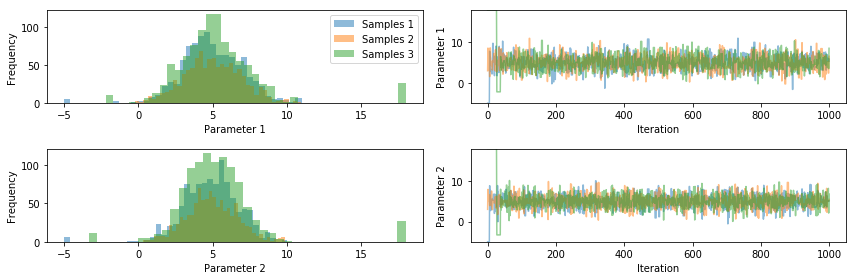

In [3]:
import pints.plot

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 500:, :]

R-hat:
[0.9995982233932075, 0.999238765393701]


/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


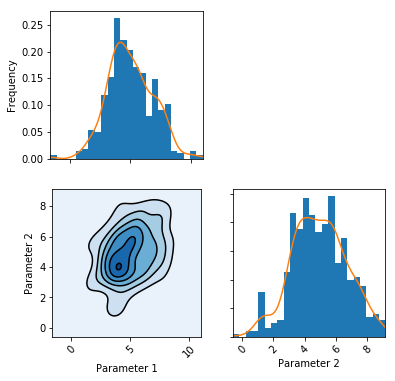

In [4]:
# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

It seems Hamiltonian MCMC does very well at this problem!

## Hamiltonian MCMC on a time-series problem

We now try the same method on a time-series problem

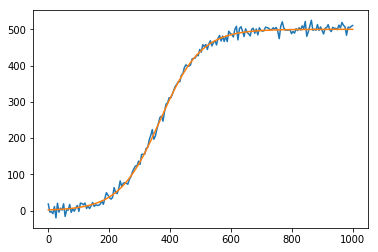

In [5]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

class Model(pints.ForwardModel):
    def __init__(self):
        self.model = toy.LogisticModel()
    def simulate(self, x, times):
        return self.model.simulate([x[0], 500], times)
    def simulateS1(self, x, times):
        values, gradient = self.model.simulateS1([x[0], 500], times)
        gradient = gradient[:, 0]
        return values, gradient
    def n_parameters(self):
        return 1

# Load a forward model
model = Model()
    
# Create some toy data
real_parameters = np.array([0.015])
times = np.linspace(0, 1000, 200)
org_values = model.simulate(real_parameters, times)

# Add noise
np.random.seed(1)
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)

plt.figure()
plt.plot(times, values)
plt.plot(times, org_values)
plt.show()

Maximising LogPDF
using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 4
Iter. Eval. Best      Time m:s
0     4     -2705.14    0:00.0
1     8     -2705.14    0:00.0
2     12    -2705.14    0:00.0
3     16    -765.3108   0:00.0
20    84    -727.6459   0:00.0
40    164   -727.6452   0:00.0
60    244   -727.6451   0:00.1
80    324   -727.6451   0:00.1
100   404   -727.6451   0:00.1
120   484   -727.6451   0:00.1
140   564   -727.6451   0:00.1
160   644   -727.6451   0:00.1
180   724   -727.6451   0:00.1
200   804   -727.6451   0:00.1
220   884   -727.6451   0:00.1
240   964   -727.6451   0:00.1
260   1044  -727.6451   0:00.1
265   1060  -727.6451   0:00.1
Halting: No significant change for 200 iterations.
0.015039916048041368


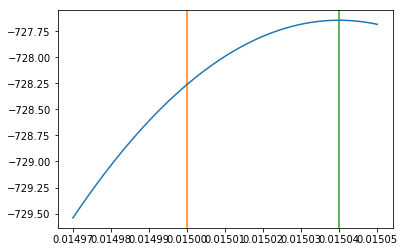

In [6]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function
log_likelihood = pints.KnownNoiseLogLikelihood(problem, noise)

# Find the best parameters
best_parameters, fx = pints.optimise(log_likelihood, real_parameters, method=pints.XNES)
print(best_parameters[0])

# Show the likelihood near the true parameters
plt.figure()
x = np.linspace(0.01497, 0.01505, 500)
y = [log_likelihood([i]) for i in x]
plt.axvline(real_parameters[0], color='tab:orange')
plt.axvline(best_parameters[0], color='tab:green')
plt.plot(x, y)
plt.show()

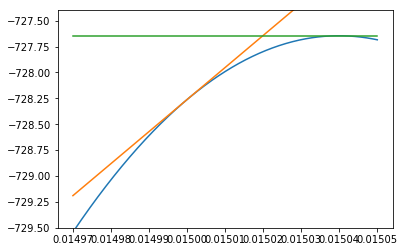

[30936.30067761]
[0.00340721]


In [7]:
# Show derivatives at two points
y1, dy1 = log_likelihood.evaluateS1(real_parameters)
y2, dy2 = log_likelihood.evaluateS1(best_parameters)

# Show the likelihood near the true parameters
x = np.linspace(0.01497, 0.01505, 500)
y = [log_likelihood([i]) for i in x]
z1 = y1 + (x - real_parameters[0]) * dy1
z2 = y2 + (x - best_parameters[0]) * dy2

plt.figure()
#plt.axvline(real_parameters[0], color='tab:orange')
#plt.axvline(best_parameters[0], color='tab:green')
plt.plot(x, y)
plt.plot(x, z1)
plt.plot(x, z2)
plt.ylim(-729.5, -727.4)
plt.show()

print(dy1)
print(dy2)

In [12]:
# Choose starting points for mcmc chains
xs = [
    real_parameters * 1.00001,
    #real_parameters * 0.9,
    #real_parameters * 1.15,
]

# Choose a covariance matrix for the proposal step
sigma0 = np.abs(real_parameters) * 0.01

# Create mcmc routine
mcmc = pints.MCMCSampling(
        log_likelihood, len(xs), xs, sigma0, method=pints.HamiltonianMCMC)

# Add stopping criterion
mcmc.set_max_iterations(1000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_rate(100)

# Set small step size
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.01)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

Running...
Using Hamiltonian MCMC
Generating 1 chains.
Running in sequential mode.
728.256713000007 [-30819.35086585]
Iter. Eval. iMCMC Accept.   Time m:s
0     1      1     0          0:00.0
74895.45353329563 [954.04121514]
75114.37632074652 [0.88784773]
75114.55289710837 [0.00062223]
75114.55302084601 [4.35990664e-07]
75114.55302093271 [3.05492931e-10]
75114.55302093277 [2.14054884e-13]
75114.55302093277 [1.49985445e-16]
75114.55302093277 [1.05092831e-19]
75114.55302093277 [7.36371665e-23]
75114.55302093277 [5.15965953e-26]
75114.55302093277 [3.61530565e-29]
75114.55302093277 [2.53319718e-32]
75114.55302093277 [1.77497799e-35]
75114.55302093277 [1.24370376e-38]
75114.55302093277 [8.71446889e-42]
75114.55302093277 [6.10611388e-45]
75114.55302093277 [4.27847378e-48]
75114.55302093277 [2.99787038e-51]
75114.55302093277 [2.1005684e-54]
75114.55302093277 [1.47184068e-57]
1     21     2     0          0:00.0
74895.87749251426 [952.48735662]
75114.37724600597 [0.88319915]
75114.55289812802 

75114.55302093277 [8.96177347e-42]
75114.55302093277 [6.29132984e-45]
75114.55302093277 [4.41662928e-48]
75114.55302093277 [3.100555e-51]
75114.55302093277 [2.17664665e-54]
75114.55302093277 [1.52804599e-57]
74895.47167691724 [953.97474062]
75114.37636041472 [0.88764843]
75114.55289715214 [0.00062201]
75114.55302084607 [4.35780266e-07]
75114.55302093271 [3.05306098e-10]
75114.55302093277 [2.13896363e-13]
75114.55302093277 [1.49855028e-16]
75114.55302093277 [1.04987897e-19]
75114.55302093277 [7.35541461e-23]
75114.55302093277 [5.15317722e-26]
75114.55302093277 [3.61029756e-29]
75114.55302093277 [2.52936158e-32]
75114.55302093277 [1.77206169e-35]
75114.55302093277 [1.24150009e-38]
75114.55302093277 [8.69790533e-42]
75114.55302093277 [6.09372142e-45]
75114.55302093277 [4.26923947e-48]
75114.55302093277 [2.99101393e-51]
75114.55302093277 [2.09549368e-54]
75114.55302093277 [1.46809539e-57]
74895.51576231157 [953.81321186]
75114.37645677404 [0.88716431]
75114.55289725846 [0.00062148]
75114.5

74895.69199143487 [953.16738273]
75114.37684159061 [0.88523097]
75114.55289768273 [0.00061935]
75114.55302084656 [4.332325e-07]
75114.55302093271 [3.03045614e-10]
75114.55302093277 [2.11980043e-13]
75114.55302093277 [1.48279786e-16]
75114.55302093277 [1.03721532e-19]
75114.55302093277 [7.25530872e-23]
75114.55302093277 [5.07507974e-26]
75114.55302093277 [3.55001219e-29]
75114.55302093277 [2.48322926e-32]
75114.55302093277 [1.73701589e-35]
75114.55302093277 [1.21504053e-38]
75114.55302093277 [8.49919392e-42]
75114.55302093277 [5.94517594e-45]
75114.55302093277 [4.15864344e-48]
75114.55302093277 [2.90896609e-51]
75114.55302093277 [2.03481829e-54]
75114.55302093277 [1.42335295e-57]
74895.72243287225 [953.05580317]
75114.37690800226 [0.88489731]
75114.5528977559 [0.00061898]
75114.55302084665 [4.32881491e-07]
75114.55302093271 [3.02734463e-10]
75114.55302093277 [2.11716502e-13]
75114.55302093277 [1.48063345e-16]
75114.55302093277 [1.03547687e-19]
75114.55302093277 [7.24157862e-23]
75114.55

75114.55302093277 [5.12391411e-26]
75114.55302093277 [3.58769757e-29]
75114.55302093277 [2.51205886e-32]
75114.55302093277 [1.75891072e-35]
75114.55302093277 [1.23156626e-38]
75114.55302093277 [8.62326569e-42]
75114.55302093277 [6.03789773e-45]
75114.55302093277 [4.22765693e-48]
75114.55302093277 [2.96015003e-51]
75114.55302093277 [2.07265829e-54]
75114.55302093277 [1.4512482e-57]
74895.52244305784 [953.78873252]
75114.37647137318 [0.88709097]
75114.55289727458 [0.0006214]
75114.55302084619 [4.3519204e-07]
75114.55302093271 [3.04783884e-10]
75114.55302093277 [2.13453389e-13]
75114.55302093277 [1.49490678e-16]
75114.55302093277 [1.04694813e-19]
75114.55302093277 [7.33223242e-23]
75114.55302093277 [5.13508077e-26]
75114.55302093277 [3.59632006e-29]
75114.55302093277 [2.51865911e-32]
75114.55302093277 [1.76392635e-35]
75114.55302093277 [1.23535422e-38]
75114.55302093277 [8.65172206e-42]
75114.55302093277 [6.05917667e-45]
75114.55302093277 [4.24350454e-48]
75114.55302093277 [2.97191051e-51

75114.55302093271 [3.04631111e-10]
75114.55302093277 [2.13323829e-13]
75114.55302093277 [1.49384138e-16]
75114.55302093277 [1.04609133e-19]
75114.55302093277 [7.32545688e-23]
75114.55302093277 [5.1297929e-26]
75114.55302093277 [3.59223671e-29]
75114.55302093277 [2.51553325e-32]
75114.55302093277 [1.76155082e-35]
75114.55302093277 [1.23356004e-38]
75114.55302093277 [8.63824283e-42]
75114.55302093277 [6.04909665e-45]
75114.55302093277 [4.23599696e-48]
75114.55302093277 [2.96633881e-51]
75114.55302093277 [2.07723614e-54]
75114.55302093277 [1.45462479e-57]
74895.5876792767 [953.5496812]
75114.37661388547 [0.88637498]
75114.55289743174 [0.00062061]
75114.55302084633 [4.34437165e-07]
75114.55302093271 [3.04114e-10]
75114.55302093277 [2.12885389e-13]
75114.55302093277 [1.49023685e-16]
75114.55302093277 [1.04319318e-19]
75114.55302093277 [7.30254401e-23]
75114.55302093277 [5.11191502e-26]
75114.55302093277 [3.57843446e-29]
75114.55302093277 [2.50496989e-32]
75114.55302093277 [1.75352496e-35]
7

75114.55302093277 [2.1384733e-13]
75114.55302093277 [1.49814692e-16]
75114.55302093277 [1.04955446e-19]
75114.55302093277 [7.35284734e-23]
75114.55302093277 [5.15117283e-26]
75114.55302093277 [3.60874915e-29]
75114.55302093277 [2.52817578e-32]
75114.55302093277 [1.77116018e-35]
75114.55302093277 [1.24081893e-38]
75114.55302093277 [8.69278592e-42]
75114.55302093277 [6.08989152e-45]
75114.55302093277 [4.26638584e-48]
75114.55302093277 [2.9888953e-51]
75114.55302093277 [2.09392573e-54]
75114.55302093277 [1.4669383e-57]
74895.60009281948 [953.50418994]
75114.37664099426 [0.88623878]
75114.55289746165 [0.00062046]
75114.55302084635 [4.34293652e-07]
75114.55302093271 [3.03986681e-10]
75114.55302093277 [2.12777464e-13]
75114.55302093277 [1.48934977e-16]
75114.55302093277 [1.0424801e-19]
75114.55302093277 [7.29690761e-23]
75114.55302093277 [5.10751818e-26]
75114.55302093277 [3.57504073e-29]
75114.55302093277 [2.50237312e-32]
75114.55302093277 [1.75155242e-35]
75114.55302093277 [1.22601057e-38]

75114.55302093277 [1.21529857e-38]
75114.55302093277 [8.5011303e-42]
75114.55302093277 [5.94662235e-45]
75114.55302093277 [4.15971948e-48]
75114.55302093277 [2.90976376e-51]
75114.55302093277 [2.03540771e-54]
75114.55302093277 [1.42378726e-57]
74895.44511135778 [954.07207066]
75114.37630233109 [0.88794025]
75114.55289708806 [0.00062234]
75114.553020846 [4.36088357e-07]
75114.55302093271 [3.0557969e-10]
75114.55302093277 [2.14128503e-13]
75114.55302093277 [1.50046019e-16]
75114.55302093277 [1.05141573e-19]
75114.55302093277 [7.36757331e-23]
75114.55302093277 [5.16267113e-26]
75114.55302093277 [3.61763258e-29]
75114.55302093277 [2.5349795e-32]
75114.55302093277 [1.77633325e-35]
75114.55302093277 [1.24472795e-38]
75114.55302093277 [8.72216776e-42]
75114.55302093277 [6.11187453e-45]
75114.55302093277 [4.28276678e-48]
75114.55302093277 [3.00105822e-51]
75114.55302093277 [2.10292806e-54]
75114.55302093277 [1.47358235e-57]
74895.34702708555 [954.43138895]
75114.37608775895 [0.88901827]
75114.

75114.55302093277 [4.209222e-48]
75114.55302093277 [2.94647282e-51]
75114.55302093277 [2.06254317e-54]
75114.55302093277 [1.44378875e-57]
74895.69421301366 [953.15923999]
75114.37684643785 [0.88520661]
75114.55289768806 [0.00061932]
75114.55302084656 [4.33206875e-07]
75114.55302093271 [3.03022896e-10]
75114.55302093277 [2.119608e-13]
75114.55302093277 [1.4826398e-16]
75114.55302093277 [1.03708836e-19]
75114.55302093277 [7.25430588e-23]
75114.55302093277 [5.074298e-26]
75114.55302093277 [3.54940922e-29]
75114.55302093277 [2.48276822e-32]
75114.55302093277 [1.73666592e-35]
75114.55302093277 [1.21477651e-38]
75114.55302093277 [8.49721274e-42]
75114.55302093277 [5.9436961e-45]
75114.55302093277 [4.15754253e-48]
75114.55302093277 [2.90815001e-51]
75114.55302093277 [2.03421527e-54]
75114.55302093277 [1.42290863e-57]
74895.71467822482 [953.0842275]
75114.37689108626 [0.8849823]
75114.55289773726 [0.00061907]
75114.55302084662 [4.32970884e-07]
75114.55302093271 [3.02813698e-10]
75114.553020932

74895.76246931603 [952.90904506]
75114.37699531933 [0.88445862]
75114.55289785207 [0.0006185]
75114.55302084672 [4.32420224e-07]
75114.55302093271 [3.02325677e-10]
75114.55302093277 [2.11370352e-13]
75114.55302093277 [1.47779131e-16]
75114.55302093277 [1.03319464e-19]
75114.55302093277 [7.22355829e-23]
75114.55302093277 [5.05033537e-26]
75114.55302093277 [3.5309312e-29]
75114.55302093277 [2.46864301e-32]
75114.55302093277 [1.7259465e-35]
75114.55302093277 [1.20669181e-38]
75114.55302093277 [8.43656004e-42]
75114.55302093277 [5.89840295e-45]
75114.55302093277 [4.12385584e-48]
75114.55302093277 [2.88318501e-51]
75114.55302093277 [2.01577265e-54]
75114.55302093277 [1.40932315e-57]
74895.38137953421 [954.30555057]
75114.37616293058 [0.88864061]
75114.55289693414 [0.00062311]
75114.55302084584 [4.36828254e-07]
75114.55302093271 [3.06236948e-10]
75114.55302093277 [2.14686361e-13]
75114.55302093277 [1.50505137e-16]
75114.55302093277 [1.05511109e-19]
75114.55302093277 [7.3968201e-23]
75114.553

75114.55302093277 [6.0570684e-45]
75114.55302093277 [4.24193424e-48]
75114.55302093277 [2.97074507e-51]
75114.55302093277 [2.08049578e-54]
75114.55302093277 [1.45702933e-57]
74895.62156741189 [953.42549075]
75114.3766878836 [0.8860032]
75114.55289751333 [0.0006202]
75114.5530208464 [4.34045483e-07]
75114.55302093271 [3.0376654e-10]
75114.55302093277 [2.12590879e-13]
75114.55302093277 [1.48781633e-16]
75114.55302093277 [1.0412476e-19]
75114.55302093277 [7.28716675e-23]
75114.55302093277 [5.09992044e-26]
75114.55302093277 [3.56917707e-29]
75114.55302093277 [2.497887e-32]
75114.55302093277 [1.74814511e-35]
75114.55302093277 [1.22343859e-38]
75114.55302093277 [8.56222956e-42]
75114.55302093277 [5.99227258e-45]
75114.55302093277 [4.19368932e-48]
75114.55302093277 [2.93495162e-51]
75114.55302093277 [2.0540246e-54]
75114.55302093277 [1.43750821e-57]
74895.69397858813 [953.16009923]
75114.37684592637 [0.88520918]
75114.5528976875 [0.00061932]
75114.55302084656 [4.33209579e-07]
75114.5530209327

75114.55302093277 [4.33054435e-48]
75114.55302093277 [3.03654911e-51]
75114.55302093277 [2.12920819e-54]
75114.55302093277 [1.49298673e-57]
74895.38716371734 [954.28436146]
75114.37617558557 [0.88857703]
75114.55289694812 [0.00062304]
75114.55302084587 [4.36761057e-07]
75114.55302093271 [3.06177244e-10]
75114.55302093277 [2.14635676e-13]
75114.55302093277 [1.50463414e-16]
75114.55302093277 [1.05477521e-19]
75114.55302093277 [7.39416119e-23]
75114.55302093277 [5.18343808e-26]
75114.55302093277 [3.63368199e-29]
75114.55302093277 [2.54727549e-32]
75114.55302093277 [1.78568528e-35]
75114.55302093277 [1.25179704e-38]
75114.55302093277 [8.77531916e-42]
75114.55302093277 [6.1516543e-45]
75114.55302093277 [4.31241872e-48]
75114.55302093277 [3.02308198e-51]
75114.55302093277 [2.11923406e-54]
75114.55302093277 [1.48562065e-57]
74895.47286143358 [953.97040072]
75114.37636300425 [0.88763542]
75114.55289715501 [0.000622]
75114.55302084607 [4.35766533e-07]
75114.55302093271 [3.05293905e-10]
75114.55

74895.4931869694 [953.89592943]
75114.37640743486 [0.8874122]
75114.55289720403 [0.00062175]
75114.5530208461 [4.35530945e-07]
75114.55302093271 [3.05084733e-10]
75114.55302093277 [2.13708568e-13]
75114.55302093277 [1.49700549e-16]
75114.55302093277 [1.04863621e-19]
75114.55302093277 [7.34558366e-23]
75114.55302093277 [5.1455022e-26]
75114.55302093277 [3.60436884e-29]
75114.55302093277 [2.52482153e-32]
75114.55302093277 [1.76861027e-35]
75114.55302093277 [1.23889244e-38]
75114.55302093277 [8.67830801e-42]
75114.55302093277 [6.07906124e-45]
75114.55302093277 [4.25831689e-48]
75114.55302093277 [2.98290509e-51]
75114.55302093277 [2.08949287e-54]
75114.55302093277 [1.46366724e-57]
74895.52979852205 [953.76178057]
75114.37648744573 [0.88701022]
75114.5528972923 [0.00062131]
75114.5530208462 [4.35106869e-07]
75114.55302093271 [3.04708287e-10]
75114.55302093277 [2.13389277e-13]
75114.55302093277 [1.49437956e-16]
75114.55302093277 [1.04652412e-19]
75114.55302093277 [7.32887931e-23]
75114.55302

75114.55302093277 [1.48910408e-16]
75114.55302093277 [1.04228262e-19]
75114.55302093277 [7.29534675e-23]
75114.55302093277 [5.10630064e-26]
75114.55302093277 [3.57410102e-29]
75114.55302093277 [2.50165413e-32]
75114.55302093277 [1.7510063e-35]
75114.55302093277 [1.2255983e-38]
75114.55302093277 [8.57844544e-42]
75114.55302093277 [6.00439198e-45]
75114.55302093277 [4.20271053e-48]
75114.55302093277 [2.9416427e-51]
75114.55302093277 [2.05897163e-54]
75114.55302093277 [1.44115538e-57]
74895.48987789729 [953.90805381]
75114.37640020195 [0.88744854]
75114.55289719604 [0.00062179]
75114.5530208461 [4.35569292e-07]
75114.55302093271 [3.05118778e-10]
75114.55302093277 [2.13737448e-13]
75114.55302093277 [1.49724304e-16]
75114.55302093277 [1.04882731e-19]
75114.55302093277 [7.34709523e-23]
75114.55302093277 [5.1466822e-26]
75114.55302093277 [3.6052803e-29]
75114.55302093277 [2.52551945e-32]
75114.55302093277 [1.76914081e-35]
75114.55302093277 [1.23929325e-38]
75114.55302093277 [8.68132005e-42]
7

75114.55302093277 [6.20981379e-45]
75114.55302093277 [4.35579288e-48]
75114.55302093277 [3.05531409e-51]
75114.55302093277 [2.14311021e-54]
75114.55302093277 [1.5032567e-57]
74895.68618980385 [953.18864725]
75114.37682893164 [0.88529457]
75114.55289766878 [0.00061942]
75114.55302084655 [4.33299424e-07]
75114.55302093271 [3.03104946e-10]
75114.55302093277 [2.12030304e-13]
75114.55302093277 [1.48321069e-16]
75114.55302093277 [1.03754695e-19]
75114.55302093277 [7.25792824e-23]
75114.55302093277 [5.07712179e-26]
75114.55302093277 [3.55158729e-29]
75114.55302093277 [2.48443366e-32]
75114.55302093277 [1.73793014e-35]
75114.55302093277 [1.21573026e-38]
75114.55302093277 [8.50436985e-42]
75114.55302093277 [5.94904222e-45]
75114.55302093277 [4.16151977e-48]
75114.55302093277 [2.91109832e-51]
75114.55302093277 [2.03639389e-54]
75114.55302093277 [1.42451392e-57]
74895.41662552839 [954.17643104]
75114.37624003379 [0.88825323]
75114.55289701928 [0.00062268]
75114.55302084594 [4.36418929e-07]
75114.

75114.55302093277 [1.50326579e-16]
75114.55302093277 [1.05367372e-19]
75114.55302093277 [7.38544247e-23]
75114.55302093277 [5.17662722e-26]
75114.55302093277 [3.62841759e-29]
75114.55302093277 [2.5432417e-32]
75114.55302093277 [1.78261686e-35]
75114.55302093277 [1.24947733e-38]
75114.55302093277 [8.75787522e-42]
75114.55302093277 [6.13859704e-45]
75114.55302093277 [4.30268446e-48]
75114.55302093277 [3.01585092e-51]
75114.55302093277 [2.11387957e-54]
75114.55302093277 [1.48166702e-57]
74895.48452235824 [953.92767627]
75114.37638849542 [0.88750735]
75114.55289718314 [0.00062186]
75114.55302084608 [4.35631361e-07]
75114.55302093271 [3.05173886e-10]
75114.55302093277 [2.13784197e-13]
75114.55302093277 [1.49762758e-16]
75114.55302093277 [1.04913665e-19]
75114.55302093277 [7.34954224e-23]
75114.55302093277 [5.14859251e-26]
75114.55302093277 [3.60675591e-29]
75114.55302093277 [2.5266494e-32]
75114.55302093277 [1.76999978e-35]
75114.55302093277 [1.23994221e-38]
75114.55302093277 [8.68619699e-4

75114.55302093277 [6.08741271e-45]
75114.55302093277 [4.26453895e-48]
75114.55302093277 [2.98752415e-51]
75114.55302093277 [2.09291101e-54]
75114.55302093277 [1.46618949e-57]
74895.5022243633 [953.86281621]
75114.37642718758 [0.88731296]
75114.55289722583 [0.00062164]
75114.55302084613 [4.3542623e-07]
75114.55302093271 [3.0499177e-10]
75114.55302093277 [2.13629712e-13]
75114.55302093277 [1.49635689e-16]
75114.55302093277 [1.04811448e-19]
75114.55302093277 [7.34145693e-23]
75114.55302093277 [5.1422808e-26]
75114.55302093277 [3.60188068e-29]
75114.55302093277 [2.52291637e-32]
75114.55302093277 [1.7671621e-35]
75114.55302093277 [1.23779842e-38]
75114.55302093277 [8.67008701e-42]
75114.55302093277 [6.07291202e-45]
75114.55302093277 [4.2537359e-48]
75114.55302093277 [2.97950457e-51]
75114.55302093277 [2.08697665e-54]
75114.55302093277 [1.46181066e-57]
74895.29290976255 [954.62961359]
75114.37596929059 [0.88961347]
75114.55289672026 [0.00062418]
75114.55302084563 [4.37857161e-07]
75114.55302

75114.55302093277 [5.10640114e-26]
75114.55302093277 [3.57417858e-29]
75114.55302093277 [2.50171348e-32]
75114.55302093277 [1.75105137e-35]
75114.55302093277 [1.22563233e-38]
75114.55302093277 [8.57870093e-42]
75114.55302093277 [6.00458294e-45]
75114.55302093277 [4.20285269e-48]
75114.55302093277 [2.94174814e-51]
75114.55302093277 [2.0590496e-54]
75114.55302093277 [1.44121286e-57]
74895.52054590934 [953.79568401]
75114.37646722751 [0.8871118]
75114.55289727001 [0.00062142]
75114.55302084619 [4.35214009e-07]
75114.55302093271 [3.04803385e-10]
75114.55302093277 [2.13469928e-13]
75114.55302093277 [1.49504279e-16]
75114.55302093277 [1.04705752e-19]
75114.55302093277 [7.3330975e-23]
75114.55302093277 [5.13575595e-26]
75114.55302093277 [3.59684147e-29]
75114.55302093277 [2.51905828e-32]
75114.55302093277 [1.76422972e-35]
75114.55302093277 [1.23558336e-38]
75114.55302093277 [8.65344367e-42]
75114.55302093277 [6.06046419e-45]
75114.55302093277 [4.24446355e-48]
75114.55302093277 [2.97262227e-51

75114.55302093277 [7.29413056e-23]
75114.55302093277 [5.10535199e-26]
75114.55302093277 [3.57336885e-29]
75114.55302093277 [2.50109395e-32]
75114.55302093277 [1.75058081e-35]
75114.55302093277 [1.22527711e-38]
75114.55302093277 [8.57603369e-42]
75114.55302093277 [6.00258939e-45]
75114.55302093277 [4.20136868e-48]
75114.55302093277 [2.94064739e-51]
75114.55302093277 [2.05823571e-54]
75114.55302093277 [1.44061279e-57]
74895.54592413637 [953.70269174]
75114.37652267842 [0.88683321]
75114.55289733116 [0.00062111]
75114.55302084623 [4.34920199e-07]
75114.55302093271 [3.04542614e-10]
75114.55302093277 [2.13248784e-13]
75114.55302093277 [1.49322432e-16]
75114.55302093277 [1.04559512e-19]
75114.55302093277 [7.32153326e-23]
75114.55302093277 [5.12673102e-26]
75114.55302093277 [3.5898725e-29]
75114.55302093277 [2.51372357e-32]
75114.55302093277 [1.76017565e-35]
75114.55302093277 [1.23252149e-38]
75114.55302093277 [8.63044112e-42]
75114.55302093277 [6.04326288e-45]
75114.55302093277 [4.23165232e-

75114.55302093277 [1.78814586e-35]
75114.55302093277 [1.25365745e-38]
75114.55302093277 [8.78931094e-42]
75114.55302093277 [6.1621288e-45]
75114.55302093277 [4.32022848e-48]
75114.55302093277 [3.02888412e-51]
75114.55302093277 [2.12353098e-54]
75114.55302093277 [1.48879378e-57]
74895.28306943 [954.66565539]
75114.37594774301 [0.88972172]
75114.55289669643 [0.0006243]
75114.55302084562 [4.37971735e-07]
75114.55302093271 [3.07253301e-10]
75114.55302093277 [2.15549505e-13]
75114.55302093277 [1.51215916e-16]
75114.55302093277 [1.06083533e-19]
75114.55302093277 [7.44215053e-23]
75114.55302093277 [5.22094266e-26]
75114.55302093277 [3.66268354e-29]
75114.55302093277 [2.56950738e-32]
75114.55302093277 [1.80260405e-35]
75114.55302093277 [1.26459313e-38]
75114.55302093277 [8.87158647e-42]
75114.55302093277 [6.22374461e-45]
75114.55302093277 [4.36618604e-48]
75114.55302093277 [3.0630403e-51]
75114.55302093277 [2.14883557e-54]
75114.55302093277 [1.50748728e-57]
74895.52396515808 [953.78315526]
751

75114.55302093277 [2.1455585e-54]
75114.55302093277 [1.50506572e-57]
74895.58122733205 [953.57332491]
75114.37659979449 [0.88644577]
75114.55289741622 [0.00062069]
75114.5530208463 [4.34511772e-07]
75114.55302093271 [3.04180193e-10]
75114.55302093277 [2.12941503e-13]
75114.55302093277 [1.49069811e-16]
75114.55302093277 [1.04356399e-19]
75114.55302093277 [7.30547515e-23]
75114.55302093277 [5.1142017e-26]
75114.55302093277 [3.58019957e-29]
75114.55302093277 [2.50632058e-32]
75114.55302093277 [1.75455103e-35]
75114.55302093277 [1.22827437e-38]
75114.55302093277 [8.59854112e-42]
75114.55302093277 [6.01941321e-45]
75114.55302093277 [4.21389336e-48]
75114.55302093277 [2.94993825e-51]
75114.55302093277 [2.06510581e-54]
75114.55302093277 [1.4456784e-57]
74895.46789867581 [953.9885835]
75114.37635215471 [0.88768993]
75114.55289714303 [0.00062206]
75114.55302084606 [4.35824072e-07]
75114.55302093271 [3.05344996e-10]
75114.55302093277 [2.13929364e-13]
75114.55302093277 [1.49882177e-16]
75114.5530

75114.55302084592 [4.36491188e-07]
75114.55302093271 [3.05937492e-10]
75114.55302093277 [2.14432161e-13]
75114.55302093277 [1.50295904e-16]
75114.55302093277 [1.05342681e-19]
75114.55302093277 [7.38348825e-23]
75114.55302093277 [5.17510076e-26]
75114.55302093277 [3.62723782e-29]
75114.55302093277 [2.54233779e-32]
75114.55302093277 [1.78192932e-35]
75114.55302093277 [1.2489576e-38]
75114.55302093277 [8.75396725e-42]
75114.55302093277 [6.13567206e-45]
75114.55302093277 [4.30050405e-48]
75114.55302093277 [3.01423135e-51]
75114.55302093277 [2.1126804e-54]
75114.55302093277 [1.48078166e-57]
74895.55502236982 [953.66935249]
75114.37654255483 [0.88673335]
75114.55289735309 [0.000621]
75114.55302084626 [4.34814908e-07]
75114.55302093271 [3.04449175e-10]
75114.55302093277 [2.13169553e-13]
75114.55302093277 [1.49257289e-16]
75114.55302093277 [1.04507131e-19]
75114.55302093277 [7.31739162e-23]
75114.55302093277 [5.12349921e-26]
75114.55302093277 [3.58737724e-29]
75114.55302093277 [2.51181369e-32]

75114.55302093277 [1.2312095e-38]
75114.55302093277 [8.62058591e-42]
75114.55302093277 [6.03589411e-45]
75114.55302093277 [4.22616491e-48]
75114.55302093277 [2.95904294e-51]
75114.55302093277 [2.07183943e-54]
75114.55302093277 [1.45064425e-57]
74895.288106372 [954.64720686]
75114.37595877274 [0.88966631]
75114.55289670863 [0.00062424]
75114.55302084563 [4.37913085e-07]
75114.55302093271 [3.07201154e-10]
75114.55302093277 [2.15505204e-13]
75114.55302093277 [1.51179423e-16]
75114.55302093277 [1.06054134e-19]
75114.55302093277 [7.43982164e-23]
75114.55302093277 [5.21912195e-26]
75114.55302093277 [3.66127512e-29]
75114.55302093277 [2.56842735e-32]
75114.55302093277 [1.80178184e-35]
75114.55302093277 [1.26397105e-38]
75114.55302093277 [8.86690481e-42]
75114.55302093277 [6.22023749e-45]
75114.55302093277 [4.3635694e-48]
75114.55302093277 [3.061095e-51]
75114.55302093277 [2.14739396e-54]
75114.55302093277 [1.506422e-57]
74895.2979124428 [954.61129023]
75114.37598024435 [0.88955843]
75114.5528

75114.55302093277 [1.4198682e-57]
74895.52134898533 [953.7927414]
75114.3764689824 [0.88710298]
75114.55289727193 [0.00062141]
75114.55302084619 [4.35204709e-07]
75114.55302093271 [3.0479513e-10]
75114.55302093277 [2.13462927e-13]
75114.55302093277 [1.49498521e-16]
75114.55302093277 [1.04701122e-19]
75114.55302093277 [7.3327313e-23]
75114.55302093277 [5.13547013e-26]
75114.55302093277 [3.59662074e-29]
75114.55302093277 [2.5188893e-32]
75114.55302093277 [1.76410129e-35]
75114.55302093277 [1.23548636e-38]
75114.55302093277 [8.65271486e-42]
75114.55302093277 [6.05991914e-45]
75114.55302093277 [4.24405757e-48]
75114.55302093277 [2.97232095e-51]
75114.55302093277 [2.08166164e-54]
75114.55302093277 [1.4578894e-57]
74895.62741988973 [953.40404232]
75114.37670066084 [0.88593901]
75114.5528975274 [0.00062013]
75114.55302084642 [4.3397787e-07]
75114.55302093271 [3.0370657e-10]
75114.55302093277 [2.12540055e-13]
75114.55302093277 [1.48739868e-16]
75114.55302093277 [1.04091195e-19]
75114.553020932

75114.55302084622 [4.35020001e-07]
75114.55302093271 [3.04631188e-10]
75114.55302093277 [2.13323894e-13]
75114.55302093277 [1.49384191e-16]
75114.55302093277 [1.04609175e-19]
75114.55302093277 [7.32546027e-23]
75114.55302093277 [5.12979554e-26]
75114.55302093277 [3.59223876e-29]
75114.55302093277 [2.51553481e-32]
75114.55302093277 [1.76155201e-35]
75114.55302093277 [1.23356094e-38]
75114.55302093277 [8.63824957e-42]
75114.55302093277 [6.04910169e-45]
75114.55302093277 [4.23600071e-48]
75114.55302093277 [2.9663416e-51]
75114.55302093277 [2.0772382e-54]
75114.55302093277 [1.45462631e-57]
74895.2568449361 [954.76170374]
75114.37589030954 [0.89001027]
75114.55289663297 [0.00062462]
75114.55302084556 [4.38277202e-07]
75114.55302093271 [3.07524928e-10]
75114.55302093277 [2.15780289e-13]
75114.55302093277 [1.51406045e-16]
75114.55302093277 [1.06236721e-19]
75114.55302093277 [7.45428689e-23]
75114.55302093277 [5.23043185e-26]
75114.55302093277 [3.67002474e-29]
75114.55302093277 [2.57513758e-32

75114.55302093277 [1.75476912e-35]
75114.55302093277 [1.22843903e-38]
75114.55302093277 [8.59977772e-42]
75114.55302093277 [6.02033762e-45]
75114.55302093277 [4.21458162e-48]
75114.55302093277 [2.95044885e-51]
75114.55302093277 [2.06548341e-54]
75114.55302093277 [1.44595685e-57]
74895.55148244432 [953.68232413]
75114.37653482155 [0.8867722]
75114.55289734455 [0.00062105]
75114.55302084623 [4.34855872e-07]
75114.55302093271 [3.04485527e-10]
75114.55302093277 [2.13200377e-13]
75114.55302093277 [1.49282632e-16]
75114.55302093277 [1.04527508e-19]
75114.55302093277 [7.31900278e-23]
75114.55302093277 [5.1247564e-26]
75114.55302093277 [3.58834789e-29]
75114.55302093277 [2.51255661e-32]
75114.55302093277 [1.75928893e-35]
75114.55302093277 [1.23185187e-38]
75114.55302093277 [8.62541104e-42]
75114.55302093277 [6.0395018e-45]
75114.55302093277 [4.22885145e-48]
75114.55302093277 [2.96103639e-51]
75114.55302093277 [2.0733139e-54]
75114.55302093277 [1.45173174e-57]
74895.5202011854 [953.79694714]
75

75114.55302093277 [7.38015567e-23]
75114.55302093277 [5.17249774e-26]
75114.55302093277 [3.62522609e-29]
75114.55302093277 [2.54079651e-32]
75114.55302093277 [1.78075705e-35]
75114.55302093277 [1.24807148e-38]
75114.55302093277 [8.74730455e-42]
75114.55302093277 [6.13068546e-45]
75114.55302093277 [4.29678697e-48]
75114.55302093277 [3.01147048e-51]
75114.55302093277 [2.11063627e-54]
75114.55302093277 [1.4792725e-57]
74895.48090581641 [953.94092701]
75114.37638058983 [0.88754707]
75114.55289717442 [0.0006219]
75114.55302084608 [4.35673279e-07]
75114.55302093271 [3.05211104e-10]
75114.55302093277 [2.13815771e-13]
75114.55302093277 [1.4978873e-16]
75114.55302093277 [1.0493456e-19]
75114.55302093277 [7.35119511e-23]
75114.55302093277 [5.14988291e-26]
75114.55302093277 [3.6077527e-29]
75114.55302093277 [2.52741271e-32]
75114.55302093277 [1.77058006e-35]
75114.55302093277 [1.24038063e-38]
75114.55302093277 [8.68949185e-42]
75114.55302093277 [6.08742727e-45]
75114.55302093277 [4.2645498e-48]
7

75114.55302093271 [3.03280912e-10]
75114.55302093277 [2.12179376e-13]
75114.55302093277 [1.48443525e-16]
75114.55302093277 [1.03853072e-19]
75114.55302093277 [7.26569963e-23]
75114.55302093277 [5.08318049e-26]
75114.55302093277 [3.55626095e-29]
75114.55302093277 [2.48800765e-32]
75114.55302093277 [1.74064338e-35]
75114.55302093277 [1.21777735e-38]
75114.55302093277 [8.51973296e-42]
75114.55302093277 [5.96051895e-45]
75114.55302093277 [4.17005866e-48]
75114.55302093277 [2.91742872e-51]
75114.55302093277 [2.04107209e-54]
75114.55302093277 [1.42796129e-57]
74895.48682897624 [953.91922494]
75114.37639353746 [0.88748202]
75114.55289718871 [0.00062183]
75114.55302084608 [4.35604627e-07]
75114.55302093271 [3.0515015e-10]
75114.55302093277 [2.13764061e-13]
75114.55302093277 [1.49746195e-16]
75114.55302093277 [1.04900341e-19]
75114.55302093277 [7.34848822e-23]
75114.55302093277 [5.14776966e-26]
75114.55302093277 [3.60612029e-29]
75114.55302093277 [2.52616267e-32]
75114.55302093277 [1.76962978e-

75114.55302093277 [5.1552937e-26]
75114.55302093277 [3.61193264e-29]
75114.55302093277 [2.5306138e-32]
75114.55302093277 [1.77301375e-35]
75114.55302093277 [1.24221947e-38]
75114.55302093277 [8.70331219e-42]
75114.55302093277 [6.09776653e-45]
75114.55302093277 [4.27225358e-48]
75114.55302093277 [2.9932518e-51]
75114.55302093277 [2.09714994e-54]
75114.55302093277 [1.4693177e-57]
74895.46096719008 [954.01397913]
75114.37633700034 [0.88776607]
75114.55289712631 [0.00062214]
75114.55302084603 [4.35904448e-07]
75114.55302093271 [3.05416369e-10]
75114.55302093277 [2.13989921e-13]
75114.55302093277 [1.49931997e-16]
75114.55302093277 [1.05049825e-19]
75114.55302093277 [7.36031403e-23]
75114.55302093277 [5.15700262e-26]
75114.55302093277 [3.61325291e-29]
75114.55302093277 [2.53162496e-32]
75114.55302093277 [1.77378255e-35]
75114.55302093277 [1.24280041e-38]
75114.55302093277 [8.70767869e-42]
75114.55302093277 [6.10103342e-45]
75114.55302093277 [4.27468791e-48]
75114.55302093277 [2.99505927e-51]

75114.55302093277 [7.41471724e-23]
75114.55302093277 [5.19949962e-26]
75114.55302093277 [3.64609943e-29]
75114.55302093277 [2.55679239e-32]
75114.55302093277 [1.79292624e-35]
75114.55302093277 [1.25727239e-38]
75114.55302093277 [8.81650253e-42]
75114.55302093277 [6.18248816e-45]
75114.55302093277 [4.33541075e-48]
75114.55302093277 [3.04016537e-51]
75114.55302093277 [2.13188692e-54]
75114.55302093277 [1.49496533e-57]
74895.48854039962 [953.91295436]
75114.37639727839 [0.88746323]
75114.55289719283 [0.00062181]
75114.5530208461 [4.35584792e-07]
75114.55302093271 [3.0513254e-10]
75114.55302093277 [2.13749122e-13]
75114.55302093277 [1.49733907e-16]
75114.55302093277 [1.04890456e-19]
75114.55302093277 [7.34770628e-23]
75114.55302093277 [5.14715922e-26]
75114.55302093277 [3.60564876e-29]
75114.55302093277 [2.5258016e-32]
75114.55302093277 [1.76935529e-35]
75114.55302093277 [1.23945529e-38]
75114.55302093277 [8.68253777e-42]
75114.55302093277 [6.08222521e-45]
75114.55302093277 [4.26067407e-48

75114.55302093277 [8.63403883e-42]
75114.55302093277 [6.04595305e-45]
75114.55302093277 [4.23365576e-48]
75114.55302093277 [2.96460144e-51]
75114.55302093277 [2.07595095e-54]
75114.55302093277 [1.4536768e-57]
74895.45048328102 [954.05238956]
75114.37631407751 [0.88788123]
75114.552897101 [0.00062227]
75114.55302084601 [4.36026041e-07]
75114.55302093271 [3.05524349e-10]
75114.55302093277 [2.14081543e-13]
75114.55302093277 [1.50007379e-16]
75114.55302093277 [1.05110481e-19]
75114.55302093277 [7.36511312e-23]
75114.55302093277 [5.16074999e-26]
75114.55302093277 [3.61614819e-29]
75114.55302093277 [2.53384251e-32]
75114.55302093277 [1.77546868e-35]
75114.55302093277 [1.24407458e-38]
75114.55302093277 [8.71725628e-42]
75114.55302093277 [6.1081995e-45]
75114.55302093277 [4.28002801e-48]
75114.55302093277 [2.99902448e-51]
75114.55302093277 [2.10142265e-54]
75114.55302093277 [1.4724712e-57]
74895.581405495 [953.57267202]
75114.37660018359 [0.88644381]
75114.55289741664 [0.00062068]
75114.553020

75114.55302093277 [8.60304137e-42]
75114.55302093277 [6.0227774e-45]
75114.55302093277 [4.21639814e-48]
75114.55302093277 [2.9517965e-51]
75114.55302093277 [2.06648004e-54]
75114.55302093277 [1.44669179e-57]
74895.4314210672 [954.12222692]
75114.37627239297 [0.88809066]
75114.55289705501 [0.0006225]
75114.55302084597 [4.36247203e-07]
75114.55302093271 [3.05720769e-10]
75114.55302093277 [2.14248225e-13]
75114.55302093277 [1.50144532e-16]
75114.55302093277 [1.05220851e-19]
75114.55302093277 [7.3738466e-23]
75114.55302093277 [5.16757023e-26]
75114.55302093277 [3.62141817e-29]
75114.55302093277 [2.53787931e-32]
75114.55302093277 [1.77853843e-35]
75114.55302093277 [1.24639455e-38]
75114.55302093277 [8.73469673e-42]
75114.55302093277 [6.12125003e-45]
75114.55302093277 [4.2897542e-48]
75114.55302093277 [3.00624725e-51]
75114.55302093277 [2.10676932e-54]
75114.55302093277 [1.47641781e-57]
74895.46622980585 [953.99469795]
75114.37634850612 [0.88770826]
75114.55289713902 [0.00062208]
75114.55302

75114.55302093277 [1.50569022e-57]
74895.51683325563 [953.80928777]
75114.3764591144 [0.88715256]
75114.55289726105 [0.00062147]
75114.55302084616 [4.35257006e-07]
75114.55302093271 [3.0484155e-10]
75114.55302093277 [2.13502298e-13]
75114.55302093277 [1.49530899e-16]
75114.55302093277 [1.04727162e-19]
75114.55302093277 [7.33479072e-23]
75114.55302093277 [5.1370775e-26]
75114.55302093277 [3.59786206e-29]
75114.55302093277 [2.51983962e-32]
75114.55302093277 [1.76482355e-35]
75114.55302093277 [1.23603191e-38]
75114.55302093277 [8.65681375e-42]
75114.55302093277 [6.0629846e-45]
75114.55302093277 [4.2463409e-48]
75114.55302093277 [2.97401564e-51]
75114.55302093277 [2.08291544e-54]
75114.55302093277 [1.45881436e-57]
74895.43502902951 [954.10900877]
75114.37628028326 [0.88805102]
75114.55289706371 [0.00062246]
75114.55302084597 [4.36205335e-07]
75114.55302093271 [3.05683583e-10]
75114.55302093277 [2.14216667e-13]
75114.55302093277 [1.50118564e-16]
75114.55302093277 [1.05199953e-19]
75114.5530

75114.55302093277 [1.51293628e-57]
74895.4587011885 [954.02228125]
75114.37633204595 [0.88779096]
75114.55289712086 [0.00062217]
75114.55302084603 [4.35930727e-07]
75114.55302093271 [3.05439705e-10]
75114.55302093277 [2.14009721e-13]
75114.55302093277 [1.49948287e-16]
75114.55302093277 [1.05062933e-19]
75114.55302093277 [7.36135106e-23]
75114.55302093277 [5.15781236e-26]
75114.55302093277 [3.61387851e-29]
75114.55302093277 [2.53210411e-32]
75114.55302093277 [1.77414686e-35]
75114.55302093277 [1.2430757e-38]
75114.55302093277 [8.70974794e-42]
75114.55302093277 [6.10258161e-45]
75114.55302093277 [4.27584158e-48]
75114.55302093277 [2.99591588e-51]
75114.55302093277 [2.09912173e-54]
75114.55302093277 [1.47077295e-57]
74895.48710833627 [953.91820138]
75114.3763941481 [0.88747895]
75114.55289718938 [0.00062183]
75114.55302084608 [4.35601389e-07]
75114.55302093271 [3.05147275e-10]
75114.55302093277 [2.13761622e-13]
75114.55302093277 [1.49744189e-16]
75114.55302093277 [1.04898727e-19]
75114.55

75114.55302093277 [1.44954776e-57]
74895.5358907613 [953.73945708]
75114.37650075718 [0.88694334]
75114.55289730699 [0.00062124]
75114.5530208462 [4.35036337e-07]
75114.55302093271 [3.04645686e-10]
75114.55302093277 [2.13336189e-13]
75114.55302093277 [1.49394301e-16]
75114.55302093277 [1.04617306e-19]
75114.55302093277 [7.32610316e-23]
75114.55302093277 [5.13029725e-26]
75114.55302093277 [3.59262616e-29]
75114.55302093277 [2.51583137e-32]
75114.55302093277 [1.76177737e-35]
75114.55302093277 [1.23373114e-38]
75114.55302093277 [8.63952817e-42]
75114.55302093277 [6.05005781e-45]
75114.55302093277 [4.23671279e-48]
75114.55302093277 [2.96687004e-51]
75114.55302093277 [2.07762911e-54]
75114.55302093277 [1.45491466e-57]
74895.58928049997 [953.54381334]
75114.3766173824 [0.88635741]
75114.5528974356 [0.00062059]
75114.55302084633 [4.34418651e-07]
75114.55302093271 [3.04097574e-10]
75114.55302093277 [2.12871465e-13]
75114.55302093277 [1.4901224e-16]
75114.55302093277 [1.04310118e-19]
75114.5530

75114.55302084613 [4.35450299e-07]
75114.55302093271 [3.05013137e-10]
75114.55302093277 [2.13647836e-13]
75114.55302093277 [1.49650596e-16]
75114.55302093277 [1.04823439e-19]
75114.55302093277 [7.34240533e-23]
75114.55302093277 [5.14302113e-26]
75114.55302093277 [3.60245248e-29]
75114.55302093277 [2.52335418e-32]
75114.55302093277 [1.76749489e-35]
75114.55302093277 [1.23804981e-38]
75114.55302093277 [8.67197608e-42]
75114.55302093277 [6.07432499e-45]
75114.55302093277 [4.2547885e-48]
75114.55302093277 [2.98028591e-51]
75114.55302093277 [2.08755478e-54]
75114.55302093277 [1.46223722e-57]
74895.71525460033 [953.08211484]
75114.3768923436 [0.88497598]
75114.55289773866 [0.00061907]
75114.55302084662 [4.32964239e-07]
75114.55302093271 [3.02807808e-10]
75114.55302093277 [2.1177862e-13]
75114.55302093277 [1.48114357e-16]
75114.55302093277 [1.03588656e-19]
75114.55302093277 [7.24481404e-23]
75114.55302093277 [5.06689945e-26]
75114.55302093277 [3.5437031e-29]
75114.55302093277 [2.47840554e-32]

75114.55302093277 [7.36487567e-23]
75114.55302093277 [5.16056457e-26]
75114.55302093277 [3.61600492e-29]
75114.55302093277 [2.53373278e-32]
75114.55302093277 [1.77538524e-35]
75114.55302093277 [1.24401152e-38]
75114.55302093277 [8.71678229e-42]
75114.55302093277 [6.10784484e-45]
75114.55302093277 [4.27976371e-48]
75114.55302093277 [2.99882822e-51]
75114.55302093277 [2.10127738e-54]
75114.55302093277 [1.47236397e-57]
74895.54668707596 [953.69989607]
75114.37652434522 [0.88682483]
75114.55289733301 [0.0006211]
75114.55302084623 [4.34911369e-07]
75114.55302093271 [3.04534777e-10]
75114.55302093277 [2.13242139e-13]
75114.55302093277 [1.49316969e-16]
75114.55302093277 [1.04555119e-19]
75114.55302093277 [7.32118588e-23]
75114.55302093277 [5.12645994e-26]
75114.55302093277 [3.5896632e-29]
75114.55302093277 [2.51356336e-32]
75114.55302093277 [1.76005391e-35]
75114.55302093277 [1.23242956e-38]
75114.55302093277 [8.62975051e-42]
75114.55302093277 [6.04274649e-45]
75114.55302093277 [4.23126777e-4

74895.48362259955 [953.93097292]
75114.37638652862 [0.88751723]
75114.55289718095 [0.00062187]
75114.55302084608 [4.35641789e-07]
75114.55302093271 [3.05183145e-10]
75114.55302093277 [2.13792051e-13]
75114.55302093277 [1.49769219e-16]
75114.55302093277 [1.04918863e-19]
75114.55302093277 [7.34995342e-23]
75114.55302093277 [5.14891352e-26]
75114.55302093277 [3.60700387e-29]
75114.55302093277 [2.52683928e-32]
75114.55302093277 [1.77014413e-35]
75114.55302093277 [1.24005127e-38]
75114.55302093277 [8.68701661e-42]
75114.55302093277 [6.08557561e-45]
75114.55302093277 [4.26317022e-48]
75114.55302093277 [2.98650801e-51]
75114.55302093277 [2.09215904e-54]
75114.55302093277 [1.46563459e-57]
74895.32662528275 [954.50612031]
75114.37604310397 [0.88924262]
75114.5528968018 [0.00062377]
75114.55302084573 [4.37464799e-07]
75114.55302093271 [3.06802636e-10]
75114.55302093277 [2.15166701e-13]
75114.55302093277 [1.50900624e-16]
75114.55302093277 [1.05829565e-19]
75114.55302093277 [7.42203475e-23]
75114.

75114.55302093277 [1.24053708e-38]
75114.55302093277 [8.69066764e-42]
75114.55302093277 [6.08830686e-45]
75114.55302093277 [4.26520515e-48]
75114.55302093277 [2.98801874e-51]
75114.55302093277 [2.09327703e-54]
75114.55302093277 [1.46645959e-57]
74895.5249379513 [953.77959075]
75114.37647682492 [0.88706358]
75114.55289728059 [0.00062137]
75114.55302084619 [4.35163149e-07]
75114.55302093271 [3.0475824e-10]
75114.55302093277 [2.13431641e-13]
75114.55302093277 [1.49472793e-16]
75114.55302093277 [1.0468043e-19]
75114.55302093277 [7.33109492e-23]
75114.55302093277 [5.13419298e-26]
75114.55302093277 [3.59563447e-29]
75114.55302093277 [2.51813426e-32]
75114.55302093277 [1.76352747e-35]
75114.55302093277 [1.23505294e-38]
75114.55302093277 [8.64945853e-42]
75114.55302093277 [6.05748388e-45]
75114.55302093277 [4.2422437e-48]
75114.55302093277 [2.97097474e-51]
75114.55302093277 [2.08066569e-54]
75114.55302093277 [1.45715467e-57]
74895.75347307371 [952.94202271]
75114.37697570176 [0.88455718]
75114

75114.55302093277 [1.46555048e-57]
74895.66375315617 [953.27088149]
75114.37677996943 [0.88554056]
75114.55289761482 [0.00061969]
75114.55302084649 [4.33558326e-07]
75114.55302093271 [3.03334502e-10]
75114.55302093277 [2.12224779e-13]
75114.55302093277 [1.48480824e-16]
75114.55302093277 [1.0388304e-19]
75114.55302093277 [7.26806713e-23]
75114.55302093277 [5.08502638e-26]
75114.55302093277 [3.55768498e-29]
75114.55302093277 [2.4890967e-32]
75114.55302093277 [1.74147021e-35]
75114.55302093277 [1.21840123e-38]
75114.55302093277 [8.52441548e-42]
75114.55302093277 [5.96401723e-45]
75114.55302093277 [4.17266164e-48]
75114.55302093277 [2.91935863e-51]
75114.55302093277 [2.04249842e-54]
75114.55302093277 [1.42901244e-57]
74895.62270807558 [953.42131041]
75114.37669037397 [0.88599069]
75114.55289751609 [0.00062018]
75114.5530208464 [4.34032304e-07]
75114.55302093271 [3.03754851e-10]
75114.55302093277 [2.12580972e-13]
75114.55302093277 [1.48773492e-16]
75114.55302093277 [1.04118217e-19]
75114.55

75114.55302093277 [3.01878717e-51]
75114.55302093277 [2.11605373e-54]
75114.55302093277 [1.4832723e-57]
74895.52596811896 [953.77581601]
75114.37647907597 [0.88705227]
75114.55289728307 [0.00062136]
75114.55302084619 [4.3515122e-07]
75114.55302093271 [3.04747652e-10]
75114.55302093277 [2.13422662e-13]
75114.55302093277 [1.49465409e-16]
75114.55302093277 [1.04674491e-19]
75114.55302093277 [7.33062528e-23]
75114.55302093277 [5.13382645e-26]
75114.55302093277 [3.59535142e-29]
75114.55302093277 [2.51791757e-32]
75114.55302093277 [1.76336279e-35]
75114.55302093277 [1.23492856e-38]
75114.55302093277 [8.64852405e-42]
75114.55302093277 [6.05678504e-45]
75114.55302093277 [4.24172319e-48]
75114.55302093277 [2.97058844e-51]
75114.55302093277 [2.0803799e-54]
75114.55302093277 [1.45694384e-57]
74895.76583744423 [952.89669834]
75114.3770026636 [0.88442172]
75114.55289786015 [0.00061846]
75114.55302084674 [4.32381439e-07]
75114.55302093271 [3.0229131e-10]
75114.55302093277 [2.11341256e-13]
75114.5530

75114.55302093277 [4.31397319e-48]
75114.55302093277 [3.0242368e-51]
75114.55302093277 [2.12008925e-54]
75114.55302093277 [1.48625215e-57]
74895.46169002734 [954.01133081]
75114.37633858073 [0.88775813]
75114.55289712806 [0.00062213]
75114.55302084603 [4.35896065e-07]
75114.55302093271 [3.05408925e-10]
75114.55302093277 [2.13983605e-13]
75114.55302093277 [1.49926801e-16]
75114.55302093277 [1.05045645e-19]
75114.55302093277 [7.35998325e-23]
75114.55302093277 [5.15674435e-26]
75114.55302093277 [3.61305337e-29]
75114.55302093277 [2.53147214e-32]
75114.55302093277 [1.77366635e-35]
75114.55302093277 [1.2427126e-38]
75114.55302093277 [8.70701872e-42]
75114.55302093277 [6.10053964e-45]
75114.55302093277 [4.27431996e-48]
75114.55302093277 [2.99478607e-51]
75114.55302093277 [2.0982855e-54]
75114.55302093277 [1.47015578e-57]
74895.37395745642 [954.33273945]
75114.37614669118 [0.88872219]
75114.55289691623 [0.0006232]
75114.55302084582 [4.36914492e-07]
75114.55302093271 [3.06313573e-10]
75114.553

75114.55302093277 [6.18412288e-45]
75114.55302093277 [4.33662992e-48]
75114.55302093277 [3.04107138e-51]
75114.55302093277 [2.13255807e-54]
75114.55302093277 [1.49546109e-57]
74895.3846845023 [954.29344356]
75114.37617016147 [0.88860428]
75114.55289694213 [0.00062307]
75114.55302084587 [4.36789858e-07]
75114.55302093271 [3.06202833e-10]
75114.55302093277 [2.14657399e-13]
75114.55302093277 [1.50481296e-16]
75114.55302093277 [1.05491916e-19]
75114.55302093277 [7.39530074e-23]
75114.55302093277 [5.18432834e-26]
75114.55302093277 [3.63437016e-29]
75114.55302093277 [2.54780284e-32]
75114.55302093277 [1.78608645e-35]
75114.55302093277 [1.25210034e-38]
75114.55302093277 [8.77760015e-42]
75114.55302093277 [6.15336182e-45]
75114.55302093277 [4.31369179e-48]
75114.55302093277 [3.02402774e-51]
75114.55302093277 [2.11993443e-54]
75114.55302093277 [1.48613783e-57]
74895.42764069978 [954.1360766]
75114.37626412537 [0.8881322]
75114.55289704588 [0.00062255]
75114.55302084595 [4.36291074e-07]
75114.55

75114.55302093277 [4.2128754e-48]
75114.55302093277 [2.94918306e-51]
75114.55302093277 [2.06454735e-54]
75114.55302093277 [1.44526659e-57]
74895.50216623142 [953.86302921]
75114.37642706052 [0.8873136]
75114.55289722569 [0.00062164]
75114.55302084613 [4.35426904e-07]
75114.55302093271 [3.04992368e-10]
75114.55302093277 [2.13630219e-13]
75114.55302093277 [1.49636106e-16]
75114.55302093277 [1.04811784e-19]
75114.55302093277 [7.34148346e-23]
75114.55302093277 [5.14230152e-26]
75114.55302093277 [3.60189668e-29]
75114.55302093277 [2.52292862e-32]
75114.55302093277 [1.76717141e-35]
75114.55302093277 [1.23780545e-38]
75114.55302093277 [8.67013986e-42]
75114.55302093277 [6.07295155e-45]
75114.55302093277 [4.25376535e-48]
75114.55302093277 [2.97952643e-51]
75114.55302093277 [2.08699282e-54]
75114.55302093277 [1.46182259e-57]
74895.24805355932 [954.79390154]
75114.37587105282 [0.89010702]
75114.55289661168 [0.00062473]
75114.55302084555 [4.38379647e-07]
75114.55302093271 [3.07616035e-10]
75114.5

75114.55302093277 [1.46860961e-57]
74895.5618974492 [953.64415932]
75114.3765575734 [0.88665789]
75114.55289736966 [0.00062092]
75114.55302084627 [4.3473536e-07]
75114.55302093271 [3.04378584e-10]
75114.55302093277 [2.13109701e-13]
75114.55302093277 [1.49208082e-16]
75114.55302093277 [1.04467565e-19]
75114.55302093277 [7.31426346e-23]
75114.55302093277 [5.12105838e-26]
75114.55302093277 [3.58549279e-29]
75114.55302093277 [2.51037141e-32]
75114.55302093277 [1.75762858e-35]
75114.55302093277 [1.23059808e-38]
75114.55302093277 [8.61599345e-42]
75114.55302093277 [6.0324605e-45]
75114.55302093277 [4.2236081e-48]
75114.55302093277 [2.95714582e-51]
75114.55302093277 [2.07043627e-54]
75114.55302093277 [1.44960939e-57]
700   14001  701   0          0:09.2
74895.38141709779 [954.30541297]
75114.37616301277 [0.88864019]
75114.55289693423 [0.00062311]
75114.55302084584 [4.36827817e-07]
75114.55302093271 [3.0623656e-10]
75114.55302093277 [2.14686032e-13]
75114.55302093277 [1.50504866e-16]
75114.553

75114.55302093277 [6.19722801e-45]
75114.55302093277 [4.34640446e-48]
75114.55302093277 [3.04833576e-51]
75114.55302093277 [2.13793976e-54]
75114.55302093277 [1.49943667e-57]
74895.22533317805 [954.87711102]
75114.37582127898 [0.89035709]
75114.55289655665 [0.00062501]
75114.55302084549 [4.38644502e-07]
75114.55302093271 [3.07851605e-10]
75114.55302093277 [2.16057901e-13]
75114.55302093277 [1.51634801e-16]
75114.55302093277 [1.06421069e-19]
75114.55302093277 [7.46889489e-23]
75114.55302093277 [5.24185592e-26]
75114.55302093277 [3.67886466e-29]
75114.55302093277 [2.58191858e-32]
75114.55302093277 [1.81205458e-35]
75114.55302093277 [1.2717449e-38]
75114.55302093277 [8.92542154e-42]
75114.55302093277 [6.26408249e-45]
75114.55302093277 [4.39628865e-48]
75114.55302093277 [3.08542455e-51]
75114.55302093277 [2.16542757e-54]
75114.55302093277 [1.51975085e-57]
74895.68228197932 [953.20297035]
75114.3768204045 [0.88533741]
75114.55289765938 [0.00061946]
75114.55302084655 [4.33344508e-07]
75114.5

75114.55302093277 [5.2072969e-26]
75114.55302093277 [3.65212906e-29]
75114.55302093277 [2.56141467e-32]
75114.55302093277 [1.79644393e-35]
75114.55302093277 [1.25993298e-38]
75114.55302093277 [8.83651908e-42]
75114.55302093277 [6.19747802e-45]
75114.55302093277 [4.34659095e-48]
75114.55302093277 [3.04847436e-51]
75114.55302093277 [2.13804245e-54]
75114.55302093277 [1.49951253e-57]
74895.59785860349 [953.51237762]
75114.37663611537 [0.88626329]
75114.55289745626 [0.00062048]
75114.55302084635 [4.34319479e-07]
75114.55302093271 [3.04009592e-10]
75114.55302093277 [2.12796885e-13]
75114.55302093277 [1.48950939e-16]
75114.55302093277 [1.04260841e-19]
75114.55302093277 [7.29792176e-23]
75114.55302093277 [5.10830926e-26]
75114.55302093277 [3.57565131e-29]
75114.55302093277 [2.5028403e-32]
75114.55302093277 [1.75190729e-35]
75114.55302093277 [1.22627846e-38]
75114.55302093277 [8.58355269e-42]
75114.55302093277 [6.00820934e-45]
75114.55302093277 [4.20555227e-48]
75114.55302093277 [2.94375061e-5

75114.55302093277 [4.25390241e-48]
75114.55302093277 [2.97962817e-51]
75114.55302093277 [2.0870681e-54]
75114.55302093277 [1.46187813e-57]
74895.27733824399 [954.68664649]
75114.37593519245 [0.88978478]
75114.55289668257 [0.00062437]
75114.5530208456 [4.38038477e-07]
75114.55302093271 [3.07312644e-10]
75114.55302093277 [2.15599922e-13]
75114.55302093277 [1.51257448e-16]
75114.55302093277 [1.06116994e-19]
75114.55302093277 [7.44480125e-23]
75114.55302093277 [5.22301506e-26]
75114.55302093277 [3.66428671e-29]
75114.55302093277 [2.57073682e-32]
75114.55302093277 [1.80354003e-35]
75114.55302093277 [1.26530131e-38]
75114.55302093277 [8.87691632e-42]
75114.55302093277 [6.22773746e-45]
75114.55302093277 [4.36916519e-48]
75114.55302093277 [3.06525518e-51]
75114.55302093277 [2.15047701e-54]
75114.55302093277 [1.50870029e-57]
74895.71660070204 [953.07718078]
75114.37689528006 [0.88496123]
75114.55289774187 [0.00061905]
75114.55302084662 [4.32948721e-07]
75114.55302093271 [3.02794053e-10]
75114.5

75114.55302093277 [3.04790905e-51]
75114.55302093277 [2.13762362e-54]
75114.55302093277 [1.49920311e-57]
74895.73098108292 [953.02446961]
75114.376926648 [0.88480363]
75114.55289777643 [0.00061888]
75114.55302084667 [4.3278297e-07]
75114.55302093271 [3.02647141e-10]
75114.55302093277 [2.11642552e-13]
75114.55302093277 [1.4800262e-16]
75114.55302093277 [1.03498919e-19]
75114.55302093277 [7.23772752e-23]
75114.55302093277 [5.06137648e-26]
75114.55302093277 [3.53944408e-29]
75114.55302093277 [2.47514969e-32]
75114.55302093277 [1.73088367e-35]
75114.55302093277 [1.21041499e-38]
75114.55302093277 [8.46448828e-42]
75114.55302093277 [5.91925598e-45]
75114.55302093277 [4.1393632e-48]
75114.55302093277 [2.89467592e-51]
75114.55302093277 [2.02426032e-54]
75114.55302093277 [1.41557464e-57]
74895.54549020428 [953.70428181]
75114.37652173039 [0.88683797]
75114.55289733011 [0.00062112]
75114.55302084623 [4.34925221e-07]
75114.55302093271 [3.04547071e-10]
75114.55302093277 [2.13252563e-13]
75114.5530

74895.49123702005 [953.90307402]
75114.3764031727 [0.88743361]
75114.55289719932 [0.00062178]
75114.5530208461 [4.35553541e-07]
75114.55302093271 [3.05104795e-10]
75114.55302093277 [2.13725586e-13]
75114.55302093277 [1.49714547e-16]
75114.55302093277 [1.04874882e-19]
75114.55302093277 [7.34647435e-23]
75114.55302093277 [5.14619751e-26]
75114.55302093277 [3.60490591e-29]
75114.55302093277 [2.52523278e-32]
75114.55302093277 [1.76892289e-35]
75114.55302093277 [1.23912861e-38]
75114.55302093277 [8.6800828e-42]
75114.55302093277 [6.08038882e-45]
75114.55302093277 [4.25930593e-48]
75114.55302093277 [2.9836393e-51]
75114.55302093277 [2.09003617e-54]
75114.55302093277 [1.46406813e-57]
74895.47109476442 [953.97687355]
75114.37635914203 [0.88765483]
75114.55289715074 [0.00062202]
75114.55302084606 [4.35787015e-07]
75114.55302093271 [3.05312092e-10]
75114.55302093277 [2.13901447e-13]
75114.55302093277 [1.49859211e-16]
75114.55302093277 [1.04991263e-19]
75114.55302093277 [7.35568085e-23]
75114.553

75114.55302093271 [3.0487469e-10]
75114.55302093277 [2.13530405e-13]
75114.55302093277 [1.49554015e-16]
75114.55302093277 [1.04745754e-19]
75114.55302093277 [7.3362611e-23]
75114.55302093277 [5.13822516e-26]
75114.55302093277 [3.59874839e-29]
75114.55302093277 [2.52051818e-32]
75114.55302093277 [1.76533929e-35]
75114.55302093277 [1.23642147e-38]
75114.55302093277 [8.65974075e-42]
75114.55302093277 [6.06517369e-45]
75114.55302093277 [4.2479715e-48]
75114.55302093277 [2.9752259e-51]
75114.55302093277 [2.08381086e-54]
75114.55302093277 [1.45947497e-57]
74895.415750043 [954.17963837]
75114.3762381189 [0.88826285]
75114.55289701716 [0.00062269]
75114.55302084594 [4.36429092e-07]
75114.55302093271 [3.05882332e-10]
75114.55302093277 [2.14385344e-13]
75114.55302093277 [1.50257373e-16]
75114.55302093277 [1.05311668e-19]
75114.55302093277 [7.38103372e-23]
75114.55302093277 [5.17318356e-26]
75114.55302093277 [3.62575611e-29]
75114.55302093277 [2.54120258e-32]
75114.55302093277 [1.78106589e-35]
75

75114.55302093277 [1.50769445e-16]
75114.55302093277 [1.05723923e-19]
75114.55302093277 [7.41366913e-23]
75114.55302093277 [5.19868056e-26]
75114.55302093277 [3.6454661e-29]
75114.55302093277 [2.55630692e-32]
75114.55302093277 [1.79255681e-35]
75114.55302093277 [1.25699301e-38]
75114.55302093277 [8.81440077e-42]
75114.55302093277 [6.18091435e-45]
75114.55302093277 [4.33423702e-48]
75114.55302093277 [3.03929314e-51]
75114.55302093277 [2.1312408e-54]
75114.55302093277 [1.49448808e-57]
74895.4502922697 [954.05308937]
75114.37631365986 [0.88788333]
75114.55289710054 [0.00062227]
75114.55302084601 [4.36028257e-07]
75114.55302093271 [3.05526316e-10]
75114.55302093277 [2.14083212e-13]
75114.55302093277 [1.50008753e-16]
75114.55302093277 [1.05111586e-19]
75114.55302093277 [7.36520059e-23]
75114.55302093277 [5.16081829e-26]
75114.55302093277 [3.61620096e-29]
75114.55302093277 [2.53388293e-32]
75114.55302093277 [1.77549942e-35]
75114.55302093277 [1.2440978e-38]
75114.55302093277 [8.71743087e-42]

75114.55302093277 [2.1388018e-13]
75114.55302093277 [1.49841715e-16]
75114.55302093277 [1.04977187e-19]
75114.55302093277 [7.35456726e-23]
75114.55302093277 [5.15251565e-26]
75114.55302093277 [3.60978648e-29]
75114.55302093277 [2.52897018e-32]
75114.55302093277 [1.77176412e-35]
75114.55302093277 [1.24127526e-38]
75114.55302093277 [8.69621549e-42]
75114.55302093277 [6.09245721e-45]
75114.55302093277 [4.26829751e-48]
75114.55302093277 [2.99031457e-51]
75114.55302093277 [2.0949761e-54]
75114.55302093277 [1.46771343e-57]
74895.45973688067 [954.01848671]
75114.37633431041 [0.88777958]
75114.55289712334 [0.00062216]
75114.55302084603 [4.35918716e-07]
75114.55302093271 [3.05429039e-10]
75114.55302093277 [2.14000671e-13]
75114.55302093277 [1.49940842e-16]
75114.55302093277 [1.05056942e-19]
75114.55302093277 [7.36087706e-23]
75114.55302093277 [5.15744225e-26]
75114.55302093277 [3.61359256e-29]
75114.55302093277 [2.5318851e-32]
75114.55302093277 [1.77398034e-35]
75114.55302093277 [1.24294987e-38

75114.55302093277 [1.23768981e-38]
75114.55302093277 [8.66927092e-42]
75114.55302093277 [6.07230162e-45]
75114.55302093277 [4.25328119e-48]
75114.55302093277 [2.97916704e-51]
75114.55302093277 [2.0867269e-54]
75114.55302093277 [1.46162639e-57]
74895.50166708948 [953.86485809]
75114.3764259696 [0.88731908]
75114.5528972245 [0.00062165]
75114.55302084613 [4.35432687e-07]
75114.55302093271 [3.04997502e-10]
75114.55302093277 [2.13634574e-13]
75114.55302093277 [1.49639688e-16]
75114.55302093277 [1.04814665e-19]
75114.55302093277 [7.34171133e-23]
75114.55302093277 [5.14247939e-26]
75114.55302093277 [3.60203406e-29]
75114.55302093277 [2.52303381e-32]
75114.55302093277 [1.76725137e-35]
75114.55302093277 [1.23786585e-38]
75114.55302093277 [8.67059372e-42]
75114.55302093277 [6.07329102e-45]
75114.55302093277 [4.25401824e-48]
75114.55302093277 [2.97971415e-51]
75114.55302093277 [2.08713172e-54]
75114.55302093277 [1.46192507e-57]
74895.44106948472 [954.08687875]
75114.37629349265 [0.88798465]
7511

75114.55302093277 [1.23338741e-38]
75114.55302093277 [8.63694598e-42]
75114.55302093277 [6.0481269e-45]
75114.55302093277 [4.23527472e-48]
75114.55302093277 [2.96580285e-51]
75114.55302093277 [2.07683966e-54]
75114.55302093277 [1.45433234e-57]
74895.49919096167 [953.87393072]
75114.37642055775 [0.88734627]
75114.55289721851 [0.00062168]
75114.55302084613 [4.35461375e-07]
75114.55302093271 [3.05022971e-10]
75114.55302093277 [2.13656177e-13]
75114.55302093277 [1.49657456e-16]
75114.55302093277 [1.04828957e-19]
75114.55302093277 [7.34284182e-23]
75114.55302093277 [5.14336185e-26]
75114.55302093277 [3.60271565e-29]
75114.55302093277 [2.52355569e-32]
75114.55302093277 [1.76764805e-35]
75114.55302093277 [1.23816552e-38]
75114.55302093277 [8.67284555e-42]
75114.55302093277 [6.07497533e-45]
75114.55302093277 [4.25527298e-48]
75114.55302093277 [2.98064554e-51]
75114.55302093277 [2.08782089e-54]
75114.55302093277 [1.46243356e-57]
74895.7207095813 [953.06211986]
75114.37690424317 [0.8849162]
7511

75114.55302093271 [3.04185266e-10]
75114.55302093277 [2.12945804e-13]
75114.55302093277 [1.49073346e-16]
75114.55302093277 [1.04359241e-19]
75114.55302093277 [7.3056998e-23]
75114.55302093277 [5.11437696e-26]
75114.55302093277 [3.58033486e-29]
75114.55302093277 [2.50642411e-32]
75114.55302093277 [1.75462968e-35]
75114.55302093277 [1.22833375e-38]
75114.55302093277 [8.59898706e-42]
75114.55302093277 [6.01974657e-45]
75114.55302093277 [4.21414156e-48]
75114.55302093277 [2.95012238e-51]
75114.55302093277 [2.06524198e-54]
75114.55302093277 [1.44577881e-57]
74895.32351995245 [954.51749483]
75114.37603630638 [0.88927678]
75114.5528967943 [0.00062381]
75114.55302084572 [4.37500924e-07]
75114.55302093271 [3.06834747e-10]
75114.55302093277 [2.15193972e-13]
75114.55302093277 [1.50923082e-16]
75114.55302093277 [1.05847652e-19]
75114.55302093277 [7.42346721e-23]
75114.55302093277 [5.20633799e-26]
75114.55302093277 [3.65138748e-29]
75114.55302093277 [2.56084614e-32]
75114.55302093277 [1.79601124e-3

75114.5528977615 [0.00061895]
75114.55302084665 [4.3285455e-07]
75114.55302093271 [3.02710584e-10]
75114.55302093277 [2.11696279e-13]
75114.55302093277 [1.48046738e-16]
75114.55302093277 [1.0353435e-19]
75114.55302093277 [7.24052539e-23]
75114.55302093277 [5.06355696e-26]
75114.55302093277 [3.5411255e-29]
75114.55302093277 [2.47643502e-32]
75114.55302093277 [1.7318591e-35]
75114.55302093277 [1.21115067e-38]
75114.55302093277 [8.47000746e-42]
75114.55302093277 [5.92337751e-45]
75114.55302093277 [4.14242859e-48]
75114.55302093277 [2.89694766e-51]
75114.55302093277 [2.02593855e-54]
75114.55302093277 [1.41681089e-57]
74895.47008995623 [953.98055501]
75114.37635694533 [0.88766586]
75114.55289714833 [0.00062203]
75114.55302084606 [4.35798665e-07]
75114.55302093271 [3.05322436e-10]
75114.55302093277 [2.13910224e-13]
75114.55302093277 [1.49866431e-16]
75114.55302093277 [1.04997072e-19]
75114.55302093277 [7.35614041e-23]
75114.55302093277 [5.15374389e-26]
75114.55302093277 [3.61073533e-29]
7511

75114.55302093277 [3.59419563e-29]
75114.55302093277 [2.51703279e-32]
75114.55302093277 [1.76269038e-35]
75114.55302093277 [1.2344207e-38]
75114.55302093277 [8.64470856e-42]
75114.55302093277 [6.05393171e-45]
75114.55302093277 [4.239598e-48]
75114.55302093277 [2.96901123e-51]
75114.55302093277 [2.07921309e-54]
75114.55302093277 [1.4560831e-57]
74895.39922832255 [954.24016465]
75114.37620197913 [0.88844442]
75114.55289697726 [0.00062289]
75114.5530208459 [4.36620927e-07]
75114.55302093271 [3.06052748e-10]
75114.55302093277 [2.14529993e-13]
75114.55302093277 [1.50376424e-16]
75114.55302093277 [1.05407494e-19]
75114.55302093277 [7.38861817e-23]
75114.55302093277 [5.17910789e-26]
75114.55302093277 [3.63033492e-29]
75114.55302093277 [2.54471078e-32]
75114.55302093277 [1.7837343e-35]
75114.55302093277 [1.25032208e-38]
75114.55302093277 [8.76422734e-42]
75114.55302093277 [6.14335157e-45]
75114.55302093277 [4.30622883e-48]
75114.55302093277 [3.01848373e-51]
75114.55302093277 [2.11582905e-54]
7

75114.55302093277 [5.05089913e-26]
75114.55302093277 [3.53136583e-29]
75114.55302093277 [2.46897518e-32]
75114.55302093277 [1.72619851e-35]
75114.55302093277 [1.20688184e-38]
75114.55302093277 [8.43798533e-42]
75114.55302093277 [5.89946705e-45]
75114.55302093277 [4.12464707e-48]
75114.55302093277 [2.88377125e-51]
75114.55302093277 [2.01620562e-54]
75114.55302093277 [1.40964202e-57]
74895.68209063016 [953.20367168]
75114.37681998697 [0.88533951]
75114.55289765893 [0.00061947]
75114.55302084655 [4.33346715e-07]
75114.55302093271 [3.03146874e-10]
75114.55302093277 [2.12065822e-13]
75114.55302093277 [1.48350244e-16]
75114.55302093277 [1.03778133e-19]
75114.55302093277 [7.25977961e-23]
75114.55302093277 [5.07856508e-26]
75114.55302093277 [3.55270059e-29]
75114.55302093277 [2.48528497e-32]
75114.55302093277 [1.7385764e-35]
75114.55302093277 [1.21621783e-38]
75114.55302093277 [8.50802878e-42]
75114.55302093277 [5.95177542e-45]
75114.55302093277 [4.16355323e-48]
75114.55302093277 [2.91260578e-

75114.37644480867 [0.88722443]
75114.55289724527 [0.00062155]
75114.55302084614 [4.35332827e-07]
75114.55302093271 [3.04908855e-10]
75114.55302093277 [2.13559383e-13]
75114.55302093277 [1.49577846e-16]
75114.55302093277 [1.04764922e-19]
75114.55302093277 [7.3377771e-23]
75114.55302093277 [5.13940845e-26]
75114.55302093277 [3.59966225e-29]
75114.55302093277 [2.52121785e-32]
75114.55302093277 [1.76587107e-35]
75114.55302093277 [1.23682317e-38]
75114.55302093277 [8.66275899e-42]
75114.55302093277 [6.06743107e-45]
75114.55302093277 [4.24965301e-48]
75114.55302093277 [2.97647398e-51]
75114.55302093277 [2.08473429e-54]
75114.55302093277 [1.46015624e-57]
74895.56933287182 [953.61691248]
75114.37657381498 [0.88657629]
75114.55289738756 [0.00062083]
75114.55302084629 [4.34649343e-07]
75114.55302093271 [3.04302258e-10]
75114.55302093277 [2.13044988e-13]
75114.55302093277 [1.4915488e-16]
75114.55302093277 [1.04424791e-19]
75114.55302093277 [7.31088177e-23]
75114.55302093277 [5.11841986e-26]
75114

75114.55302093277 [1.48831221e-16]
75114.55302093277 [1.04164615e-19]
75114.55302093277 [7.29031642e-23]
75114.55302093277 [5.10237701e-26]
75114.55302093277 [3.57107286e-29]
75114.55302093277 [2.49933734e-32]
75114.55302093277 [1.74924663e-35]
75114.55302093277 [1.22427001e-38]
75114.55302093277 [8.56847192e-42]
75114.55302093277 [5.9969378e-45]
75114.55302093277 [4.1971618e-48]
75114.55302093277 [2.93752707e-51]
75114.55302093277 [2.05592868e-54]
75114.55302093277 [1.43891192e-57]
74895.51663209508 [953.81002485]
75114.3764586748 [0.88715477]
75114.55289726057 [0.00062147]
75114.55302084616 [4.35259336e-07]
75114.55302093271 [3.04843618e-10]
75114.55302093277 [2.13504052e-13]
75114.55302093277 [1.49532341e-16]
75114.55302093277 [1.04728322e-19]
75114.55302093277 [7.33488247e-23]
75114.55302093277 [5.13714912e-26]
75114.55302093277 [3.59791737e-29]
75114.55302093277 [2.51988196e-32]
75114.55302093277 [1.76485574e-35]
75114.55302093277 [1.23605622e-38]
75114.55302093277 [8.65699639e-42

75114.37603740313 [0.88927127]
75114.5528967955 [0.00062381]
75114.55302084572 [4.37495095e-07]
75114.55302093271 [3.06829566e-10]
75114.55302093277 [2.15189572e-13]
75114.55302093277 [1.50919459e-16]
75114.55302093277 [1.05844734e-19]
75114.55302093277 [7.42323608e-23]
75114.55302093277 [5.20615734e-26]
75114.55302093277 [3.65124778e-29]
75114.55302093277 [2.56073904e-32]
75114.55302093277 [1.79592973e-35]
75114.55302093277 [1.25954404e-38]
75114.55302093277 [8.83359273e-42]
75114.55302093277 [6.19528642e-45]
75114.55302093277 [4.34495623e-48]
75114.55302093277 [3.04725938e-51]
75114.55302093277 [2.1371423e-54]
75114.55302093277 [1.49884753e-57]
74895.53488923432 [953.74312694]
75114.3764985689 [0.88695433]
75114.55289730459 [0.00062125]
75114.5530208462 [4.35047932e-07]
75114.55302093271 [3.04655977e-10]
75114.55302093277 [2.13344915e-13]
75114.55302093277 [1.49401477e-16]
75114.55302093277 [1.04623076e-19]
75114.55302093277 [7.32655948e-23]
75114.55302093277 [5.13065336e-26]
75114.5

75114.55302093277 [2.9974098e-51]
75114.55302093277 [2.10022748e-54]
75114.55302093277 [1.47158906e-57]
74895.43286216931 [954.1169473]
75114.37627554456 [0.88807483]
75114.55289705847 [0.00062248]
75114.55302084597 [4.36230479e-07]
75114.55302093271 [3.05705916e-10]
75114.55302093277 [2.1423562e-13]
75114.55302093277 [1.50134159e-16]
75114.55302093277 [1.05212503e-19]
75114.55302093277 [7.37318601e-23]
75114.55302093277 [5.16705432e-26]
75114.55302093277 [3.6210195e-29]
75114.55302093277 [2.53757391e-32]
75114.55302093277 [1.77830618e-35]
75114.55302093277 [1.24621902e-38]
75114.55302093277 [8.73337705e-42]
75114.55302093277 [6.12026247e-45]
75114.55302093277 [4.28901815e-48]
75114.55302093277 [3.00570062e-51]
75114.55302093277 [2.10636465e-54]
75114.55302093277 [1.47611908e-57]
74895.77508031845 [952.86281585]
75114.37702281677 [0.88432047]
75114.55289788234 [0.00061834]
75114.55302084675 [4.3227502e-07]
75114.55302093271 [3.02197018e-10]
75114.55302093277 [2.11261427e-13]
75114.5530

(1, 1000, 1)


/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.01500015, top=0.01500015
  'bottom=%s, top=%s') % (bottom, top))


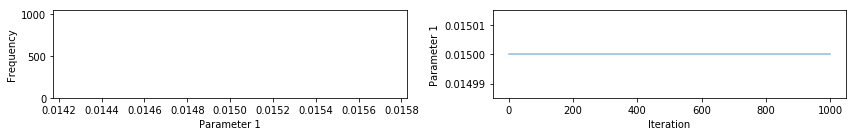

In [13]:
# Show traces and histograms
print(chains.shape)
pints.plot.trace(chains)

plt.show()

TypeError: 'AxesSubplot' object does not support indexing

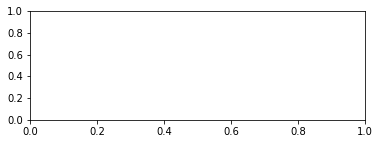

In [16]:
# Look at distribution in chain 0
chain = chains[0]
chain = chain[500:]
pints.plot.histogram(chains)

# Show graphs
plt.show()